<a href="https://colab.research.google.com/github/Gunehee/Audi_UsedCar_DataProject/blob/main/Audi_DataProject_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Audi Used Car Data Project**

* The used Audi market is a premium automotive segment with highly variable pricing driven by factors such as model year, mileage, and trim level.
* Understanding these determinants helps consumers and dealers make informed pricing and purchasing decisions.
* Audi's consistent brand positioning allows us to assess how brand equity influences resale values.
* The dataset poses realistic challenges (missing values, outliers) that showcase robust data science workflows.

This script demonstrates a complete analysis pipeline: data loading, cleaning, exploratory analysis, modeling, and results interpretation.

In [ ]:
install.packages("googledrive")
library("googledrive")

if (file.exists("/usr/local/lib/python3.6/dist-packages/google/colab_ipython.py")){
  install.packages("R.utils")
  library("R.utils")
  library("httr")
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check)
  options(rlang_interactive=TRUE)
}

drive_auth(use_oob = TRUE, cache = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=e5af4e307f95acec42feaeba1e83f75f&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWJfNXFsbS0tZ1RqZE0wdC03SHZSRnEzbFZuNUlpNzVZNFpnQmlIMFpXeUxVSmFjdWtrQW8wWUIzaGsyU2ROTGU2Nld1QSIsInN0YXRlIjoiZTVhZjRlMzA3Zjk1YWNlYzQyZmVhZWJhMWU4M2Y3NWYifQ==


In [ ]:
! download.file('https://drive.google.com/drive/folders/1Qrtx8q52-wt7twIBh4xivVZsFTycXA5c?usp=sharing','/content/A.cpp')

[1] TRUE

In [ ]:
install.packages("httpuv")
library("httpuv")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
getwd()

[1] "/content"

In [ ]:
# Get the file from Google Drive by name
file_name <- "audi.csv"  # Change this if your file has a different name
file_info <- drive_get(file_name)

✔ The input `path` resolved to exactly 1 file.



In [ ]:
# Download the file to your local Colab environment
drive_download(file_info, path = "audi.csv", overwrite = TRUE)

File downloaded:

• audi.csv <id: 1SJuNTV8CL50oQwB8lpE7k9pO0jMS0y1K>

Saved locally as:

• audi.csv



In [ ]:
# Load the dataset
Audi <- read.csv("audi.csv")

# Display first few rows
head(Audi)

model year price transmission mileage fuelType tax mpg  engineSize
1  A1   2017 12500 Manual       15735   Petrol   150 55.4 1.4       
2  A6   2016 16500 Automatic    36203   Diesel    20 64.2 2.0       
3  A1   2016 11000 Manual       29946   Petrol    30 55.4 1.4       
4  A4   2017 16800 Automatic    25952   Diesel   145 67.3 2.0       
5  A3   2019 17300 Manual        1998   Petrol   145 49.6 1.0       
6  A1   2016 13900 Automatic    32260   Petrol    30 58.9 1.4

In [ ]:
str(Audi)

'data.frame':	10668 obs. of  9 variables:
 $ model       : chr  " A1" " A6" " A1" " A4" ...
 $ year        : int  2017 2016 2016 2017 2019 2016 2016 2016 2015 2016 ...
 $ price       : int  12500 16500 11000 16800 17300 13900 13250 11750 10200 12000 ...
 $ transmission: chr  "Manual" "Automatic" "Manual" "Automatic" ...
 $ mileage     : int  15735 36203 29946 25952 1998 32260 76788 75185 46112 22451 ...
 $ fuelType    : chr  "Petrol" "Diesel" "Petrol" "Diesel" ...
 $ tax         : int  150 20 30 145 145 30 30 20 20 30 ...
 $ mpg         : num  55.4 64.2 55.4 67.3 49.6 58.9 61.4 70.6 60.1 55.4 ...
 $ engineSize  : num  1.4 2 1.4 2 1 1.4 2 2 1.4 1.4 ...


In [ ]:
# Define Min-Max Normalization function
normalize <- function(x) {
  return((x - min(x, na.rm = TRUE)) / (max(x, na.rm = TRUE) - min(x, na.rm = TRUE)))
}

# Select relevant columns
Audi_S = Audi[, c("year", "price", "mileage", "mpg")]

# Apply normalization function
Audi_S2 = as.data.frame(lapply(Audi_S, normalize))

# Display summary statistics
summary(Audi_S2)

      year            price            mileage             mpg        
 Min.   :0.0000   Min.   :0.00000   Min.   :0.00000   Min.   :0.0000  
 1st Qu.:0.8261   1st Qu.:0.09505   1st Qu.:0.01848   1st Qu.:0.1299  
 Median :0.8696   Median :0.13037   Median :0.05882   Median :0.1812  
 Mean   :0.8739   Mean   :0.14917   Mean   :0.07686   Mean   :0.1881  
 3rd Qu.:0.9565   3rd Qu.:0.18466   3rd Qu.:0.11289   3rd Qu.:0.2361  
 Max.   :1.0000   Max.   :1.00000   Max.   :1.00000   Max.   :1.0000  

In [ ]:
R_Matrix = matrix(data = 0,
                  nrow = nrow(Audi_S),
                  ncol = ncol(Audi_S))

for(k in 1:ncol(Audi_S2)){

  R_Matrix[,k] = normalize(Audi_S[,k])


}

R_DF = as.data.frame(R_Matrix)
summary(R_DF)

       V1               V2                V3                V4        
 Min.   :0.0000   Min.   :0.00000   Min.   :0.00000   Min.   :0.0000  
 1st Qu.:0.8261   1st Qu.:0.09505   1st Qu.:0.01848   1st Qu.:0.1299  
 Median :0.8696   Median :0.13037   Median :0.05882   Median :0.1812  
 Mean   :0.8739   Mean   :0.14917   Mean   :0.07686   Mean   :0.1881  
 3rd Qu.:0.9565   3rd Qu.:0.18466   3rd Qu.:0.11289   3rd Qu.:0.2361  
 Max.   :1.0000   Max.   :1.00000   Max.   :1.00000   Max.   :1.0000  

In [ ]:
R_DF2 = apply(Audi_S2, MARGIN = 2, FUN = normalize)
summary(R_DF2)

      year            price            mileage             mpg        
 Min.   :0.0000   Min.   :0.00000   Min.   :0.00000   Min.   :0.0000  
 1st Qu.:0.8261   1st Qu.:0.09505   1st Qu.:0.01848   1st Qu.:0.1299  
 Median :0.8696   Median :0.13037   Median :0.05882   Median :0.1812  
 Mean   :0.8739   Mean   :0.14917   Mean   :0.07686   Mean   :0.1881  
 3rd Qu.:0.9565   3rd Qu.:0.18466   3rd Qu.:0.11289   3rd Qu.:0.2361  
 Max.   :1.0000   Max.   :1.00000   Max.   :1.00000   Max.   :1.0000  

In [ ]:
# lapply
lapply(Audi_S2, normalize)
R_DF3 = as.data.frame(lapply(Audi_S2, normalize))
summary(R_DF3)

$year
    [1] 0.86956522 0.82608696 0.82608696 0.86956522 0.95652174 0.82608696
    [7] 0.82608696 0.82608696 0.78260870 0.82608696 0.86956522 0.82608696
   [13] 0.82608696 0.86956522 0.78260870 0.86956522 0.82608696 0.73913043
   [19] 0.82608696 0.73913043 0.86956522 0.82608696 0.86956522 0.78260870
   [25] 0.82608696 0.86956522 0.86956522 0.91304348 0.91304348 0.78260870
   [31] 0.78260870 0.86956522 0.73913043 0.86956522 0.82608696 0.73913043
   [37] 0.86956522 0.82608696 0.86956522 0.86956522 0.78260870 0.82608696
   [43] 0.86956522 0.73913043 0.82608696 0.95652174 0.91304348 0.86956522
   [49] 0.86956522 0.86956522 0.82608696 0.78260870 0.82608696 0.82608696
   [55] 0.78260870 0.78260870 0.82608696 0.73913043 0.82608696 0.82608696
   [61] 0.69565217 0.82608696 0.86956522 0.86956522 0.86956522 0.91304348
   [67] 0.82608696 0.86956522 0.69565217 0.82608696 0.82608696 0.82608696
   [73] 0.86956522 0.82608696 0.95652174 0.86956522 0.82608696 0.86956522
   [79] 0.86956522 0.86956522 0.82608696 0.82608696 0.82608696 0.82608696
   [85] 0.86956522 0.86956522 0.73913043 0.82608696 0.86956522 0.82608696
   [91] 0.95652174 0.95652174 0.82608696 0.78260870 0.86956522 0.82608696
   [97] 0.82608696 0.91304348 0.86956522 0.95652174 0.95652174 0.95652174
  [103] 0.95652174 0.95652174 0.95652174 0.95652174 0.82608696 0.86956522
  [109] 0.86956522 0.86956522 0.82608696 0.86956522 0.82608696 0.91304348
  [115] 0.82608696 0.86956522 0.73913043 0.82608696 0.82608696 0.86956522
  [121] 0.86956522 0.86956522 0.86956522 0.73913043 0.78260870 0.86956522
  [127] 0.82608696 0.82608696 0.82608696 0.86956522 0.91304348 0.95652174
  [133] 0.82608696 0.86956522 0.86956522 0.91304348 0.78260870 0.82608696
  [139] 0.86956522 0.78260870 0.86956522 0.82608696 0.86956522 0.86956522
  [145] 0.86956522 0.86956522 0.73913043 0.69565217 0.86956522 0.82608696
  [151] 0.86956522 0.69565217 0.82608696 0.91304348 0.82608696 0.86956522
  [157] 0.91304348 0.82608696 0.82608696 0.82608696 0.82608696 0.91304348
  [163] 0.86956522 0.86956522 0.73913043 0.86956522 0.86956522 0.73913043
  [169] 0.73913043 0.73913043 0.73913043 0.86956522 0.69565217 0.69565217
  [175] 0.78260870 0.78260870 0.86956522 0.86956522 0.73913043 0.78260870
  [181] 0.86956522 0.86956522 0.95652174 0.78260870 0.86956522 0.91304348
  [187] 0.86956522 0.78260870 0.78260870 0.82608696 0.86956522 0.95652174
  [193] 0.86956522 0.91304348 0.91304348 0.95652174 0.95652174 0.95652174
  [199] 1.00000000 0.82608696 0.95652174 0.95652174 0.95652174 0.95652174
  [205] 0.95652174 0.95652174 0.95652174 0.95652174 0.95652174 0.95652174
  [211] 0.95652174 0.95652174 0.95652174 0.95652174 0.95652174 0.95652174
  [217] 0.95652174 0.95652174 0.95652174 0.95652174 1.00000000 0.95652174
  [223] 0.95652174 1.00000000 1.00000000 0.78260870 0.78260870 0.91304348
  [229] 0.78260870 0.95652174 0.95652174 0.95652174 0.95652174 0.95652174
  [235] 0.95652174 0.95652174 0.95652174 0.95652174 0.95652174 0.95652174
  [241] 0.95652174 0.95652174 0.95652174 0.95652174 0.95652174 0.95652174
  [247] 0.95652174 0.95652174 0.95652174 0.82608696 0.73913043 0.82608696
  [253] 0.73913043 0.82608696 0.82608696 0.78260870 0.78260870 0.86956522
  [259] 0.86956522 0.95652174 0.86956522 0.73913043 0.86956522 0.95652174
  [265] 0.95652174 0.95652174 0.86956522 0.86956522 0.91304348 0.86956522
  [271] 0.73913043 0.95652174 0.95652174 0.95652174 0.82608696 0.69565217
  [277] 0.91304348 0.95652174 0.95652174 0.95652174 0.95652174 0.95652174
  [283] 0.91304348 0.82608696 0.82608696 0.95652174 0.91304348 0.78260870
  [289] 0.91304348 0.78260870 0.91304348 0.95652174 0.95652174 0.95652174
  [295] 0.86956522 0.86956522 0.86956522 0.86956522 0.69565217 0.91304348
  [301] 0.91304348 0.91304348 0.91304348 0.91304348 0.73913043 0.86956522
  [307] 0.86956522 0.69565217 0.73913043 0.78260870 0.82608696 0.91304348
  [313] 0.82608696 0.73913043 0.69565217 0.78260870 1.00000000 0.95652174
  [319] 0.95652174 0.95652174 0.95652174 0.95652174 0.95652174 0.8260869

      year            price            mileage             mpg        
 Min.   :0.0000   Min.   :0.00000   Min.   :0.00000   Min.   :0.0000  
 1st Qu.:0.8261   1st Qu.:0.09505   1st Qu.:0.01848   1st Qu.:0.1299  
 Median :0.8696   Median :0.13037   Median :0.05882   Median :0.1812  
 Mean   :0.8739   Mean   :0.14917   Mean   :0.07686   Mean   :0.1881  
 3rd Qu.:0.9565   3rd Qu.:0.18466   3rd Qu.:0.11289   3rd Qu.:0.2361  
 Max.   :1.0000   Max.   :1.00000   Max.   :1.00000   Max.   :1.0000  

In [ ]:
library(dplyr)
colMeans(filter(.data = Audi, year > 2016)[,c("tax","mpg","engineSize")])

Audi %>%
  filter(year > 2016) %>%
  select(tax,mpg,engineSize) %>%
  colMeans()


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




tax        mpg engineSize 
139.188766  47.049449   1.922512

tax        mpg engineSize 
139.188766  47.049449   1.922512

In [ ]:
Audi2 = Audi %>%
  mutate(tax2 = ifelse(tax > 100 , 1,0),
         engineSize2 = round(engineSize))

head(Audi2)

model year price transmission mileage fuelType tax mpg  engineSize tax2
1  A1   2017 12500 Manual       15735   Petrol   150 55.4 1.4        1   
2  A6   2016 16500 Automatic    36203   Diesel    20 64.2 2.0        0   
3  A1   2016 11000 Manual       29946   Petrol    30 55.4 1.4        0   
4  A4   2017 16800 Automatic    25952   Diesel   145 67.3 2.0        1   
5  A3   2019 17300 Manual        1998   Petrol   145 49.6 1.0        1   
6  A1   2016 13900 Automatic    32260   Petrol    30 58.9 1.4        0   
  engineSize2
1 1          
2 2          
3 1          
4 2          
5 1          
6 1

In [ ]:
# 그룹 간 빈도 수 계산 – group_by() + n()
Audi3 = Audi %>%
  group_by(transmission) %>%
  summarise(Count = n())

Audi3

transmission Count
1 Automatic    2708 
2 Manual       4369 
3 Semi-Auto    3591

In [ ]:
Audi4 = Audi %>%
  group_by(transmission) %>%
  summarise(Count = n(),
            Price_Mean = mean(price),
            Price_Sd = sd(price))

Audi4

transmission Count Price_Mean Price_Sd
1 Automatic    2708  28204.75   13208.71
2 Manual       4369  16101.03    5519.09
3 Semi-Auto    3591  27161.78   11979.37

In [ ]:
#  Group변수가 2개일 떄

Audi5 = Audi %>%
  group_by(transmission,year) %>%
  summarise(Count = n(),
            Price_Mean = mean(price))

head(Audi5)

`summarise()` has grouped output by 'transmission'. You can override using the
`.groups` argument.


transmission year Count Price_Mean
1 Automatic    1997 1     4650.000  
2 Automatic    1998 1     4999.000  
3 Automatic    2003 3     3491.667  
4 Automatic    2004 3     6891.333  
5 Automatic    2005 1     5895.000  
6 Automatic    2006 4     6458.750

In [ ]:
# 그룹 간 비율 계산

Audi6 = Audi %>%
  group_by(transmission,year) %>%
  summarise(Count = n(),
            Price_Mean = mean(price)) %>%
  mutate(Perc = Count/sum(Count))

head(Audi6)

`summarise()` has grouped output by 'transmission'. You can override using the
`.groups` argument.


transmission year Count Price_Mean Perc        
1 Automatic    1997 1     4650.000   0.0003692762
2 Automatic    1998 1     4999.000   0.0003692762
3 Automatic    2003 3     3491.667   0.0011078287
4 Automatic    2004 3     6891.333   0.0011078287
5 Automatic    2005 1     5895.000   0.0003692762
6 Automatic    2006 4     6458.750   0.0014771049

In [ ]:
# 중복 데이터 생성

set.seed(1234)
Audi19 = Audi %>%
  mutate(Unique_Key = 1:nrow(Audi)) %>%
  sample_frac(size = 1.5,replace = TRUE)

head(Audi19)
dim(Audi19)

# 중복 수 확인
sum(duplicated(Audi19$Unique_Key))

# 중복 데이터 행 제거
Audi19_2 = Audi19[!duplicated(Audi19$Unique_Key),]
dim(Audi19_2)

model year price transmission mileage fuelType tax mpg  engineSize Unique_Key
1  Q5   2017 23990 Automatic    27000   Diesel   205 45.6 3.0        7452      
2  TT   2016 14919 Manual       37352   Diesel    30 62.8 2.0        8016      
3  Q3   2019 25900 Manual        6997   Diesel   150 42.8 2.0        7162      
4  A1   2015 12000 Manual       35441   Diesel     0 80.7 1.6        8086      
5  Q5   2015 24879 Automatic    39353   Diesel   235 42.8 3.0        7269      
6  RS3  2020 42490 Automatic      320   Petrol   145 29.7 2.5        9196

[1] 16002    10

[1] 7727

[1] 8275   10

In [ ]:
# - 중복 키가 2개 이상일 경우 - duplicated()
# 중복 데이터 생성
set.seed(1234)
Audi19_3 = Audi %>%
  mutate(Unique_Key = 1:nrow(Audi),
         Unique_Key2 = nrow(Audi):1) %>%
  sample_frac(size = 1.5,replace = TRUE)

head(Audi19_3)
dim(Audi19_3)

# 중복된 행의 수 확인

sum(duplicated(Audi19_3[,c("Unique_Key","Unique_Key2")]))

# 중복 데이터 행 제거

Audi19_4 = Audi19_3[!duplicated(Audi19_3[,c("Unique_Key","Unique_Key2")]),]
dim(Audi19_4)

model year price transmission mileage fuelType tax mpg  engineSize Unique_Key
1  Q5   2017 23990 Automatic    27000   Diesel   205 45.6 3.0        7452      
2  TT   2016 14919 Manual       37352   Diesel    30 62.8 2.0        8016      
3  Q3   2019 25900 Manual        6997   Diesel   150 42.8 2.0        7162      
4  A1   2015 12000 Manual       35441   Diesel     0 80.7 1.6        8086      
5  Q5   2015 24879 Automatic    39353   Diesel   235 42.8 3.0        7269      
6  RS3  2020 42490 Automatic      320   Petrol   145 29.7 2.5        9196      
  Unique_Key2
1 3217       
2 2653       
3 3507       
4 2583       
5 3400       
6 1473

[1] 16002    11

[1] 7727

[1] 8275   11

In [ ]:
# - dplyr 패키지를 활용한 중복 데이터 제거 - distinct()
Audi19_5 = Audi19_3 %>%
  distinct(Unique_Key, Unique_Key2, .keep_all = TRUE)

dim(Audi19_5)

[1] 8275   11

In [ ]:
P1 = Audi %>%
  mutate(year_G = ifelse(year < 2000, 1990,
                         ifelse(year < 2010, 2000,2010))) %>%
  group_by(year_G,transmission) %>%
  summarise(Count = n(),
            Mean_Price = mean(price),
            Median_Price = median(price)) %>%
  mutate(Perc = Count / sum(Count)) %>%
  arrange(year_G,-Mean_Price)

`summarise()` has grouped output by 'year_G'. You can override using the
`.groups` argument.


In [ ]:
P2 = Audi %>%
  filter(price > quantile(price, probs = c(0.9))) %>%
  group_by(model) %>%
  summarise(Mean_Price = mean(price),
            Mean_Mileage = mean(mileage),
            Mean_Tax = mean(tax))

P2

model Mean_Price Mean_Mileage Mean_Tax
1   A3    36990.00   3059.000    145.0000
2   A4    43232.05   4630.806    145.1613
3   A5    38832.52   5642.476    145.2381
4   A6    43601.53   6010.237    145.5085
5   A7    43217.00   6927.788    151.3636
6   A8    42698.74   5402.288    151.2879
7   Q2    38495.00   5950.000    147.5000
8   Q3    38571.28   3495.000    145.5833
9   Q5    42150.78   6503.968    144.8174
10  Q7    51328.18  11929.632    152.1404
11  Q8    60115.01   6412.043    145.8696
12  R8   100011.56  10876.444    285.5556
13  RS3   40966.00   7960.667    146.3333
14  RS4   58907.70   9766.043    145.6522
15  RS5   54244.08   6938.885    145.3846
16  RS6   55963.87  28524.641    285.8974
17  S4    43200.29   3587.143    145.0000
18  S8    44991.00  22579.000    555.0000
19  SQ5   42119.29  15684.429    146.4286
20  SQ7   49269.00  27659.375    203.1250
21  TT    43813.90   8030.194    165.8065

In [ ]:
drive_folder <- "Audi_Data"
# List all CSV files in the Google Drive folder
ListFiles <- drive_ls(path = drive_folder, type = "csv")

# Count the number of files
List_Length <- nrow(ListFiles)

# Display results
print(ListFiles)
print(paste("Total CSV files:", List_Length))

# A dribble: 13 × 3
   name               id                                drive_resource   
   <chr>              <drv_id>                          <list>           
 1 audi.csv           1SJuNTV8CL50oQwB8lpE7k9pO0jMS0y1K <named list [43]>
 2 vw.csv             1uzTz-WWuceFosz3966Xg3UtZkln6veWK <named list [43]>
 3 vauxhall.csv       1T6iX_6D0gV0Un5BS_g13J1-VKpZ3hWsW <named list [43]>
 4 unclean focus.csv  1YOqyIzH2KYwKltvA0JOKbPe56otHXXN3 <named list [44]>
 5 unclean cclass.csv 1UCXxMdnCN9Tsw7ZMWdoU1OdqdD0jazZB <named list [44]>
 6 toyota.csv         1LMP4h8AsUnQY8HmZRuD4bPJFIVtm2VwR <named list [43]>
 7 skoda.csv          10yD0jUYDedjQY5JZWDeNRUbc8MPYiqkH <named list [43]>
 8 merc.csv           1BsZPtABAExFJ8bYTTnuSkeWTJ5AlEZfZ <named list [43]>
 9 hyundi.csv         1im-Qp85z9xRASqNbzuWqbd-0yqdKgh54 <named list [43]>
10 ford.csv           1hVeFv6syzkIzoVHtO6VnbOgXBXzvawZ2 <named list [43]>
11 focus.csv          1-jJ_qyO-vuVnkSHaEDjrS4hEjryIQlc2 <named list [43]>
12 cclass.csv     

In [ ]:
# Specify the files you want to process
selected_files <- c("audi.csv", "bmw.csv", "cclass.csv")


# Filter the file list to only include selected files
ListFiles <- ListFiles[ListFiles$name %in% selected_files, ]

# Get the number of selected files
List_Length <- nrow(ListFiles)

# Print filtered file list
print(ListFiles)
print(paste("Total selected CSV files:", List_Length))

# Initialize empty dataframe to store results
Brand_Data <- data.frame()

# Loop through only the selected files
for (k in 1:List_Length) {

    # Download each selected CSV file from Google Drive
    local_path <- paste0("temp_", ListFiles$name[k])  # Local file name
    drive_download(as_id(ListFiles$id[k]), path = local_path, overwrite = TRUE)

    # Read the downloaded CSV file
    DF <- read.csv(local_path, stringsAsFactors = FALSE)

    # Data transformation
    DF2 <- DF %>%
      mutate(year_G = ifelse(year < 2000, 1990,
                         ifelse(year < 2010, 2000, 2010))) %>%
      group_by(year_G, transmission) %>%
      summarise(Count = n(),
                Mean_Price = mean(price, na.rm = TRUE),
                Median_Price = median(price, na.rm = TRUE)) %>%
      mutate(Perc = Count / sum(Count)) %>%
      arrange(year_G, -Mean_Price) %>%
      mutate(Brand = gsub(".csv", "", ListFiles$name[k]))  # Extract brand name from file name

    # Combine results into a single dataframe
    Brand_Data <- bind_rows(Brand_Data, DF2)
}

# Display final combined data
print(Brand_Data)

# A dribble: 3 × 3
  name       id                                drive_resource   
  <chr>      <drv_id>                          <list>           
1 audi.csv   1SJuNTV8CL50oQwB8lpE7k9pO0jMS0y1K <named list [43]>
2 cclass.csv 19KFfJbL_6yU6kebyL6CekxyeqdCZYjfW <named list [43]>
3 bmw.csv    131-8Z9ZpGje0WeCwZ2TgQ3IR2jeNh3io <named list [44]>
[1] "Total selected CSV files: 3"


File downloaded:

• audi.csv <id: 1SJuNTV8CL50oQwB8lpE7k9pO0jMS0y1K>

Saved locally as:

• temp_audi.csv

`summarise()` has grouped output by 'year_G'. You can override using the
`.groups` argument.
File downloaded:

• cclass.csv <id: 19KFfJbL_6yU6kebyL6CekxyeqdCZYjfW>

Saved locally as:

• temp_cclass.csv

`summarise()` has grouped output by 'year_G'. You can override using the
`.groups` argument.
File downloaded:

• bmw.csv <id: 131-8Z9ZpGje0WeCwZ2TgQ3IR2jeNh3io>

Saved locally as:

• temp_bmw.csv

`summarise()` has grouped output by 'year_G'. You can override using the
`.groups` argument.


   year_G transmission Count Mean_Price Median_Price         Perc  Brand
1    1990    Automatic     2   4824.500       4824.5 1.0000000000   audi
2    2000    Automatic    26   8746.962       5945.0 0.2921348315   audi
3    2000    Semi-Auto     2   5995.000       5995.0 0.0224719101   audi
4    2000       Manual    61   4716.377       3995.0 0.6853932584   audi
5    2010    Automatic  2680  28410.968      26700.0 0.2533799754   audi
6    2010    Semi-Auto  3589  27173.577      24250.0 0.3393211686   audi
7    2010       Manual  4308  16262.237      15817.5 0.4072988560   audi
8    1990    Automatic     3   3496.667       4450.0 1.0000000000 cclass
9    2000    Semi-Auto     1   5995.000       5995.0 0.0263157895 cclass
10   2000    Automatic    36   4733.778       3997.0 0.9473684211 cclass
11   2000       Manual     1   1495.000       1495.0 0.0263157895 cclass
12   2010    Semi-Auto  2070  25405.171      24992.0 0.5365474339 cclass
13   2010    Automatic  1589  23070.021      21544.

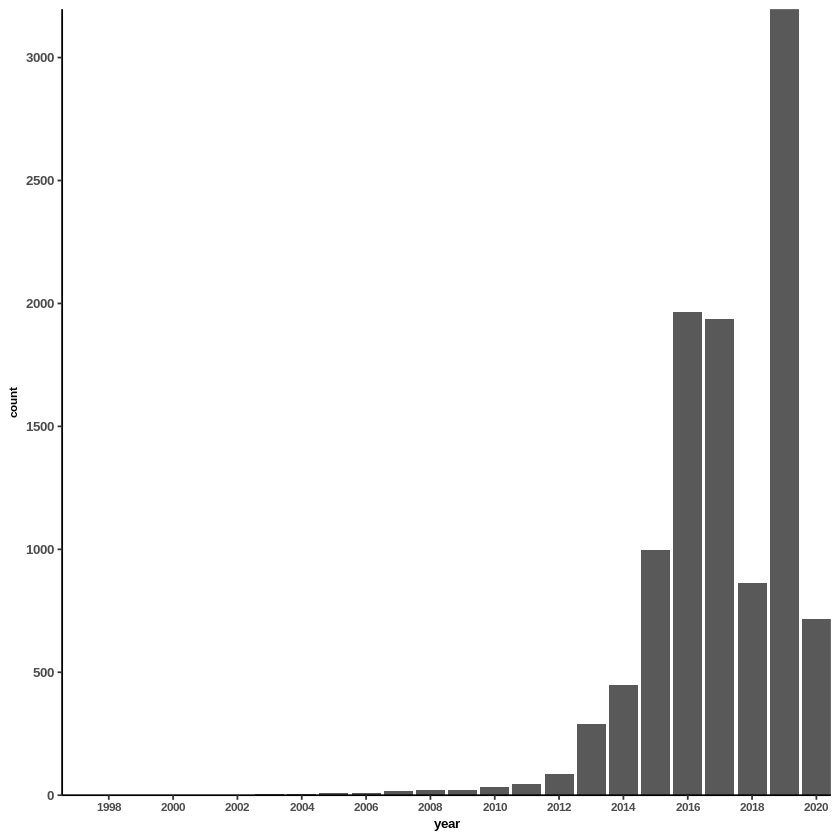

In [ ]:
library(ggplot2)
ggplot(Audi,aes(x =  year)) +
  geom_bar() +
  theme_classic() +
  theme(axis.text.x = element_text(size = 7, face = "bold"),
        axis.text.y = element_text(size = 8, face = "bold"),
        axis.title.x = element_text(size = 8, face = "bold"),
        axis.title.y = element_text(size = 7, face = "bold")) +
  scale_x_continuous(breaks = seq(1990,2020,by = 2),
                     expand = c(0,0)) +
  scale_y_continuous(breaks = seq(0,4000,by = 500),
                     expand = c(0,0))

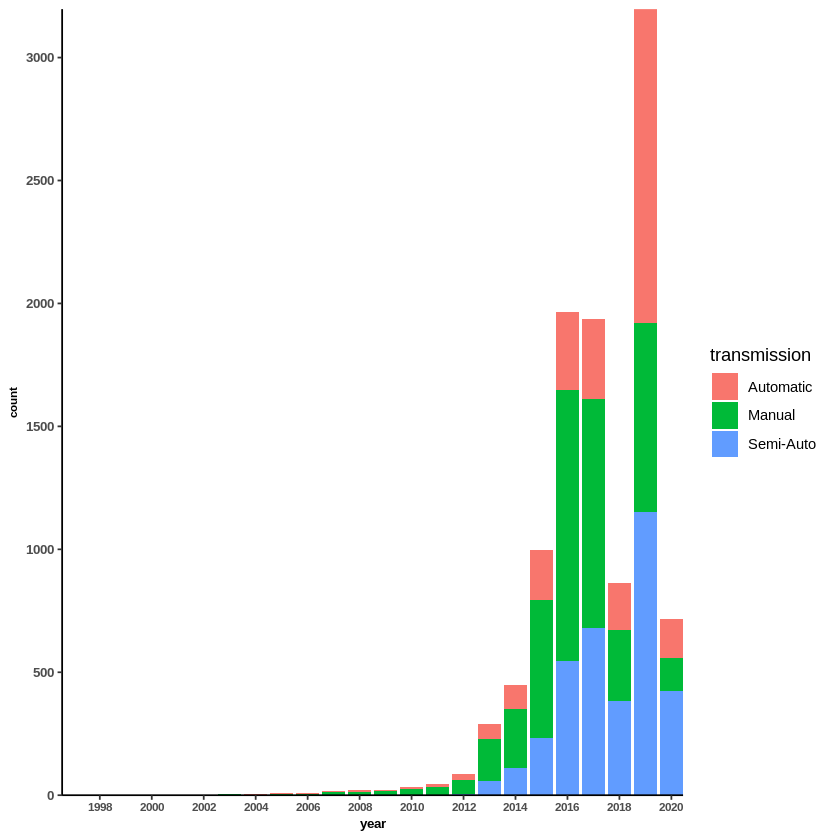

In [ ]:
ggplot(Audi,aes(x =  year, fill = transmission)) +
  geom_bar() +
  theme_classic() +
  theme(axis.text.x = element_text(size = 7, face = "bold"),
        axis.text.y = element_text(size = 8, face = "bold"),
        axis.title.x = element_text(size = 8, face = "bold"),
        axis.title.y = element_text(size = 7, face = "bold")) +
  scale_x_continuous(breaks = seq(1990,2020,by = 2),
                     expand = c(0,0)) +
  scale_y_continuous(breaks = seq(0,4000,by = 500),
                     expand = c(0,0))

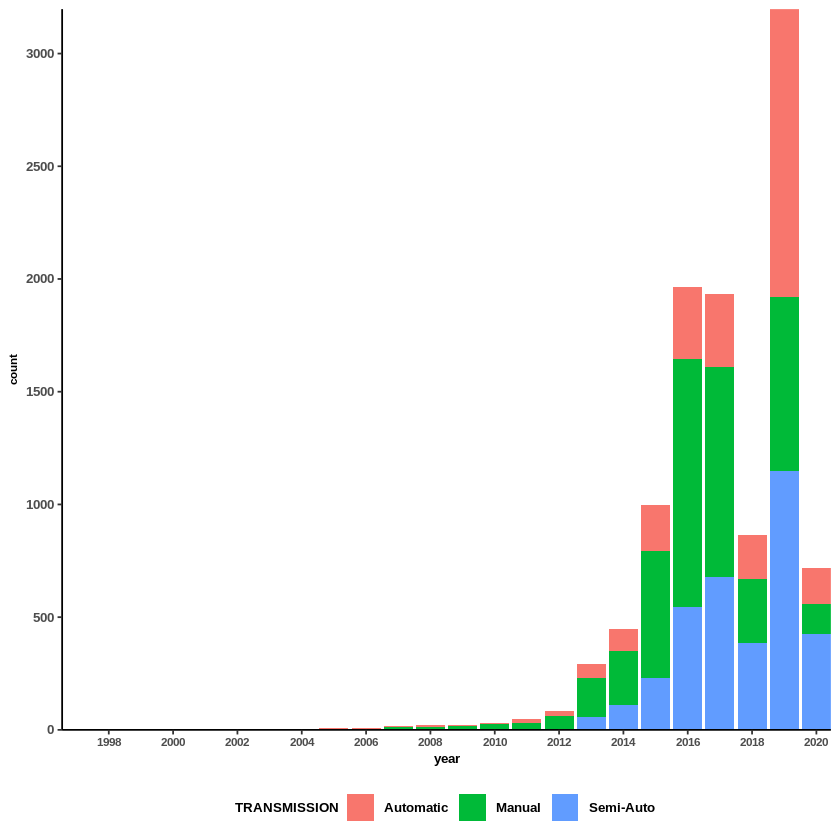

In [ ]:
ggplot(Audi,aes(x =  year, fill = transmission)) +
  geom_bar() +
  theme_classic() +
  theme(axis.text.x = element_text(size = 7, face = "bold"),
        axis.text.y = element_text(size = 8, face = "bold"),
        axis.title.x = element_text(size = 8, face = "bold"),
        axis.title.y = element_text(size = 7, face = "bold"),
        legend.text = element_text(size = 8, face = "bold"),
        legend.title = element_text(size = 8, face = "bold"),
        legend.position = "bottom") +
  scale_x_continuous(breaks = seq(1990,2020,by = 2),
                     expand = c(0,0)) +
  scale_y_continuous(breaks = seq(0,4000,by = 500),
                     expand = c(0,0)) +
  labs(fill = "TRANSMISSION")

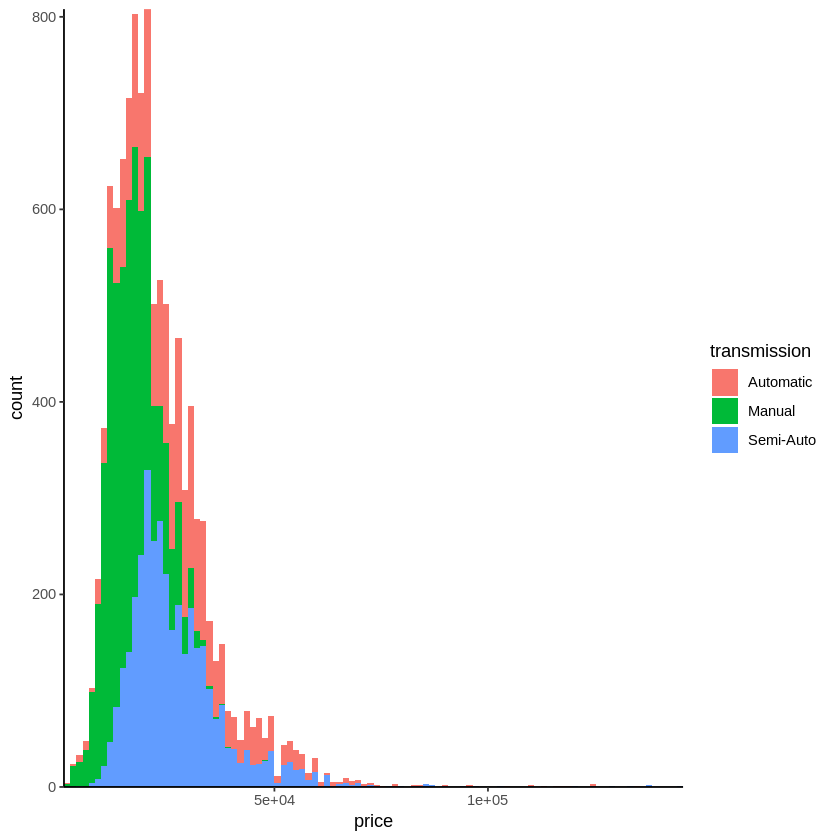

In [ ]:
# Histogram
ggplot(Audi, aes(x = price, fill = transmission)) +
  geom_histogram(bins = 100) +
  theme_classic() +
  scale_y_continuous(expand = c(0,0)) +
  scale_x_continuous(expand = c(0,0))

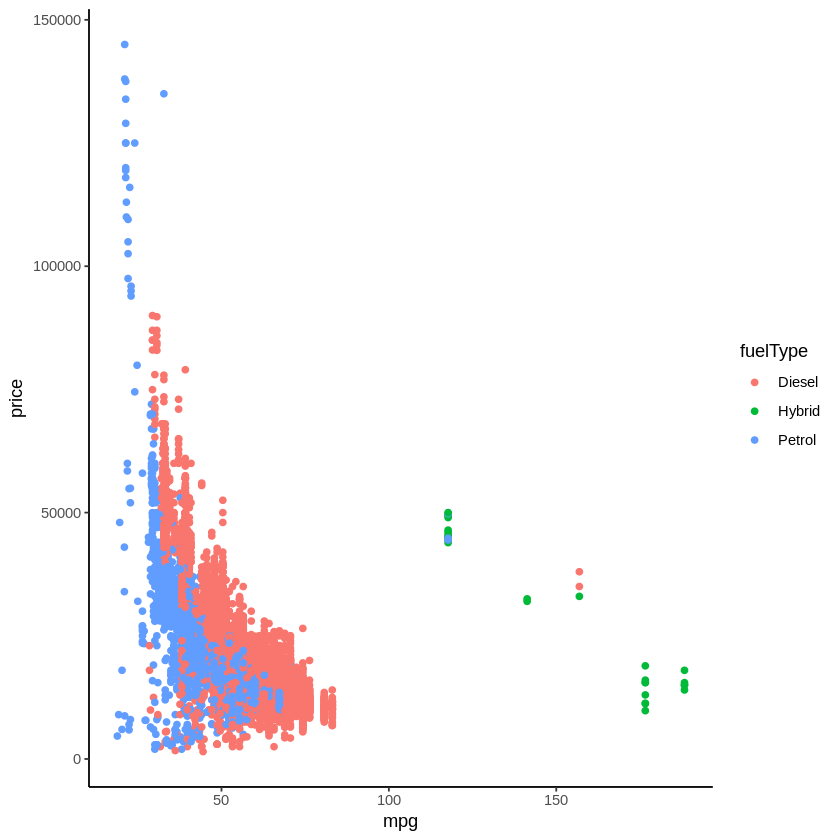

In [ ]:
# ggplot
ggplot(Audi, aes(x = mpg, y = price, col = fuelType)) +
  geom_point() +
  theme_classic()

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


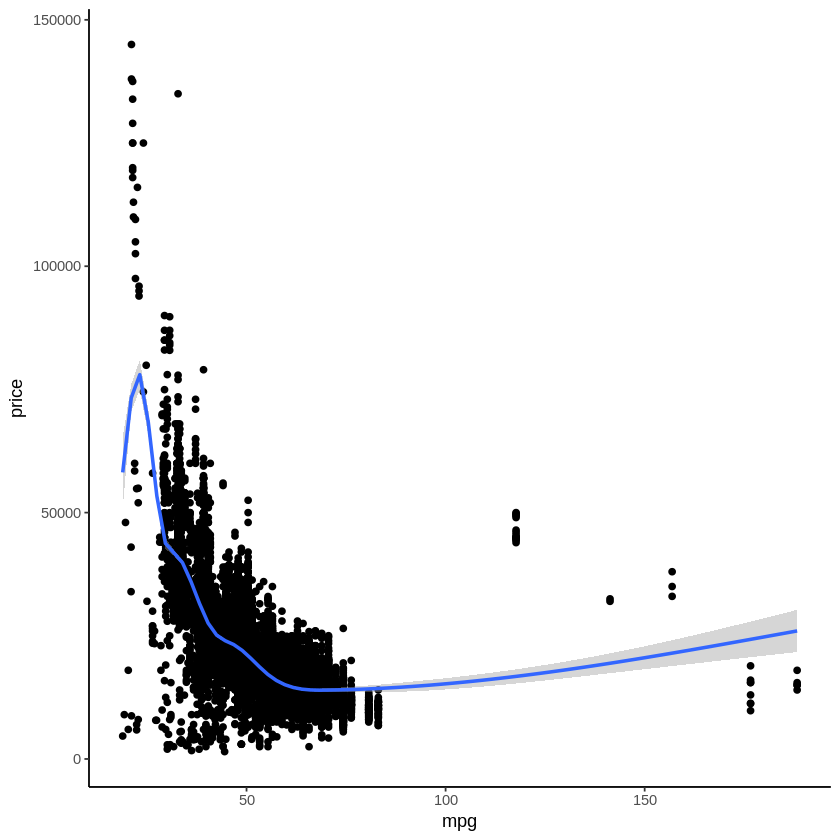

In [ ]:
ggplot(Audi, aes(x = mpg, y = price)) +
  geom_point() +
  geom_smooth() +
  theme_classic()

`geom_smooth()` using formula = 'y ~ x'


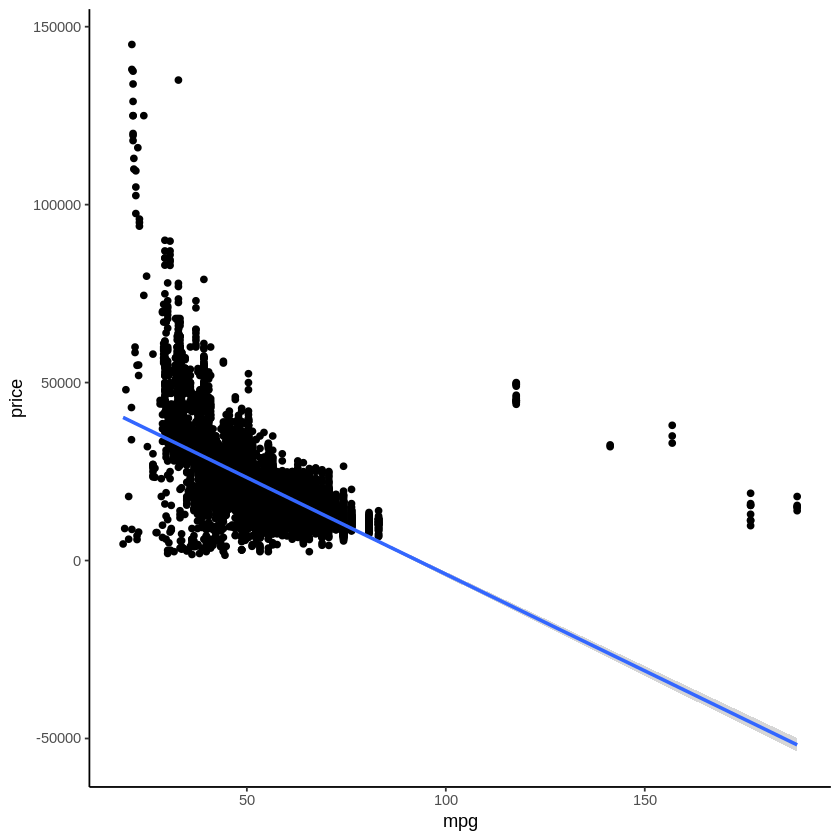

In [ ]:
ggplot(Audi, aes(x = mpg, y = price)) +
  geom_point() +
  geom_smooth(method = 'lm') +
  theme_classic()

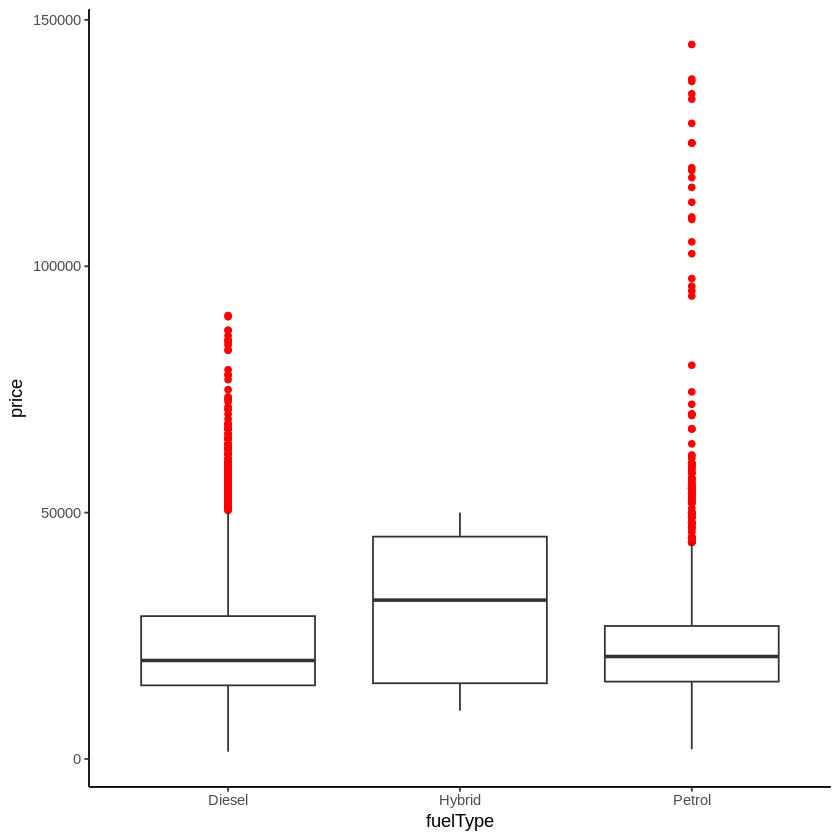

In [ ]:
# Box Plot
ggplot(Audi, aes(x = fuelType, y = price)) +
  geom_boxplot(outlier.colour = "red") +
  theme_classic()

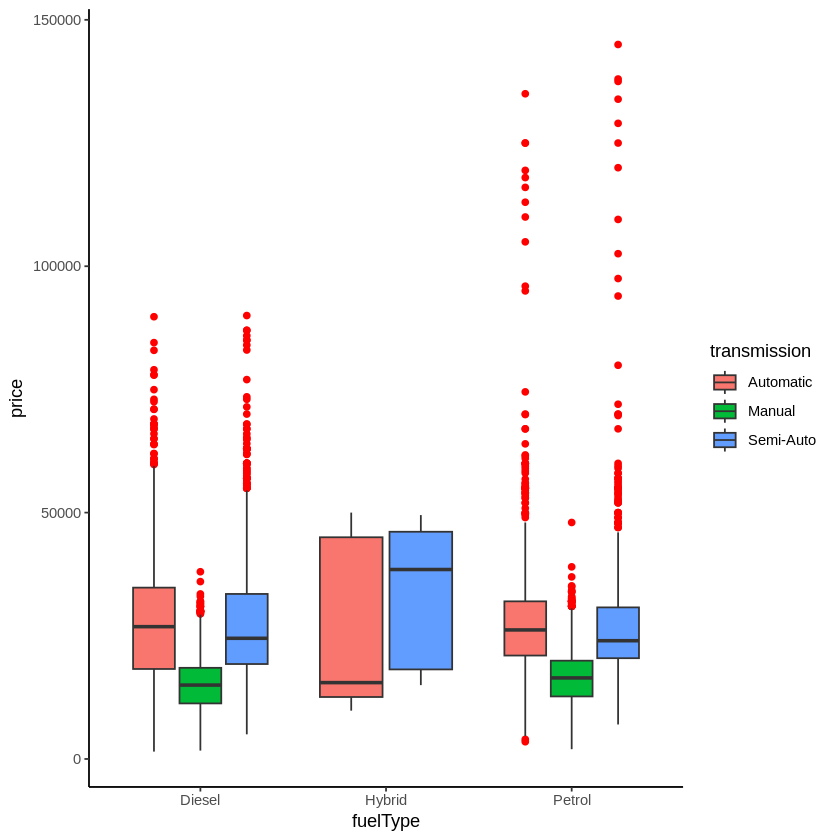

In [ ]:
ggplot(Audi, aes(x = fuelType, y = price, fill = transmission)) +
  geom_boxplot(outlier.colour = "red") +
  theme_classic()

In [ ]:
# Data collelction for the line graph
Year_DF = Audi %>%
  group_by(year) %>%
  summarise(Price = mean(price))

Year_DF

year Price    
1  1997  4650.000
2  1998  4999.000
3  2002  2433.000
4  2003  3408.333
5  2004  5053.600
6  2005  3490.714
7  2006  6499.111
8  2007  7325.250
9  2008  6281.429
10 2009  6281.957
11 2010  7224.094
12 2011  8944.809
13 2012  9860.812
14 2013 11690.790
15 2014 13890.660
16 2015 15128.235
17 2016 16908.725
18 2017 19951.624
19 2018 26296.707
20 2019 30410.752
21 2020 35967.067

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year fuelType Price    
1  1997 Petrol    4650.000
2  1998 Petrol    4999.000
3  2002 Petrol    2433.000
4  2003 Diesel    2242.500
5  2003 Petrol    5740.000
6  2004 Diesel    1699.000
7  2004 Petrol    5892.250
8  2005 Diesel    3742.500
9  2005 Petrol    3390.000
10 2006 Diesel    4161.667
11 2006 Petrol    7667.833
12 2007 Diesel    3623.571
13 2007 Petrol   10204.333
14 2008 Diesel    5008.214
15 2008 Petrol    8827.857
16 2009 Diesel    6344.091
17 2009 Petrol    6225.000
18 2010 Diesel    7196.105
19 2010 Petrol    7265.000
20 2011 Diesel    8497.382
21 2011 Petrol   10115.000
22 2012 Diesel   10030.095
23 2012 Petrol    9376.045
24 2013 Diesel   11380.356
25 2013 Petrol   12311.660
26 2014 Diesel   13214.477
27 2014 Hybrid   15245.000
28 2014 Petrol   15299.741
29 2015 Diesel   14801.409
30 2015 Hybrid   13614.429
31 2015 Petrol   15831.588
32 2016 Diesel   17359.958
33 2016 Hybrid   15723.500
34 2016 Petrol   16161.490
35 2017 Diesel   20891.680
36 2017 Hybrid   32998.000
37 2017 Petrol   19275.515
38 2018 Diesel   31417.742
39 2018 Petrol   23586.637
40 2019 Diesel   32177.226
41 2019 Hybrid   45727.667
42 2019 Petrol   28483.661
43 2020 Diesel   41686.172
44 2020 Hybrid   43665.000
45 2020 Petrol   31851.938

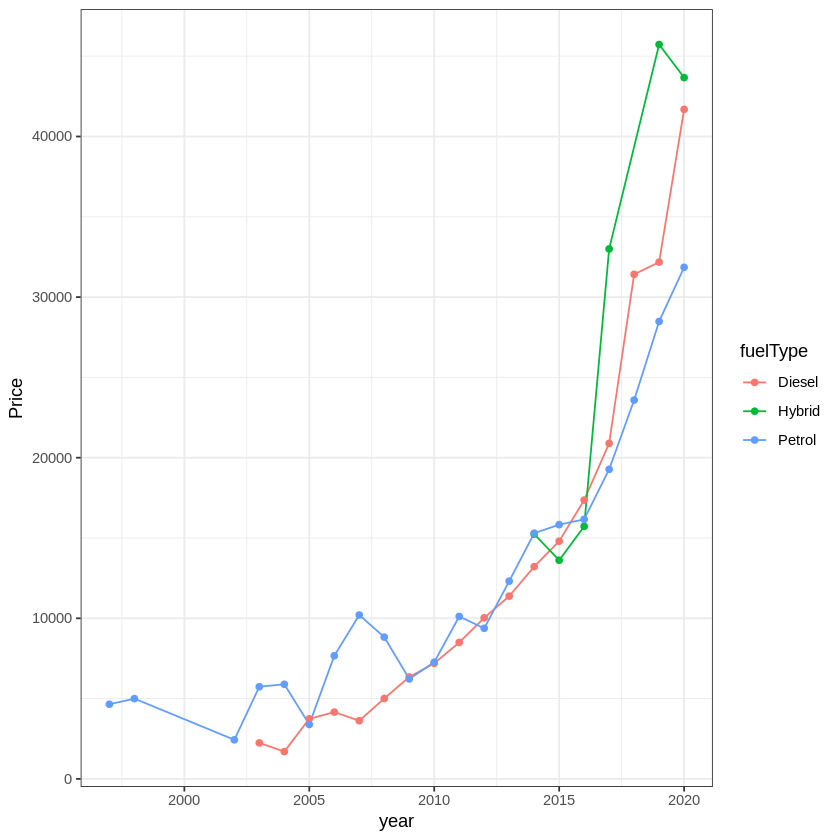

In [ ]:
Year_DF2 = Audi %>%
  group_by(year,fuelType) %>%
  summarise(Price = mean(price))

Year_DF2

ggplot(Year_DF2, aes(x = year, y = Price, col = fuelType)) +
  geom_line() +
  geom_point() +
  theme_bw()

In [ ]:
library(ggplot2)
library(dplyr)
install.packages("reshape2")
library(reshape2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




## Data Analysis Using Used Car Sales Data









In [ ]:
# Probability
#  summary()/nrow()
summary(as.factor(Audi$transmission))/nrow(Audi)

Automatic    Manual Semi-Auto 
0.2538433 0.4095426 0.3366142

In [ ]:
sum(Audi$transmission == "Automatic")/nrow(Audi)

[1] 0.2538433

In [ ]:
# Contingency Table and Conditional Probability using xtabs()
Table = xtabs(~Audi$fuelType + Audi$transmission)
Table[1,1]/colSums(Table)["Automatic"]

Automatic 
0.6152142

In [ ]:
# Joint Probability
Table[1,1]/nrow(Audi)

[1] 0.156168

In [ ]:
# Independence of Probability
P_Trans = sum(Audi$transmission == "Automatic")/nrow(Audi)
P_Disel = sum(Audi$fuelType == "Diesel")/nrow(Audi)

P_Trans * P_Disel

[1] 0.1327038

## Probability Distributions for Data Analysis
### Discrete Probability Distributions

Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


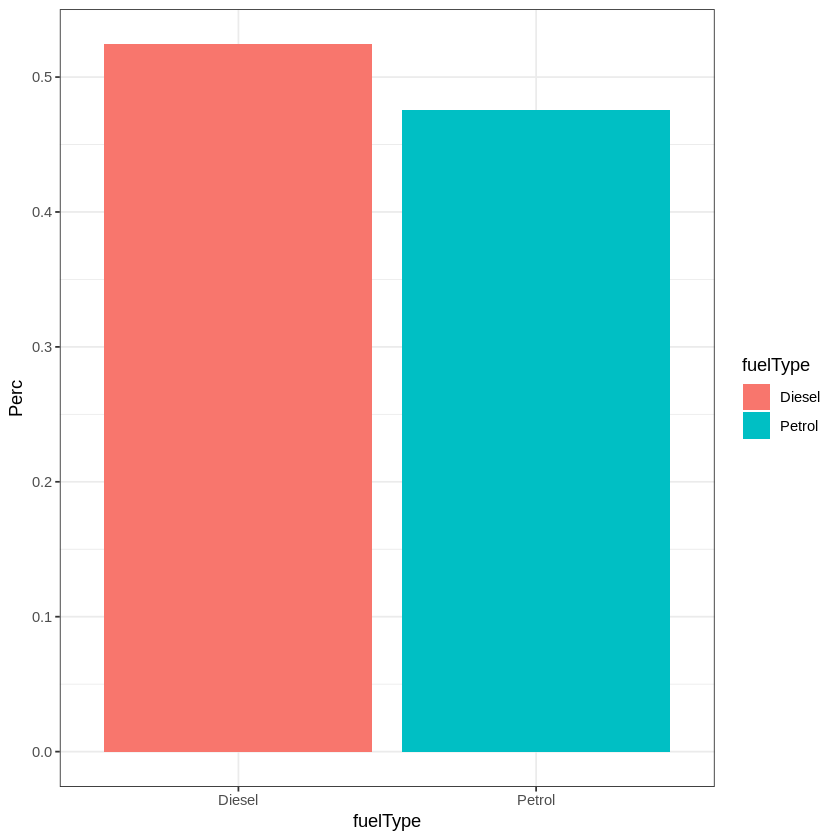

In [ ]:
# Binomial Distribution
Audi_NonHybrid = Audi %>%
  filter(fuelType != "Hybrid")

ggplot(Audi_NonHybrid) +
  geom_bar(aes(x = fuelType, y = (..count..)/sum(..count..),
               fill = fuelType)) +
  theme_bw() +
  ylab("Perc")

In [ ]:
P_Petrol = sum(Audi$fuelType == "Petrol")/nrow(Audi)
P_Diesel = 1 - P_Petrol
P_Diesel

[1] 0.5254031

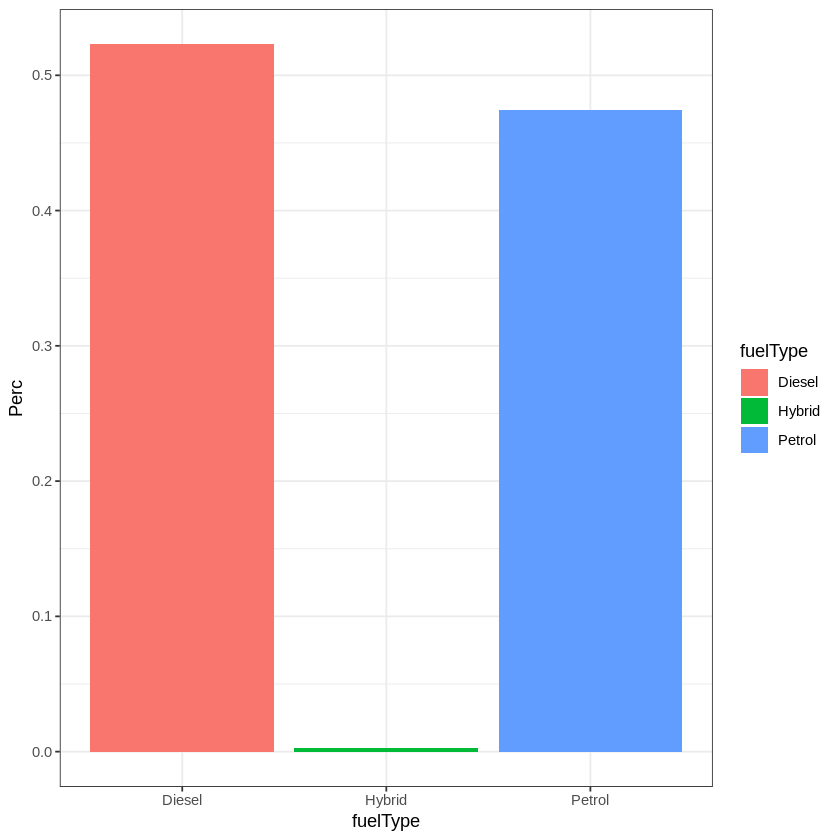

In [ ]:
# Multinomial Distribution
ggplot(Audi) +
  geom_bar(aes(x = fuelType, y = (..count..)/sum(..count..),
               fill = fuelType)) +
  theme_bw() +
  ylab("Perc")

In [ ]:
Probs = summary(as.factor(Audi$fuelType))/nrow(Audi)
Probs

Diesel      Hybrid      Petrol 
0.522778403 0.002624672 0.474596925

In [ ]:
n_F = factorial(10)
x_F = factorial(5) * factorial(1) * factorial(4)
Prob = (n_F / x_F) * Probs['Diesel']^5 * Probs['Hybrid']^1 * Probs['Petrol']^4
Prob

Diesel 
0.00655139

In [ ]:
dmultinom(c(5,1,4),
          prob = c(Probs['Diesel'],Probs['Hybrid'],Probs['Petrol']))

[1] 0.00655139

### Continuous Probability Distributions

In [ ]:
# Normal Distribution
library(dplyr)

k1 = c()
p1 = c()

# mean = 0, sd = 3

for(k in seq(-15,15,by = 0.01)){

  p = dnorm(x = k,mean = 0,sd = 3)
  k1 = c(k1,k)
  p1 = c(p1,p)

}

k2 = c()
p2 = c()

# mean = 0, sd = 5
# Define the domain interval for the iteration parameter k as an arithmetic sequence ranging from -15 to 15 with a step size of 0.01.
# Use dnorm() to calculate the probability of each value in the domain k based on the normal distribution. The function dnorm() represents the probability density function (PDF) of the normal distribution.
# Store the values of k and the computed probabilities as vectors, defining them as p1 and p2.
for(k in seq(-15,15,by = 0.01)){

  p = dnorm(x = k,mean = 0,sd = 5)
  k2 = c(k2,k)
  p2 = c(p2,p)

}

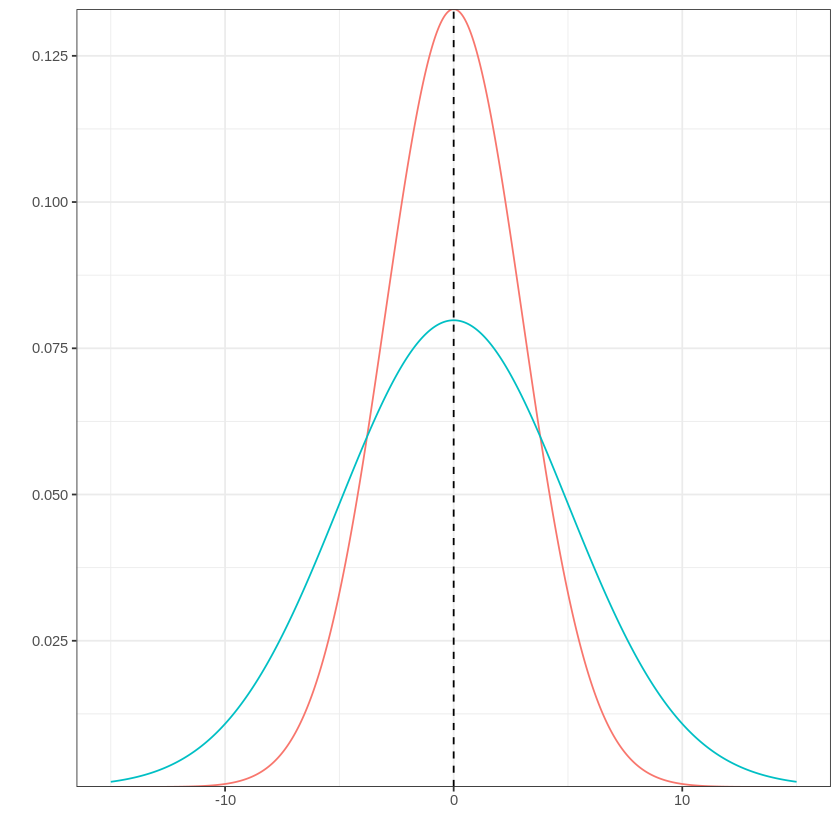

In [ ]:
DF = data.frame(
  k = k1,
  p1 = p1,
  p2 = p2
)


DF %>%
  melt(id.vars = c("k")) %>%
  ggplot() +
  geom_line(aes(x = k, y = value, col = as.factor(variable))) +
  geom_vline(xintercept = 0,linetype = 'dashed') +
  theme_bw() +
  theme(legend.position = 'none') +
  xlab("") + ylab("") +
  scale_y_continuous(expand = c(0,0))

In [ ]:
# Standard Normal Distribution
mean(scale(Audi$price))

[1] 1.482181e-16

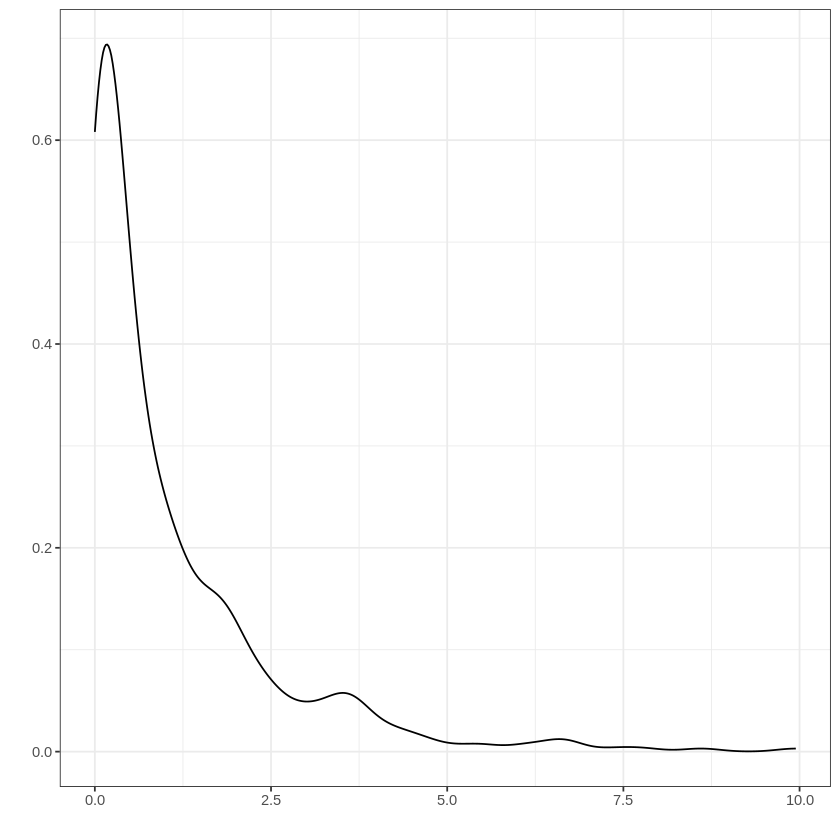

In [ ]:
# Sampling Distribution
# * Chi-Square Distribution
Z1 = rnorm(n = 500,mean = 0,sd = 1)
Z1_2 = Z1^2

ggplot(NULL) +
  geom_density(aes(x = Z1_2, y= ..density..)) +
  xlab("") + ylab("") +
  theme_bw()

In [ ]:
# In a for loop, generate the iteration variable df (degrees of freedom) and define the iteration range as {1, 3, 5, 10}.
# Set Z_ADD = 0 to utilize the additivity property of the chi-square distribution.
# Generate chi-square distributed values with df = 1 for the specified iteration range and accumulate these values in Z_ADD.
# Store the results in vectors df_V and Z2_V, then create a dataframe Chisq_DF.
df_V = c()
Z2_V = c()

for(df in c(1,3,5,10)){

  Z_ADD = 0

  for(iteration in 1:df){

    Z = rnorm(n = 500,mean = 0, sd = 1)
    Z2 = Z^2
    Z_ADD = Z_ADD + Z2


  }

  Z2_V = c(Z2_V,Z_ADD)
  df_V = c(df_V,rep(df,500))

}

Chisq_DF = data.frame(
  df = df_V,
  Z2 = Z2_V
)

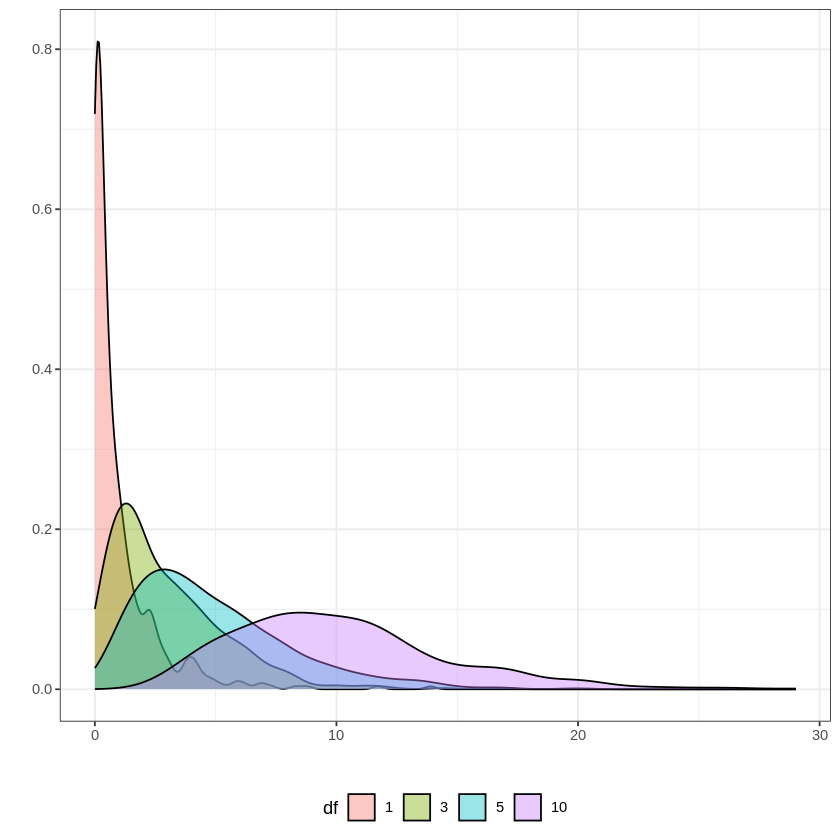

In [ ]:
ggplot(Chisq_DF) +
  geom_density(aes(x = Z2, y = ..density.., fill = as.factor(df)),
               alpha = 0.4) +
  xlab("") + ylab("") +
  theme_bw() +
  theme(legend.position = "bottom") +
  labs(fill = "df")

In [ ]:
# F-Distribution
F_Value_13 = (Chisq_DF$Z2[Chisq_DF$df == 1]/1) / (Chisq_DF$Z2[Chisq_DF$df == 3] /3)
F_Value_101 = (Chisq_DF$Z2[Chisq_DF$df == 10]/10) / (Chisq_DF$Z2[Chisq_DF$df == 1] /1)

F_DF = data.frame(
  df = c(rep("1.3",length(F_Value_13)),
         rep("10.1",length(F_Value_101))),
  F_Value = c(F_Value_13,F_Value_101)
)

Warning message:
“Removed 115 rows containing non-finite outside the scale range
(`stat_density()`).”


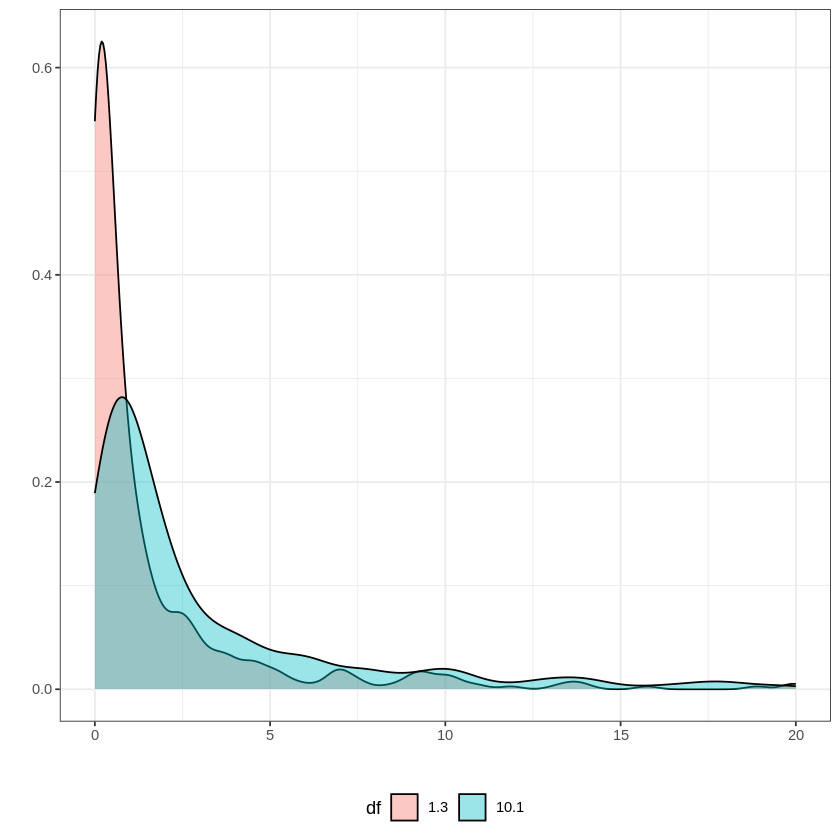

In [ ]:
ggplot(F_DF) +
  geom_density(aes(x = F_Value, y = ..density.., fill = df),
               alpha = 0.4) +
  xlim(0,20) +
  theme_bw() +
  xlab("") + ylab("") +
  theme(legend.position = "bottom")

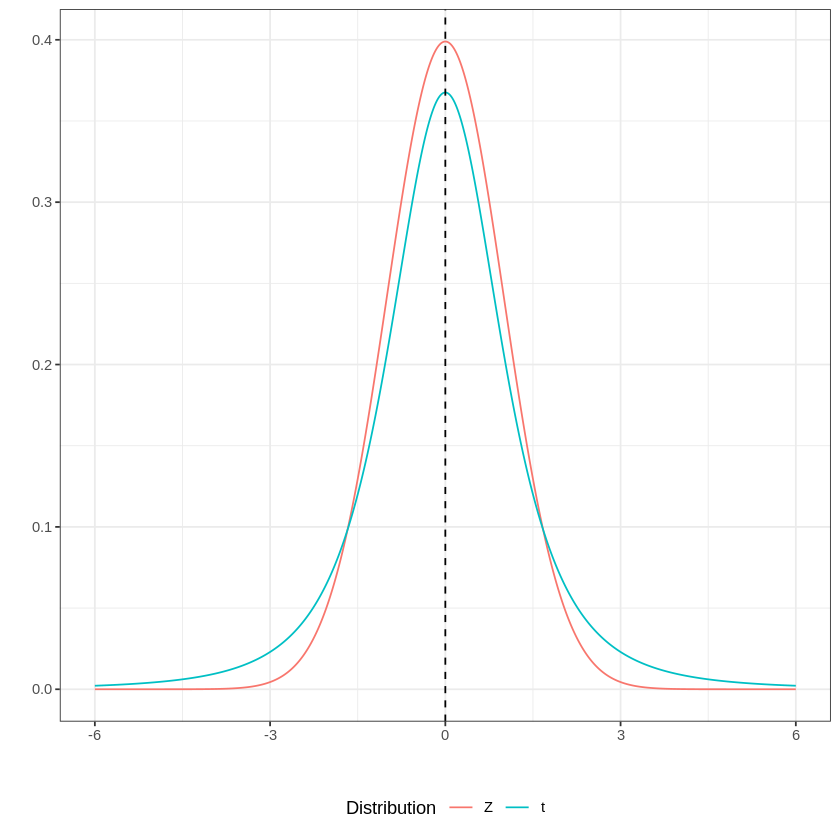

In [ ]:
# Student's t Distribution
kv = c()
z = c()
t = c()

for(k in seq(-6,6,by = 0.01)){

  n_dist = dnorm(x = k,mean = 0,sd = 1)
  t_dist = dt(x=k, df = 3)
  kv = c(kv,k)
  z = c(z,n_dist)
  t = c(t,t_dist)

}

DF = data.frame(
  k = kv,
  Z = z,
  t = t
)


DF %>%
  melt(id.vars = c("k")) %>%
  ggplot() +
  geom_line(aes(x = k, y = value, col = as.factor(variable))) +
  geom_vline(xintercept = 0,linetype = 'dashed') +
  theme_bw() +
  theme(legend.position = "bottom") +
  labs(col = "Distribution") +
  xlab("") + ylab("")

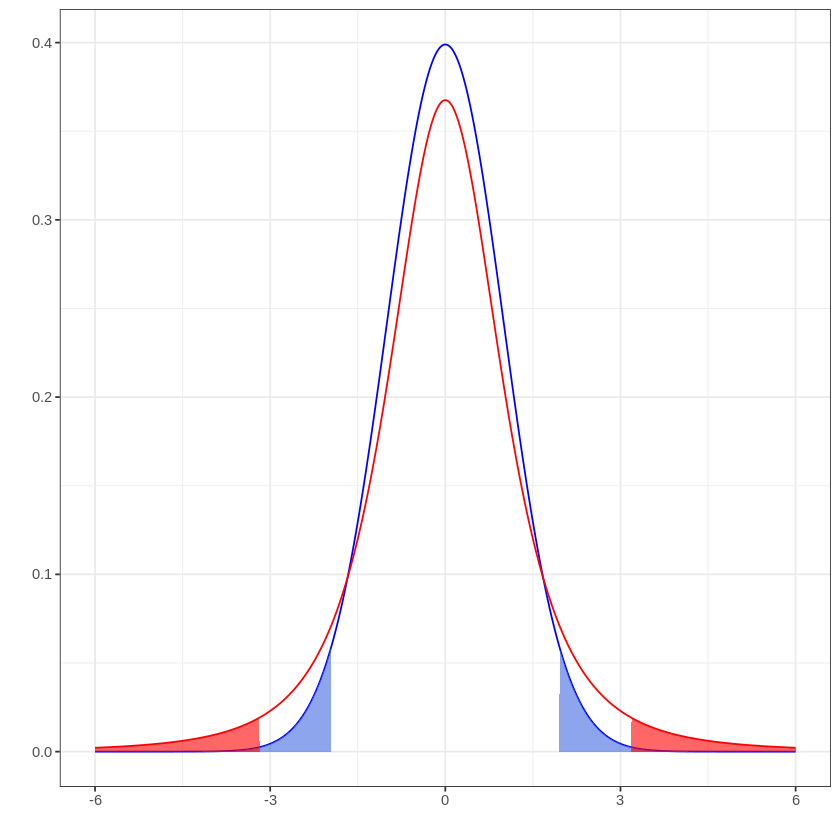

In [ ]:
Z_Value = qnorm(p = 0.025,mean = 0, sd = 1)
T_Value = qt(p = 0.025,df = 3)

DF$Z_CV = ifelse(DF$k < Z_Value|DF$k > Z_Value * (-1),DF$Z,0)
DF$T_CV = ifelse(DF$k < T_Value|DF$k > T_Value * (-1),DF$t,0)

ggplot(DF) +
  geom_line(aes(x = k, y = Z),col = "blue") +
  geom_area(aes(x = k, y = Z_CV),fill = 'royalblue', alpha = 0.6) +
  geom_line(aes(x = k, y = t),col = 'red') +
  geom_area(aes(x = k, y = T_CV),fill = 'red', alpha = 0.6) +
  theme_bw() + ylab("") + xlab("")

## Probability Distribution Functions
### Random Number Generation

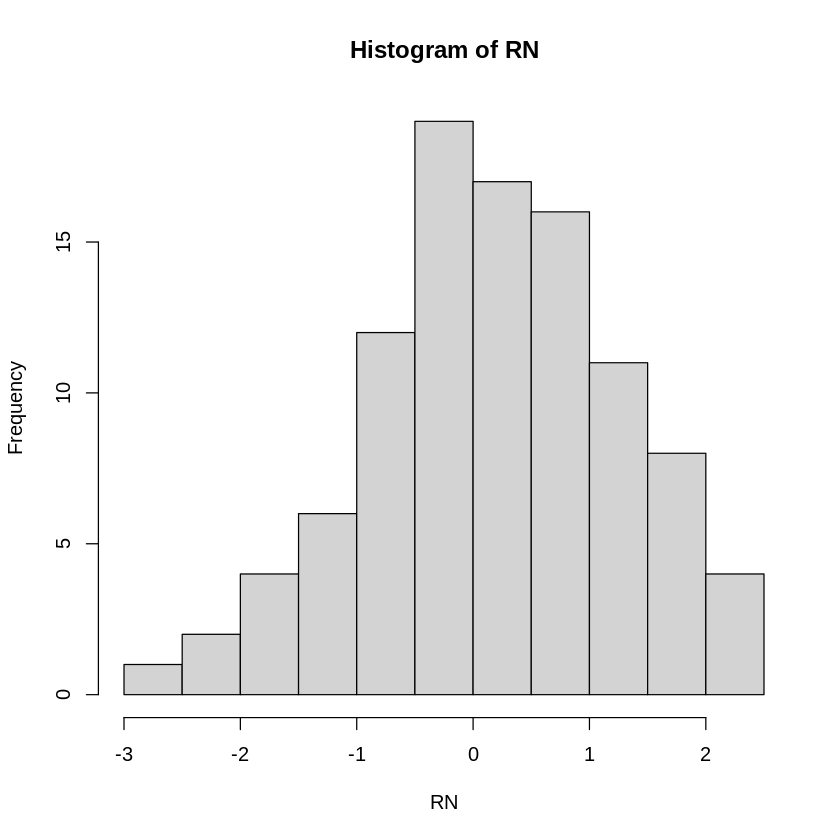

In [ ]:
# Generating Random Numbers from a Normal Distribution - rnorm()
RN = rnorm(n = 100, mean = 0, sd = 1)
hist(RN)

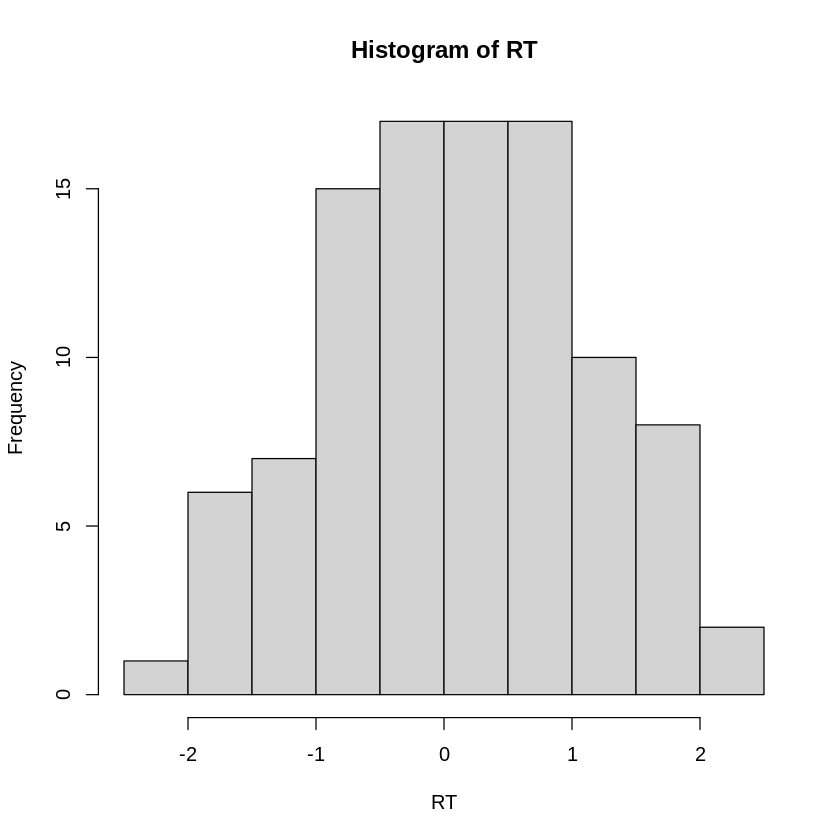

In [ ]:
# Generating Random Numbers from a t-Distribution - rt()
RT = rt(n = 100, df = 9)
hist(RT)

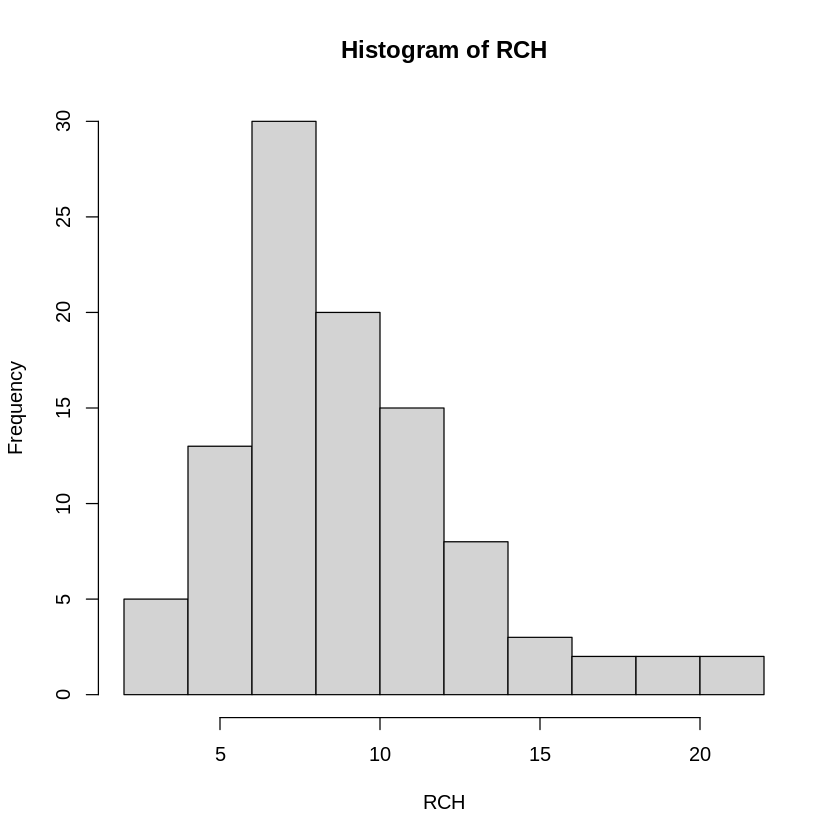

In [ ]:
# Generating Random Numbers from a Chi-Square Distribution - rchisq()
RCH = rchisq(n = 100, df = 9)
hist(RCH)

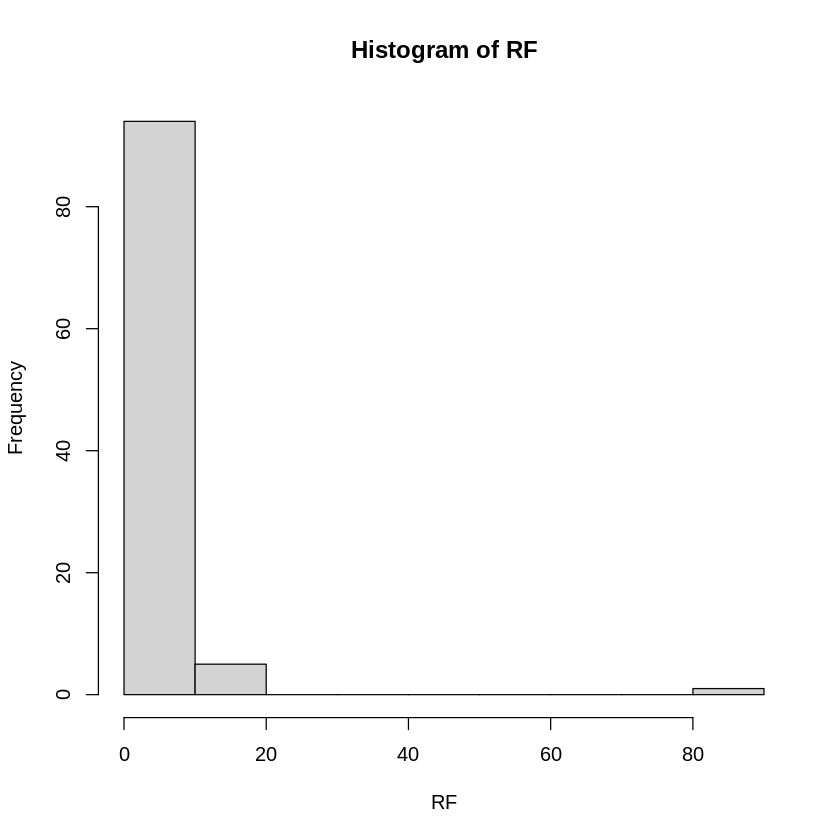

In [ ]:
# Generating Random Numbers from an F-Distribution - rf()
RF = rf(n = 100, df1 = 2, df2 = 3)
hist(RF)

### Probability Density, Cumulative Distribution, and Quantiles

In [ ]:
# Probability Density Function (PDF) - dnorm()
dnorm(x = 0.1, mean = 0, sd = 1)
dt(x = 0.1, df = 9)

[1] 0.3969525

[1] 0.3858863

In [ ]:
# Cumulative Distribution Function (CDF) - pnorm()
pnorm(q = 0.1, mean = 0, sd = 1)
pnorm(q = 0, mean = 0, sd = 1)

[1] 0.5398278

[1] 0.5

In [ ]:
# Quantile Function - qnorm()
qnorm(p = 0.1, mean = 0, sd = 1)
qnorm(p = 0.5, mean = 0, sd = 1)

[1] -1.281552

[1] 0

## Exploring Data Distribution to Analyze Used Car Price Distribution

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1490   15131   20200   22897   27990  145000 

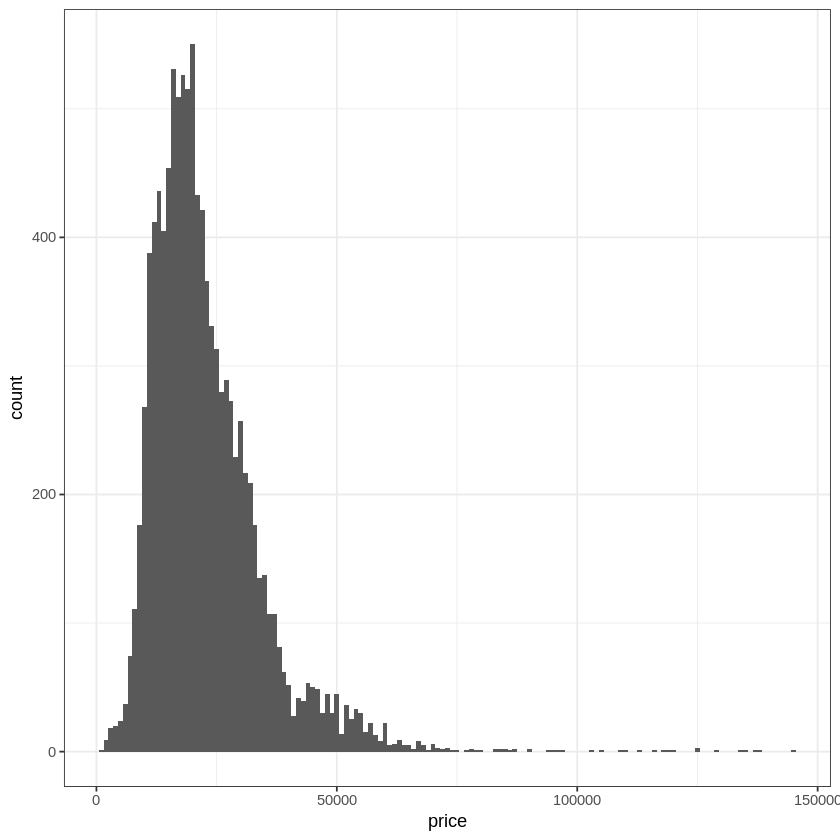

In [ ]:
summary(Audi$price)
ggplot(Audi) +
  geom_histogram(aes(x = price), binwidth = 1000) +
  theme_bw()

In [ ]:
# Check Skewness
install.packages("fBasics")
library(fBasics)
skewness(Audi$price)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘timeDate’, ‘timeSeries’, ‘gss’, ‘stabledist’




[1] 2.276683
attr(,"method")
[1] "moment"

In [ ]:
# Check Kurtosis
kurtosis(Audi$price)

[1] 11.66285
attr(,"method")
[1] "excess"

### Exploring Distribution Through Data Transformation

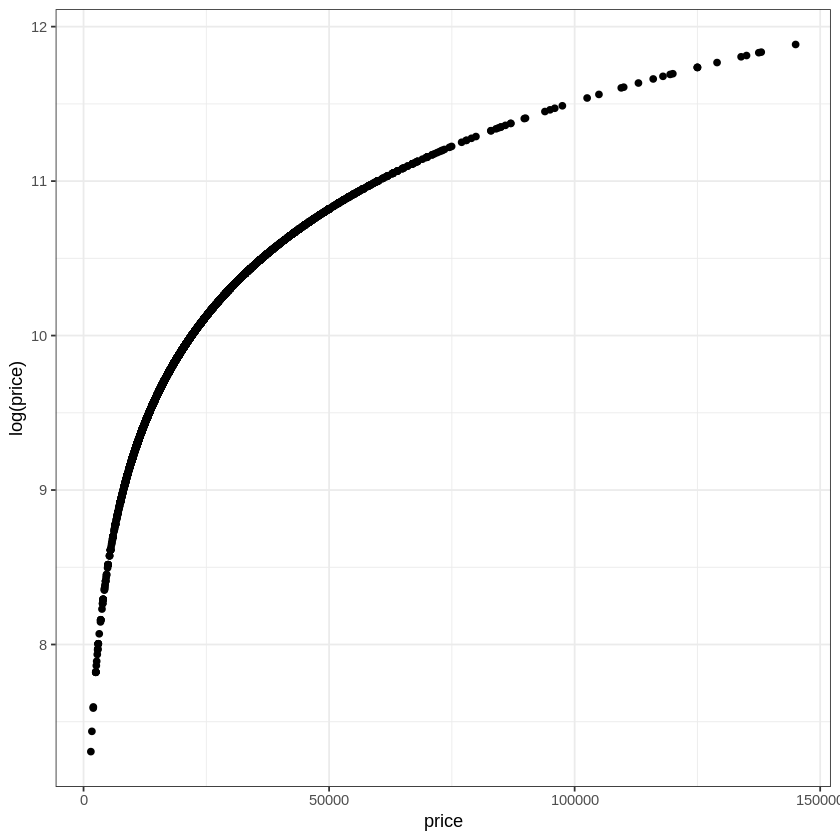

In [ ]:
# Log Transformation of Data
ggplot(Audi) +
  geom_point(aes(x = price, y = log(price))) +
  theme_bw()

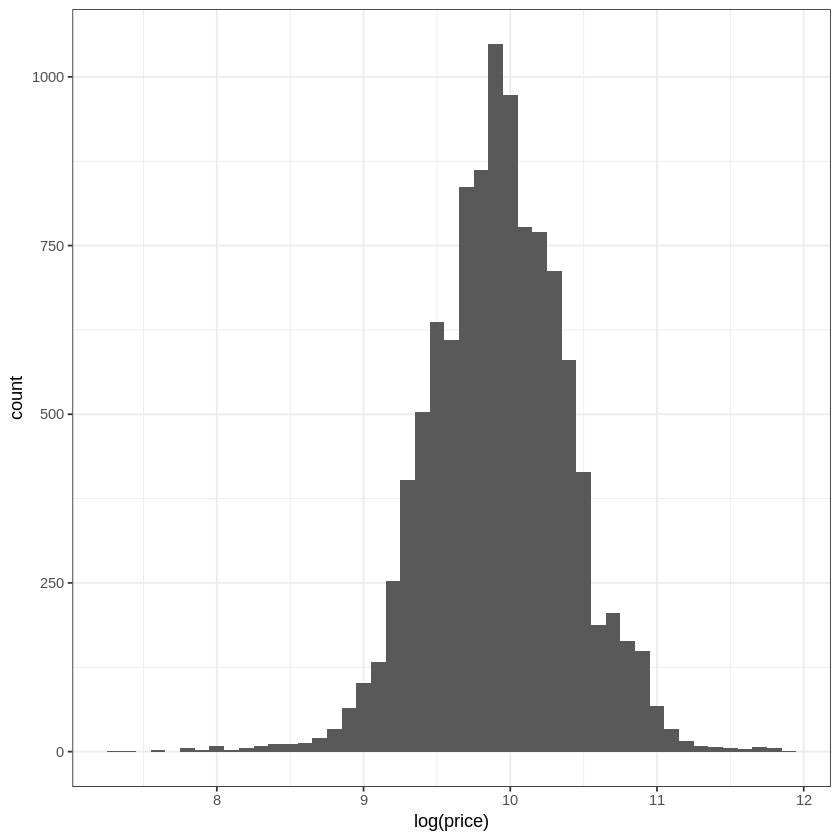

In [ ]:
ggplot(Audi) +
  geom_histogram(aes(x = log(price)), binwidth = 0.1) +
  theme_bw()

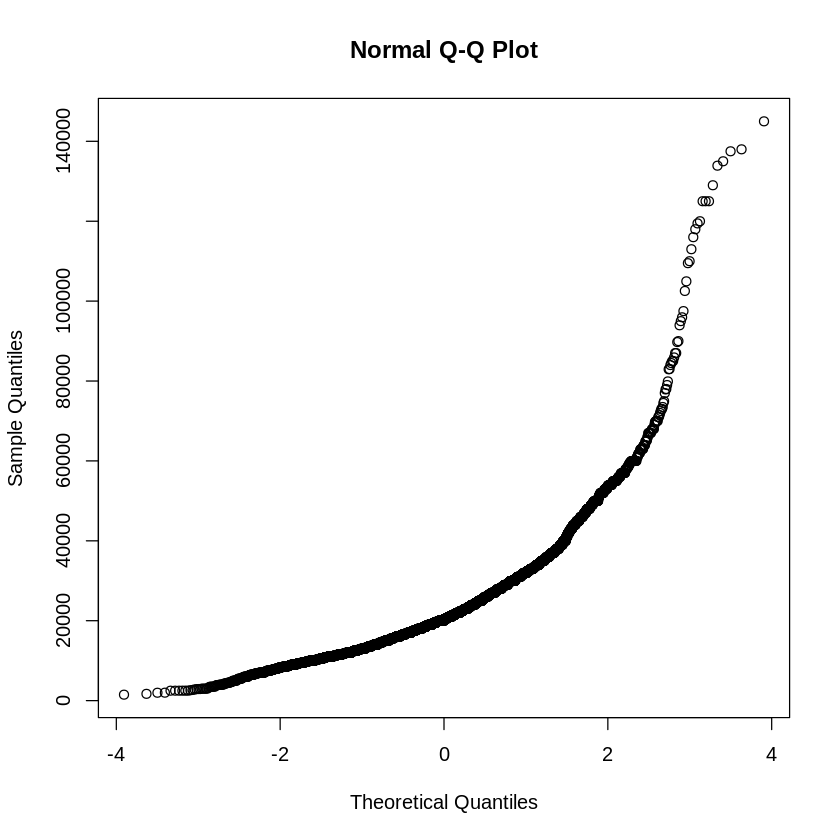

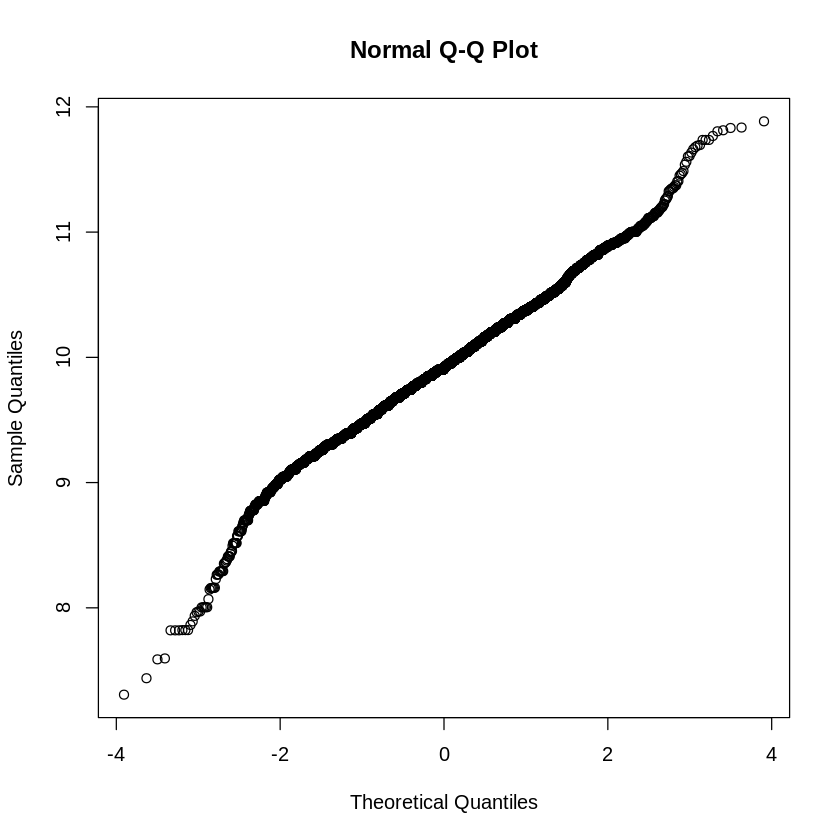

In [ ]:
qqnorm(Audi$price)
qqnorm(log(Audi$price))

## Statistical Hypothesis Testing for Used Car Price Analysis
### Null Hypothesis and Alternative Hypothesis

In [ ]:
# Data Sample
set.seed(1234)
SL = sample(1:nrow(Audi), nrow(Audi) * 0.7, replace = FALSE)

Sample = Audi[SL,]

* First, the sample() function was used to randomly extract 70% of the data.

In [ ]:
# Calculation of Mean, Standard Deviation, and Quantiles
Mean = mean(log(Sample$price))
Sd = sd(log(Sample$price))
n = nrow(Sample)
t0025 = qt(p = 0.025, df = n-1)
t0975 = qt(p = 0.975, df = n-1)

In [ ]:
# Confidence Interval Calculation
Lower = Mean + t0025 * Sd/sqrt(n)
Lower

Upper = Mean + t0975* Sd/sqrt(n)
Upper

mean(log(Audi$price))

[1] 9.915643

[1] 9.937139

[1] 9.928069

* The 95% confidence interval for log(price) is [9.915, 9.937]. This means that, based on the current sample, there is a 95% probability that the computed confidence interval contains the true population mean of log(price).

* For the entire Audi dataset, the calculated mean of log(price) is 9.92. If we assume the entire Audi dataset represents the population, then the confidence interval derived from the sample includes the true population mean, confirming its reliability.

### Test Statistic and Critical Value

In [ ]:
# Test Statistic and Critical Value
mu = 9.94
Tvalue = (Mean - mu)/(Sd/sqrt(n))
Tvalue

Critical_Value = qt(p = 0.025, df = n-1)
Critical_Value

[1] -2.482155

[1] -1.960282

In [ ]:
# p-Value and Significance Level
Pvalue = pt(q = Tvalue, df = n-1) * 2
Pvalue

Significant_Value = pt(q = Critical_Value, df = n-1) * 2
Significant_Value

[1] 0.01308087

[1] 0.05

## Mean Analysis for Used Car Feature Analysis
### One-Sample t-Test

In [ ]:
t.test(log(Sample$price),mu = 9.94)


	One Sample t-test

data:  log(Sample$price)
t = -2.4822, df = 7466, p-value = 0.01308
alternative hypothesis: true mean is not equal to 9.94
95 percent confidence interval:
 9.915643 9.937139
sample estimates:
mean of x 
 9.926391 


* The test statistic t = -2.4822 and the p-value from the output indicate that we reject the null hypothesis that the mean of the log-transformed used car prices is 9.94. Since the p-value is below the significance level (typically 0.05), there is statistically significant evidence that the mean log(price) differs from 9.94.

### Independent Samples t-Test

In [ ]:
# # Test for Equal Variances (Homogeneity of Variance)
install.packages("car")
library(car)
Audi_NonHybrid$fuelType = factor(Audi_NonHybrid$fuelType,
                                 levels = c("Petrol","Diesel"))
leveneTest(log(Audi_NonHybrid$price) ~ Audi_NonHybrid$fuelType)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:fBasics’:

    densityPlot


The following object is masked from ‘package:dplyr’:

    recode




Df    F value  Pr(>F)      
group     1 145.6451 2.560995e-33
      10638       NA           NA

In [ ]:
t.test(log(Audi_NonHybrid$price) ~ Audi_NonHybrid$fuelType ,
       var.equal = FALSE)


	Welch Two Sample t-test

data:  log(Audi_NonHybrid$price) by Audi_NonHybrid$fuelType
t = 0.0078653, df = 10585, p-value = 0.9937
alternative hypothesis: true difference in means between group Petrol and group Diesel is not equal to 0
95 percent confidence interval:
 -0.01768657  0.01782908
sample estimates:
mean in group Petrol mean in group Diesel 
            9.927492             9.927421 


* The analysis results show that the test statistic (t) is 0.007 and the p-value is 0.9937. Since the p-value is greater than the significance level (0.05), we fail to reject the null hypothesis. This means there is no statistically significant difference between the two groups' means. The 95% confidence interval is [-0.017, 0.017], which includes 0. When the confidence interval contains 0, it indicates that the means of the two groups are statistically equal. From the sample estimates, both groups have a mean log(price) of 9.92, confirming that their averages are nearly identical.

### Analysis of variance (ANOVA)

In [ ]:
# Analysis of variance
ANOVA = aov(log(Audi$price) ~ Audi$fuelType)
summary(ANOVA)

                 Df Sum Sq Mean Sq F value Pr(>F)  
Audi$fuelType     2    1.5  0.7631   3.443  0.032 *
Residuals     10665 2363.8  0.2216                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

* The test statistic (F-value) is 3.443, and the p-value (Pr > F) is 0.032. Since the p-value is smaller than the significance level (0.05), we reject the null hypothesis, which states that the mean log-transformed used car prices are the same across all fuel types.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘corrplot’, ‘ggrepel’, ‘ggsci’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’


Warning message in (function (mapping = NULL, data = NULL, geom = "boxplot", position = "dodge2", :
“Ignoring unknown aesthetics: fill”


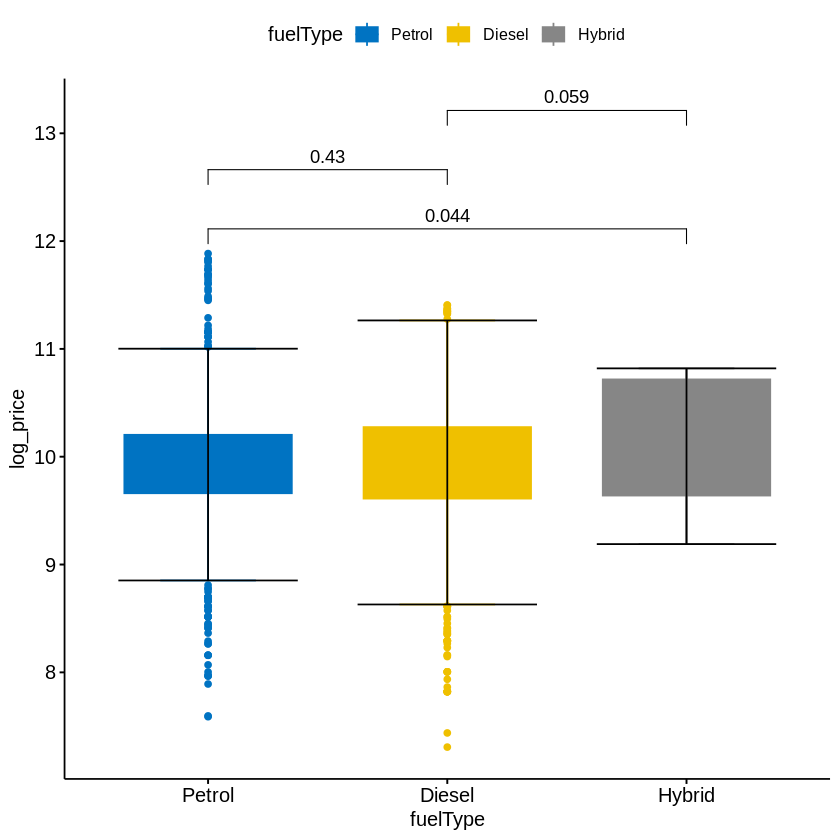

In [ ]:
install.packages("ggpubr")
library(ggpubr)
my_comparisons = list(c("Petrol","Hybrid"),
                      c("Petrol","Diesel"),
                      c("Diesel","Hybrid"))

Audi %>%
  mutate(log_price = log(price)) %>%
  ggboxplot(x = "fuelType", y = "log_price",
            bxp.errorbar =  TRUE, color = "fuelType", palette = "jco",
            fill = "fuelType") +
  stat_boxplot(geom = "errorbar",
               aes(x = fuelType, y = log_price)) +
  stat_compare_means(comparisons = my_comparisons)

* The box plot results show the p-values for the two-sample t-tests conducted for each pair of fuel types. From this, we can confirm that there is a significant mean difference between petrol and hybrid fuel types.

In [ ]:
# Two way ANOVA
ANOVA2 = aov(log(Audi$price) ~ Audi$fuelType * Audi$transmission)
summary(ANOVA2)

                                   Df Sum Sq Mean Sq  F value   Pr(>F)    
Audi$fuelType                       2    1.5     0.8    4.888  0.00756 ** 
Audi$transmission                   2  687.6   343.8 2202.012  < 2e-16 ***
Audi$fuelType:Audi$transmission     3   11.8     3.9   25.141 3.35e-16 ***
Residuals                       10660 1664.4     0.2                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

`summarise()` has grouped output by 'fuelType'. You can override using the
`.groups` argument.
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”


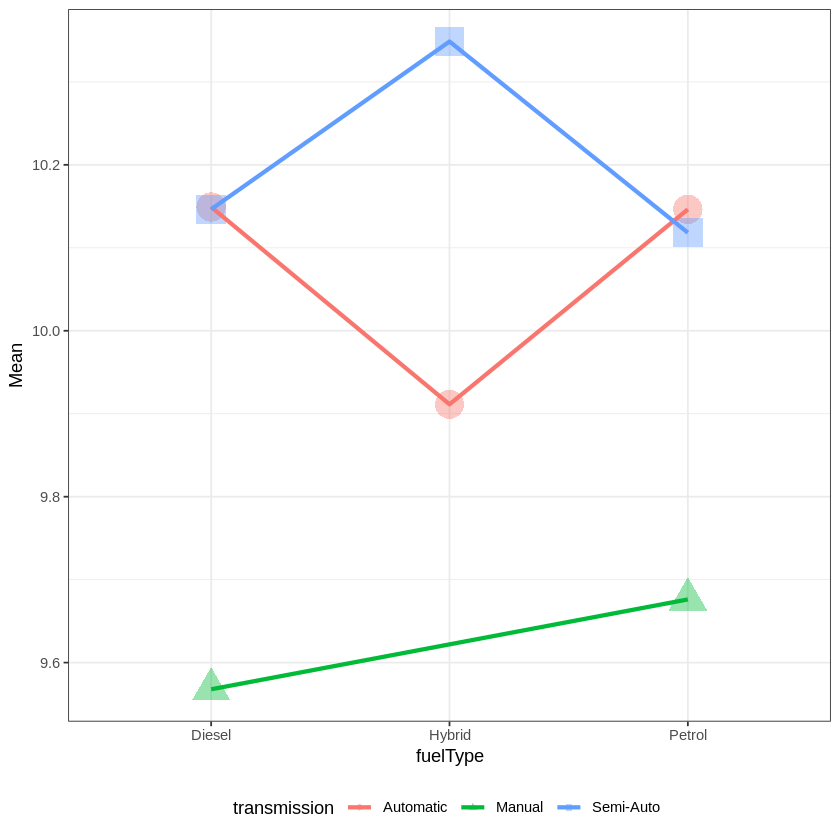

In [ ]:
Audi %>%
  group_by(fuelType, transmission) %>%
  summarise(Mean = mean(log(price))) %>%
  ggplot() +
  geom_point(aes(x = fuelType, y = Mean, col = transmission,
                 shape = transmission, size = Mean), alpha = 0.4) +
  geom_line(aes(x = fuelType, y = Mean, col = transmission, group = transmission),
            size = 1.2) +
  scale_size_area(max_size = 8) +
  guides(size = FALSE) +
  theme_bw() +
  theme(legend.position = "bottom")

## Relationship Analysis to Identify Factors Affecting Used Car Prices

### Correlation Analysis

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


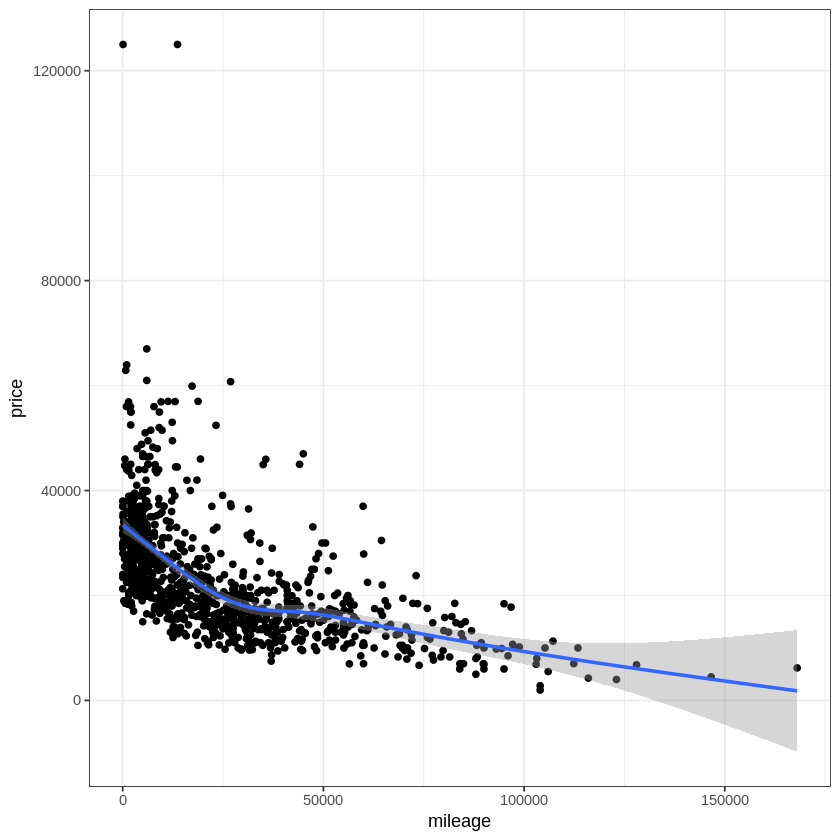

In [ ]:
# Correlation Analysis
Audi %>%
  sample_n(size = 1000, replace = FALSE) %>%
  ggplot() +
  geom_point(aes(x = mileage, y = price)) +
  geom_smooth(aes(x = mileage, y = price)) +
  theme_bw()

* As mileage increases, the used car price tends to decrease. However, it is uncertain whether this relationship is strictly linear.

In [ ]:
cor(Audi$mileage, Audi$price)

[1] -0.5353571

* The analysis results show that the correlation coefficient between mileage and price is -0.53, indicating a moderate negative correlation. This suggests that higher mileage is generally associated with lower prices, but the relationship may not be perfectly linear.

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


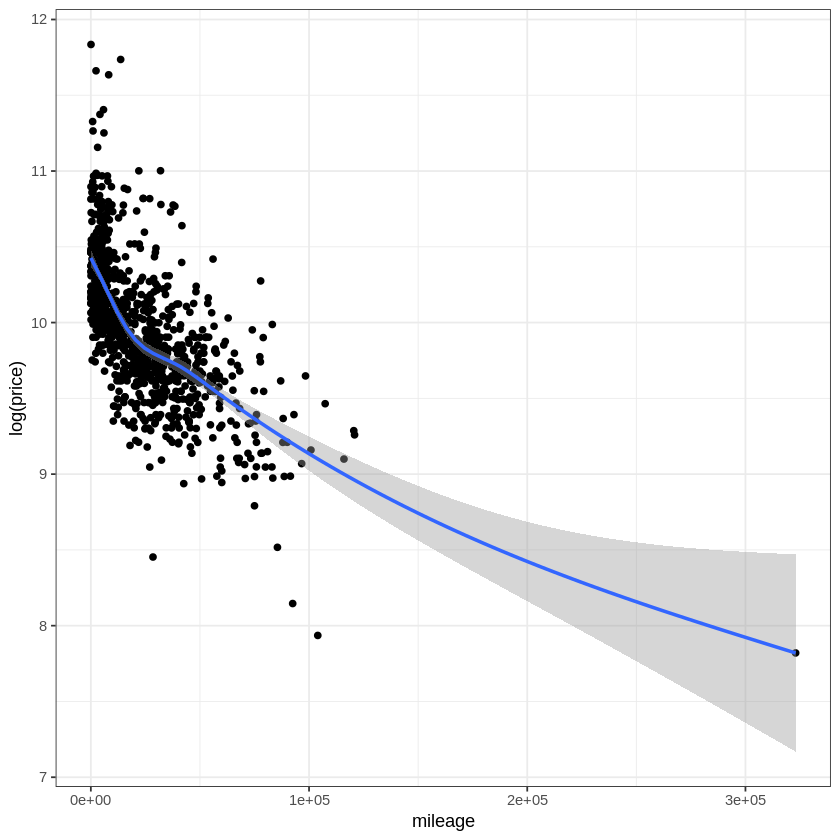

In [ ]:
Audi %>%
  sample_n(size = 1000, replace = FALSE) %>%
  ggplot() +
  geom_point(aes(x = mileage, y = log(price))) +
  geom_smooth(aes(x = mileage, y = log(price))) +
  theme_bw()

* The relationship is less extreme compared to the previous analysis.

In [ ]:
cor(Audi$mileage, log(Audi$price))

[1] -0.6811704

* The correlation analysis results indicate that when using log-transformed values, the negative correlation between mileage and price is stronger than in the original data. This suggests that log transformation enhances the linearity of the relationship, making it more suitable for further statistical modeling.

### Regression Analysis

In [ ]:
# Regression Analysis
set.seed(1234)
SL = sample(1:nrow(Audi), nrow(Audi) * 0.7, replace = FALSE)

Sample = Audi[SL,]

Reg1 = lm(price ~ mileage, data = Sample)

summary(Reg1)


Call:
lm(formula = price ~ mileage, data = Sample)

Residuals:
   Min     1Q Median     3Q    Max 
-17758  -6010  -1988   3233 108415 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.960e+04  1.649e+02  179.48   <2e-16 ***
mileage     -2.700e-01  4.833e-03  -55.87   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9740 on 7465 degrees of freedom
Multiple R-squared:  0.2949,	Adjusted R-squared:  0.2948 
F-statistic:  3122 on 1 and 7465 DF,  p-value: < 2.2e-16


* Call~ represents the dependent variable and predictor used in the regression analysis, indicating that the effect of mileage on price has been analyzed.

  The Estimate for mileage represents the slope coefficient in the regression model. When converted to a simple numerical value, it is -0.27, meaning that for every 1-unit increase in mileage, the price decreases by 0.27. This confirms a negative relationship between mileage and price.

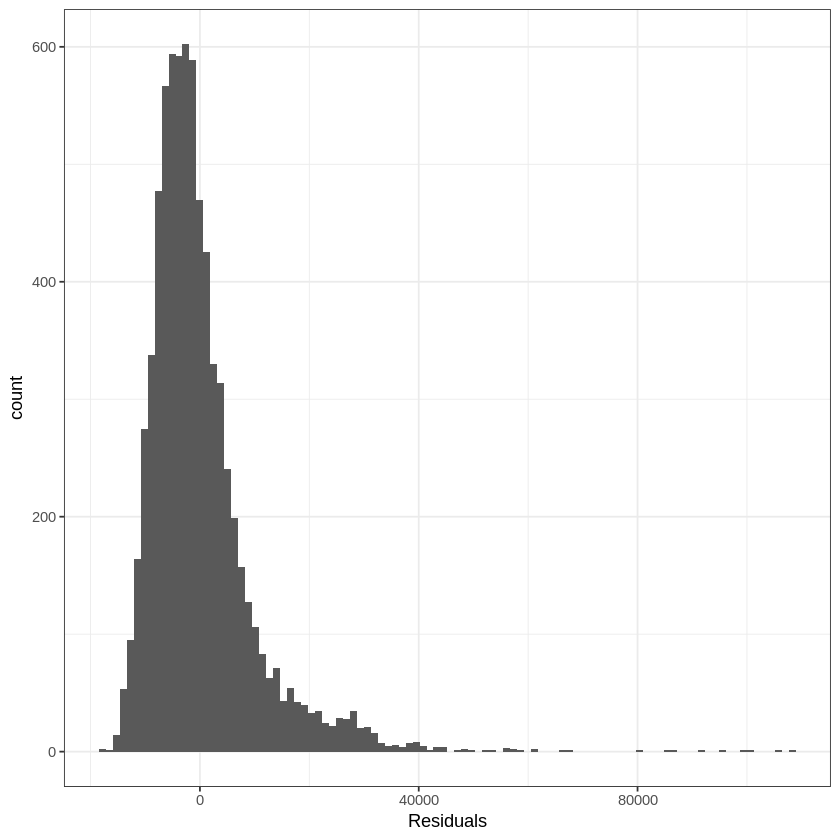

In [ ]:
# Normality of Residuals
ggplot(NULL) +
  geom_histogram(aes(x = Reg1$residuals), bins = 100) +
  theme_bw() +
  xlab("Residuals")

* The graph indicates that the residuals exhibit a right-skewed distribution, confirming that the residuals do not follow a normal distribution.

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


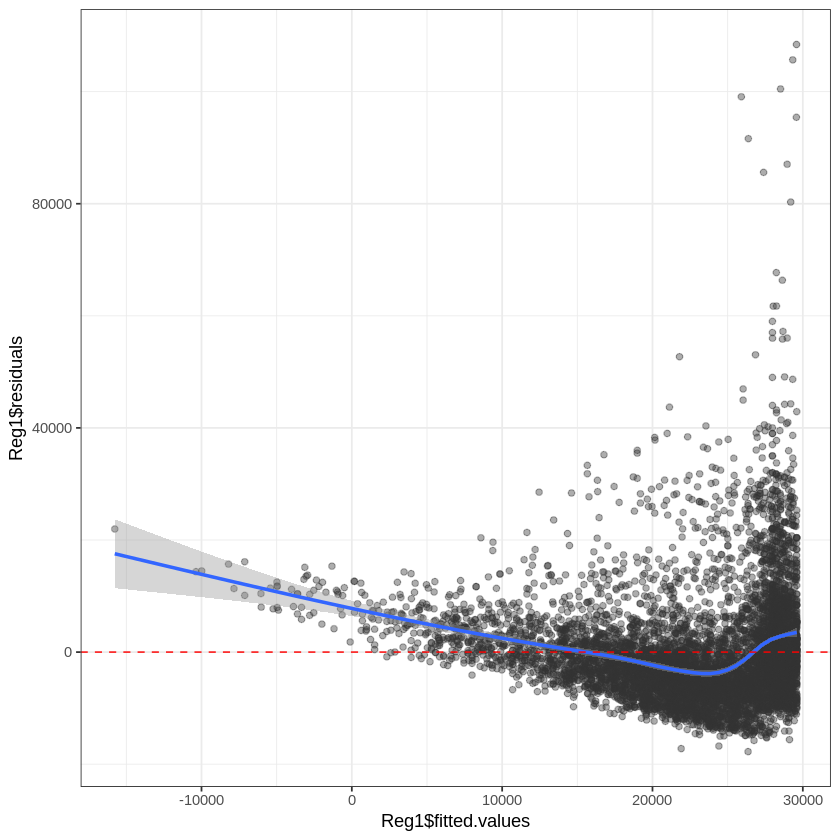

In [ ]:
# Homoscedasticity of Residuals (Equal Variance Assumption)
ggplot(NULL) +
  geom_point(aes(x = Reg1$fitted.values, y = Reg1$residuals),
             alpha = 0.4, col = "grey20") +
  geom_smooth(aes(x = Reg1$fitted.values, y = Reg1$residuals)) +
  geom_hline(yintercept = 0, linetype = "dashed", col = "red",alpha = 0.8) +
  theme_bw()

* In the residuals vs. fitted values plot, the x-axis represents the predicted values from the regression model, and the y-axis represents the residuals. The pattern of residuals first decreasing and then increasing suggests that the variance is not constant, meaning the regression model fails to meet the homoscedasticity assumption.

  This violation of equal variance (heteroscedasticity) suggests that the model may need transformation, weighted regression, or robust standard errors for better reliability.

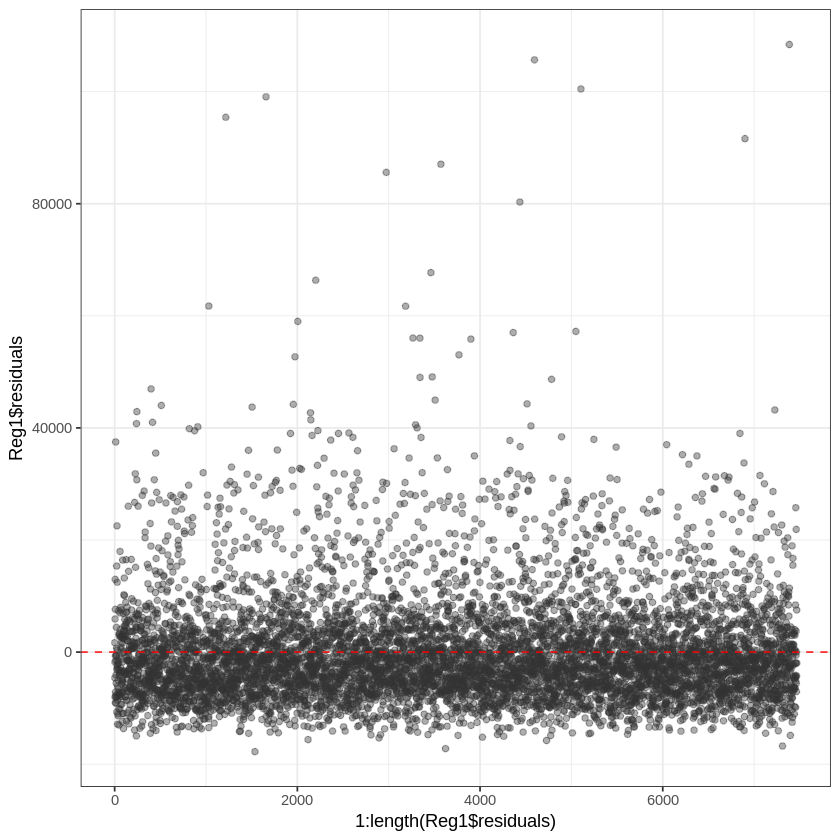

In [ ]:
# Independence of Residuals
ggplot(NULL) +
  geom_point(aes(x = 1:length(Reg1$residuals), y = Reg1$residuals),
             alpha = 0.4, col = "grey20") +
  geom_hline(aes(yintercept = mean(Reg1$residuals)),
             linetype = "dashed", col = "red",alpha = 0.8) +
  theme_bw()

* There is no identifiable pattern in the residuals over time, indicating that the residuals do not exhibit autocorrelation.

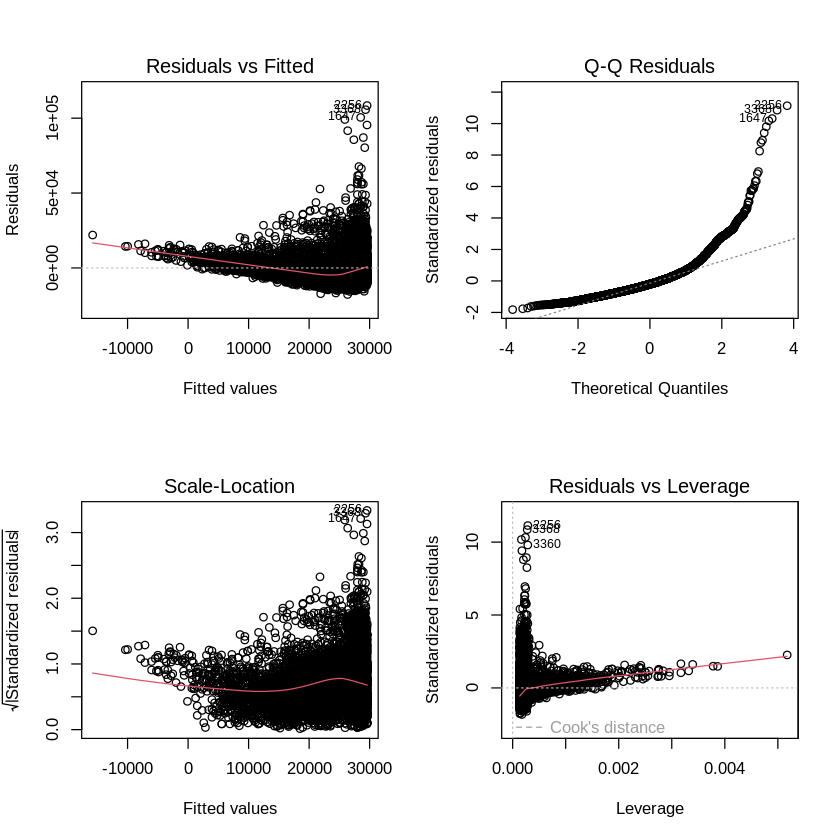

In [ ]:
par(mfrow = c(2,2))
plot(Reg1)

### Improving Regression Model Performance
#### Enhancing Performance through Data Transformation

In [ ]:
# Perform regression analysis after log transformation
Reg2 = lm(log(price) ~ mileage, data = Sample)
summary(Reg2)


Call:
lm(formula = log(price) ~ mileage, data = Sample)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.56588 -0.22153 -0.02413  0.18496  1.65390 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.027e+01  5.868e-03 1750.41   <2e-16 ***
mileage     -1.385e-05  1.720e-07  -80.55   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3466 on 7465 degrees of freedom
Multiple R-squared:  0.465,	Adjusted R-squared:  0.4649 
F-statistic:  6488 on 1 and 7465 DF,  p-value: < 2.2e-16


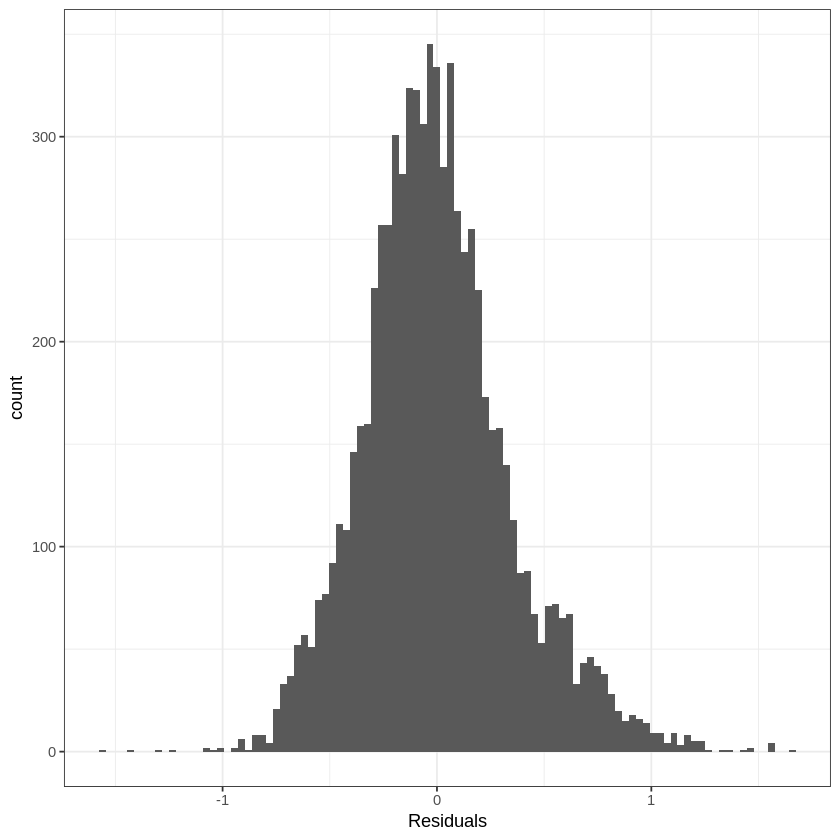

In [ ]:
ggplot(NULL) +
  geom_histogram(aes(x = Reg2$residuals), bins = 100) +
  theme_bw() +
  xlab("Residuals")

* The residuals of the newly estimated regression model exhibit a shape similar to a normal distribution. This suggests that the log transformation has improved the model by stabilizing variance and making the residuals closer to normality, thereby better satisfying the assumptions of linear regression.

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


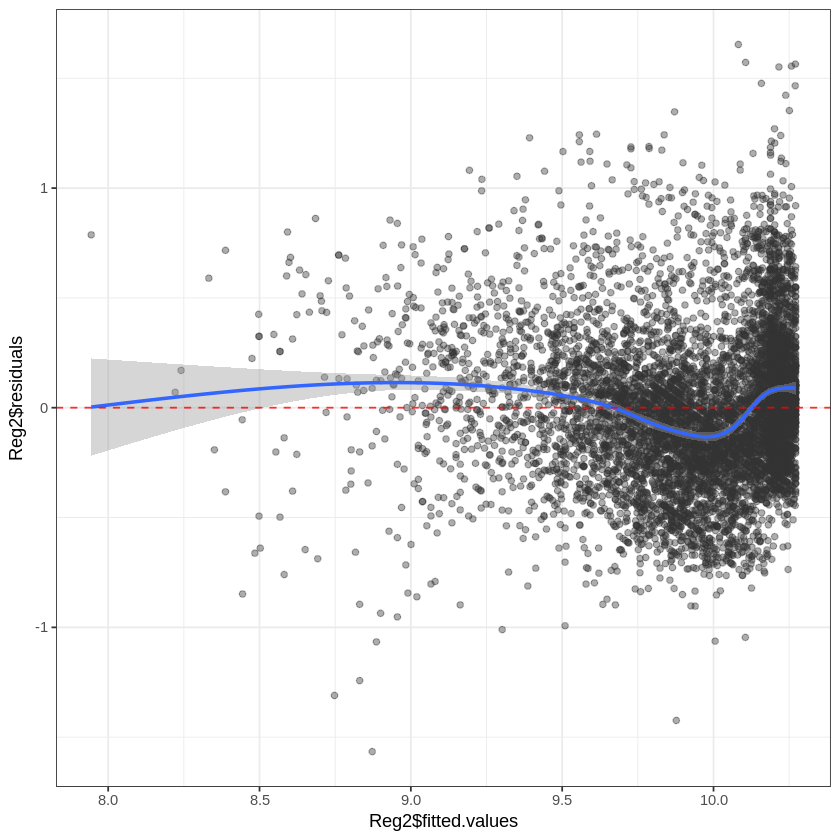

In [ ]:
ggplot(NULL) +
  geom_point(aes(x = Reg2$fitted.values, y = Reg2$residuals),
             alpha = 0.4, col = "grey20") +
  geom_smooth(aes(x = Reg2$fitted.values, y = Reg2$residuals)) +
  geom_hline(yintercept = 0, linetype = "dashed", col = "red",alpha = 0.8) +
  theme_bw()

* Homoscedasticity has improved significantly, just like normality.

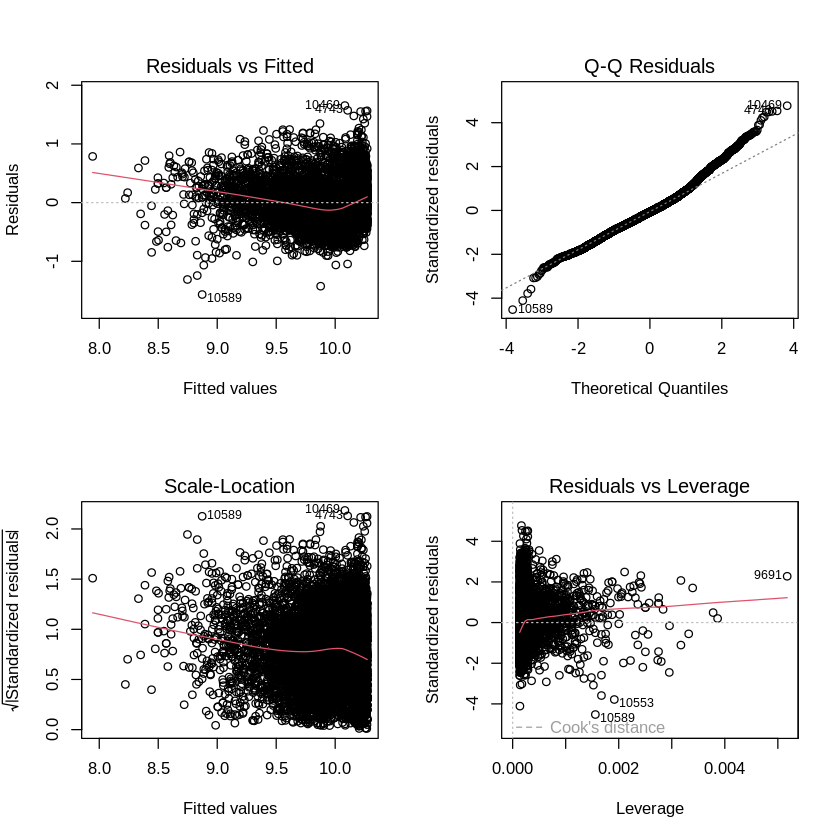

In [ ]:
par(mfrow = c(2,2))
plot(Reg2)

* Overall, the model performance has noticeably improved.

#### Performance Improvement Through Influential Point Analysis

`geom_smooth()` using formula = 'y ~ x'


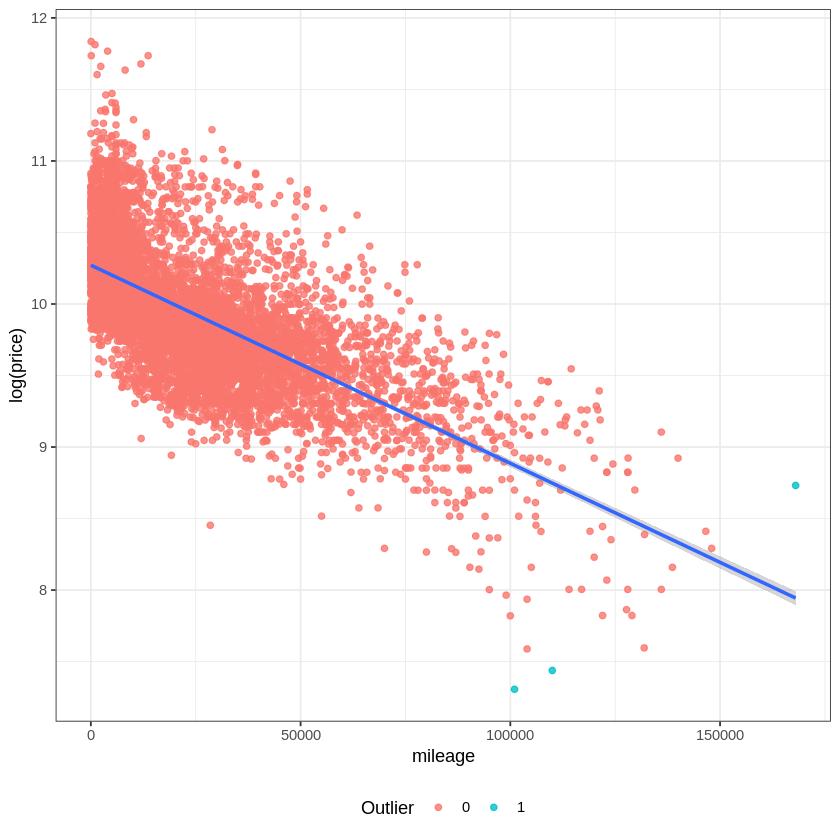

In [ ]:
Index = c(9691, 10553, 10589)
Sample$Outlier = 0
Sample$Outlier[rownames(Sample) %in% Index] = 1

ggplot(Sample) +
  geom_point(aes(x = mileage, y = log(price),
                 col = as.factor(Outlier)),
             alpha = 0.8) +
  geom_smooth(aes(x = mileage, y = log(price)),
              method = 'lm') +
  labs(col = "Outlier") +
  theme_bw() +
  theme(legend.position = "bottom")

* After identifying the presence of influential points, three influential points were found to have significantly high mileage values and were far from the regression line.

In [ ]:
Sample2 = Sample[!rownames(Sample) %in% Index,]
Reg2_2 = lm(log(price) ~ mileage, data = Sample2)
summary(Reg2_2)


Call:
lm(formula = log(price) ~ mileage, data = Sample2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.42438 -0.22149 -0.02449  0.18460  1.65395 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.027e+01  5.862e-03 1752.17   <2e-16 ***
mileage     -1.382e-05  1.722e-07  -80.25   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3457 on 7462 degrees of freedom
Multiple R-squared:  0.4632,	Adjusted R-squared:  0.4631 
F-statistic:  6439 on 1 and 7462 DF,  p-value: < 2.2e-16


* Removing these data points did not significantly improve performance.

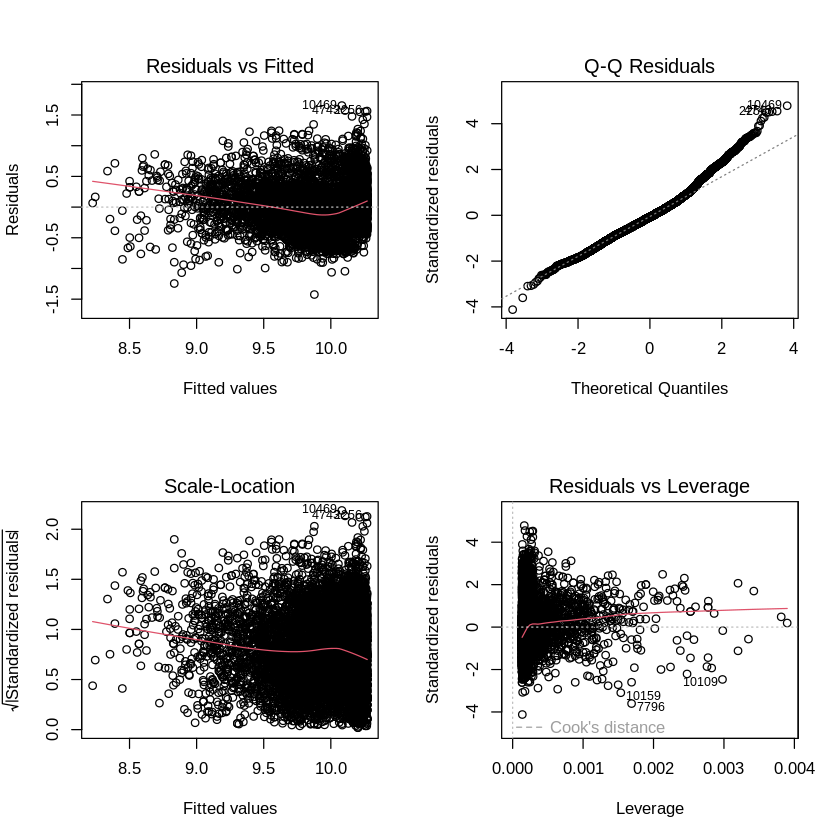

In [ ]:
par(mfrow = c(2,2))
plot(Reg2_2)

### Prediction Using Regression Analysis

In [ ]:
# Prediction Using the Model
TEST = Audi[-SL,]
Predicted = predict(Reg2_2, newdata = TEST)
MSE = mean((log(TEST$price) - Predicted)^2)
MSE

[1] 0.1160273

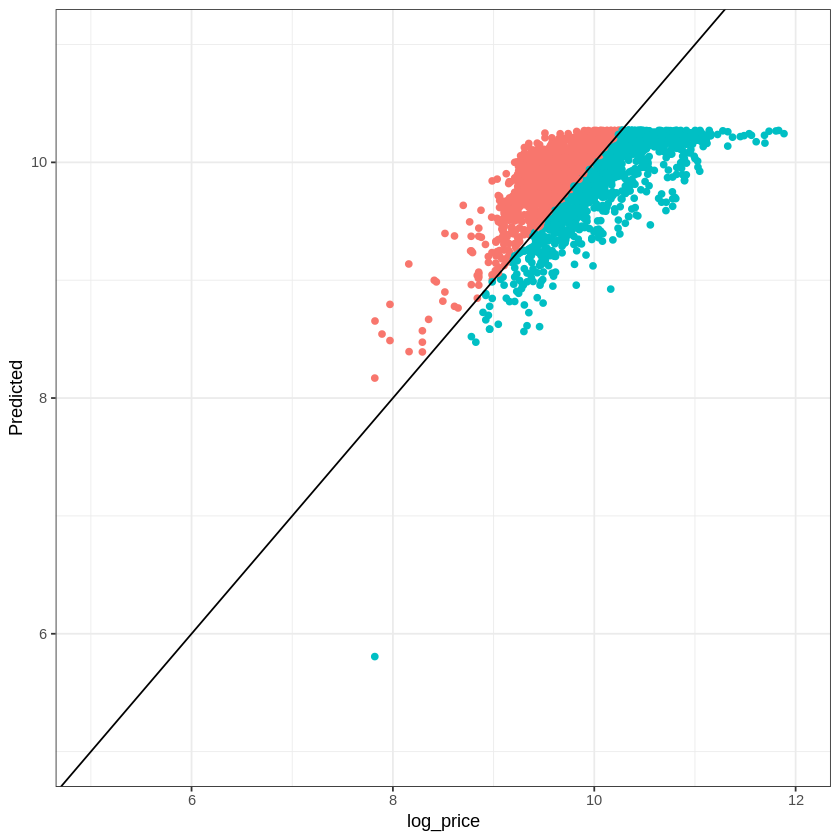

In [ ]:
TEST_DF = data.frame(
  log_price = log(TEST$price),
  Predicted = Predicted,
  Col = ifelse(log(TEST$price) > Predicted,"+","-")
)

ggplot(TEST_DF) +
  geom_point(aes(x = log_price, y = Predicted,col = Col)) +
  geom_abline(slope = 1, intercept = 0) +
  scale_x_continuous(limits = c(5,12)) +
  scale_y_continuous(limits = c(5,11)) +
  guides(col = FALSE) +
  theme_bw()

* If the prediction results are good, the points should be clustered around the solid line. However, according to the graph, the regression line does not predict well for high price values, indicating that the model struggles with higher price ranges.

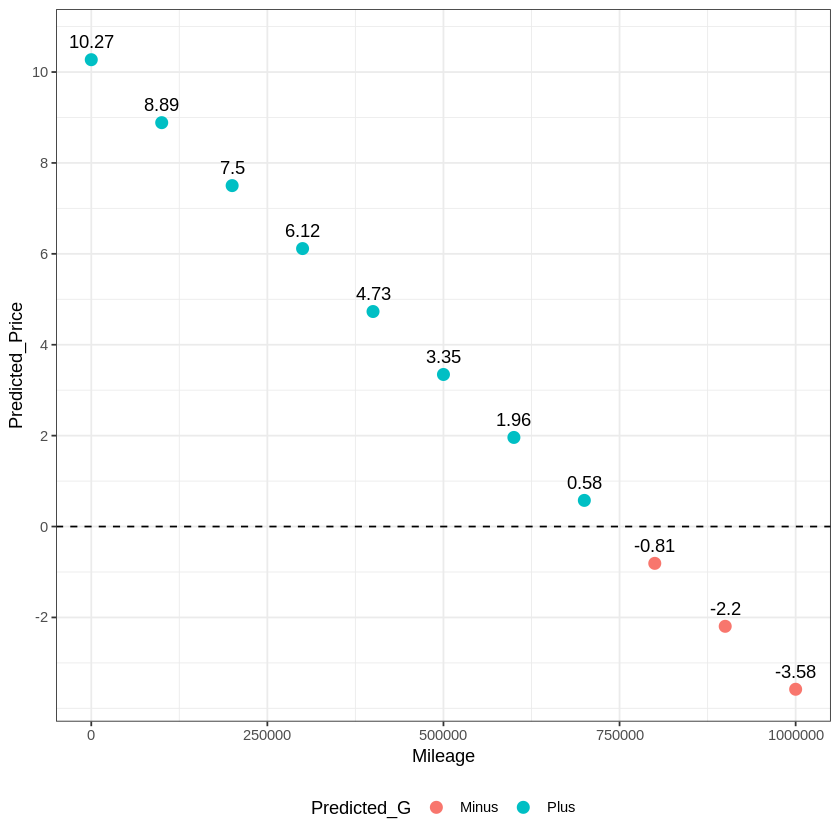

In [ ]:
# Limitations of the Linear Model
New_DF = data.frame(
  mileage = seq(0,1000000,by = 100000)
  )

Predicted = predict(Reg2, newdata = New_DF)

New_DF$Predicted = Predicted

New_DF$Predicted_G = ifelse(New_DF$Predicted > 0,"Plus","Minus")

ggplot(New_DF) +
  geom_point(aes(x = mileage, y = Predicted, col = Predicted_G), size = 3) +
  geom_text(aes(x = mileage, y = Predicted + 0.4, label = round(Predicted,2))) +
  geom_hline(yintercept = 0, linetype = "dashed") +
  xlab("Mileage") + ylab("Predicted_Price") +
  scale_y_continuous(breaks = seq(-2,10,by = 2)) +
  theme_bw() +
  theme(legend.position = "bottom")

* According to the graph, price changes with mileage, but when mileage becomes extremely high, the predicted used car price turns negative. This implies an unrealistic situation where the seller would have to pay to sell the car. To address this issue, a nonlinear model is needed to better capture the relationship between mileage and price and prevent such unrealistic predictions.

### Improving Prediction Performance with Nonlinear Models

In [ ]:
# Polynomial Regression
Reg3 = lm(log(price) ~ poly(mileage,2), data = Sample)
summary(Reg3)


Call:
lm(formula = log(price) ~ poly(mileage, 2), data = Sample)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.73369 -0.21822 -0.02379  0.18180  1.65671 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         9.926391   0.003968 2501.85   <2e-16 ***
poly(mileage, 2)1 -27.916110   0.342850  -81.42   <2e-16 ***
poly(mileage, 2)2   4.387796   0.342850   12.80   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3428 on 7464 degrees of freedom
Multiple R-squared:  0.4765,	Adjusted R-squared:  0.4764 
F-statistic:  3397 on 2 and 7464 DF,  p-value: < 2.2e-16


In [ ]:
Predicted2 = predict(Reg3, newdata = TEST)
MSE2 = mean((log(TEST$price) - Predicted2)^2)
MSE2

[1] 0.1148045

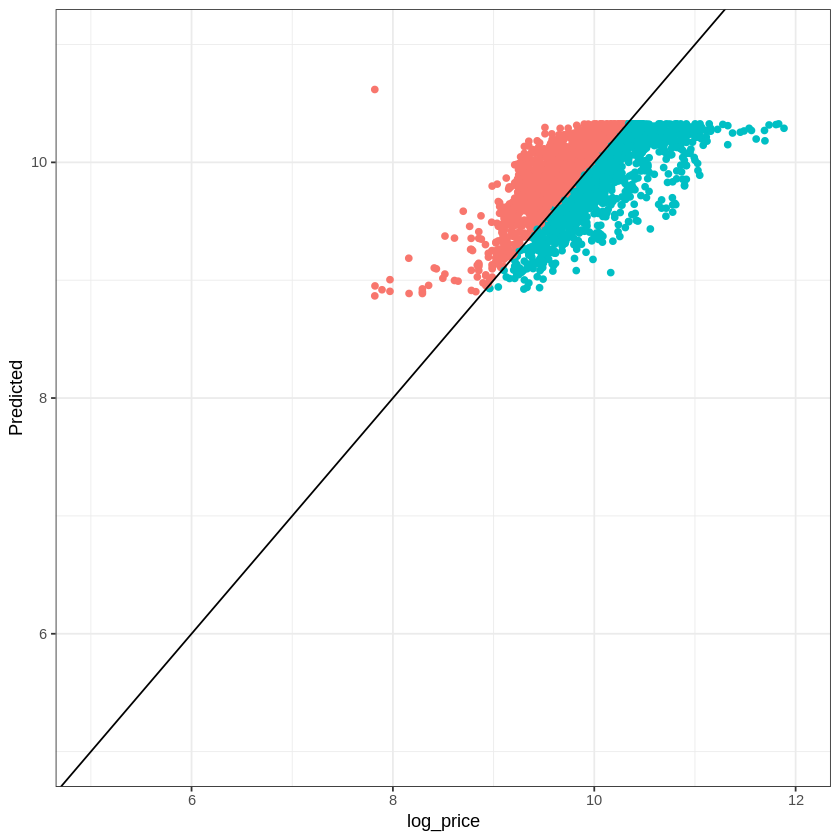

In [ ]:
TEST_DF2 = data.frame(
  log_price = log(TEST$price),
  Predicted = Predicted2,
  Col = ifelse(log(TEST$price) > Predicted2,"+","-")
)

ggplot(TEST_DF2) +
  geom_point(aes(x = log_price, y = Predicted,col = Col)) +
  geom_abline(slope = 1, intercept = 0) +
  scale_x_continuous(limits = c(5,12)) +
  scale_y_continuous(limits = c(5,11)) +
  guides(col = FALSE) +
  theme_bw()

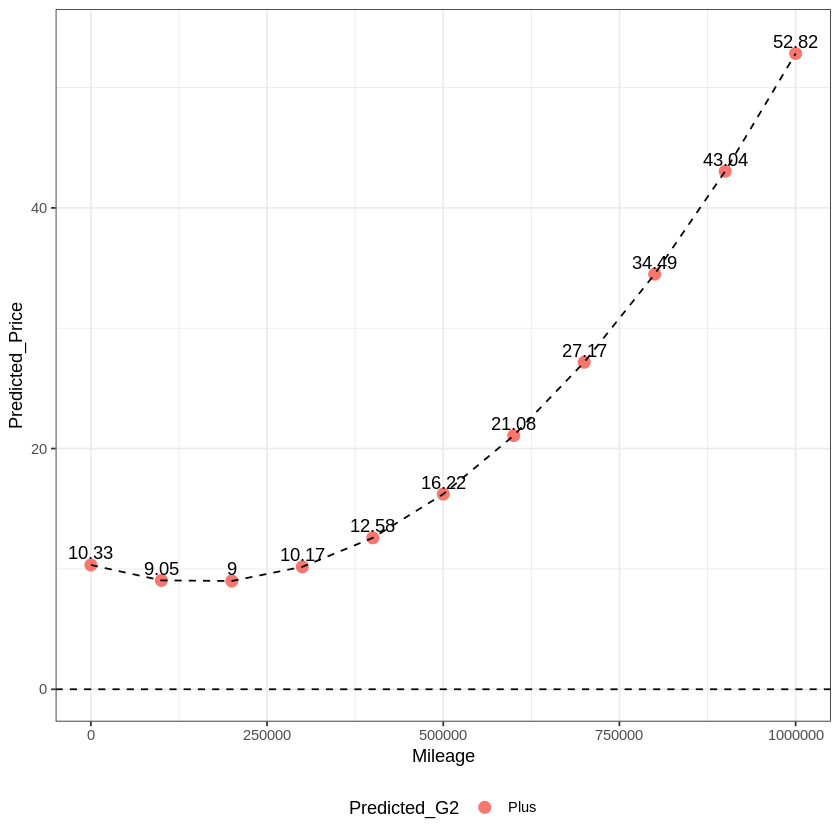

In [ ]:
Predicted2 = predict(Reg3, newdata = New_DF)

New_DF$Predicted2 = Predicted2
New_DF$Predicted_G2 = ifelse(New_DF$Predicted2 > 0,"Plus","Minus")

ggplot(New_DF) +
  geom_point(aes(x = mileage, y = Predicted2, col = Predicted_G2), size = 3) +
  geom_text(aes(x = mileage, y = Predicted2 + 1, label = round(Predicted2,2))) +
  geom_hline(yintercept = 0, linetype = "dashed") +
  geom_line(aes(x = mileage, y = Predicted2),
            group = 1, linetype = 'dashed') +
  xlab("Mileage") + ylab("Predicted_Price") +
  theme_bw() +
  theme(legend.position = "bottom")

* Ironically, as mileage increases, the predicted price also increases, which is an incorrect result. This indicates that the current method is not appropriate and that a more suitable nonlinear analysis technique is needed to better capture the true relationship between mileage and price.

In [ ]:
# Generalized Additive Model (GAM)
library(mgcv)

GAM = gam(log(price) ~ s(mileage), data = Sample)
summary(GAM)

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.9-3. For overview type 'help("mgcv-package")'.




Family: gaussian 
Link function: identity 

Formula:
log(price) ~ s(mileage)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9.926391   0.003885    2555   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
             edf Ref.df   F p-value    
s(mileage) 8.451  8.919 830  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.498   Deviance explained = 49.8%
GCV = 0.11287  Scale est. = 0.11273   n = 7467

In [ ]:
install.packages("mgcv")
library(mgcv)

GAM = gam(log(price) ~ s(mileage), data = Sample)
summary(GAM)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Family: gaussian 
Link function: identity 

Formula:
log(price) ~ s(mileage)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9.926391   0.003885    2555   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
             edf Ref.df   F p-value    
s(mileage) 8.451  8.919 830  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.498   Deviance explained = 49.8%
GCV = 0.11287  Scale est. = 0.11273   n = 7467

In [ ]:
Predicted3 = predict(GAM, newdata = TEST)
MSE3 = mean((log(TEST$price) - Predicted3)^2)
MSE3

[1] 0.1072911

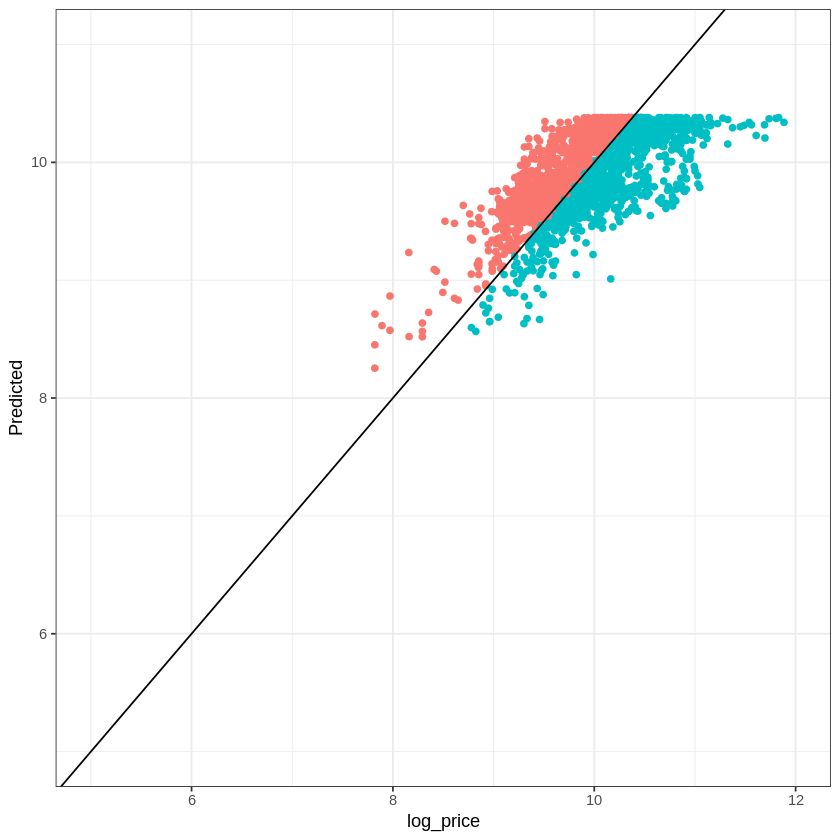

In [ ]:
TEST_DF3 = data.frame(
  log_price = log(TEST$price),
  Predicted = Predicted3,
  Col = ifelse(log(TEST$price) > Predicted3,"+","-")
)


ggplot(TEST_DF3) +
  geom_point(aes(x = log_price, y = Predicted,col = Col)) +
  geom_abline(slope = 1, intercept = 0) +
  scale_x_continuous(limits = c(5,12)) +
  scale_y_continuous(limits = c(5,11)) +
  guides(col = FALSE) +
  theme_bw()

* Although there are still some limitations in the higher price range, the model has significantly reduced large prediction errors compared to the previous approach.

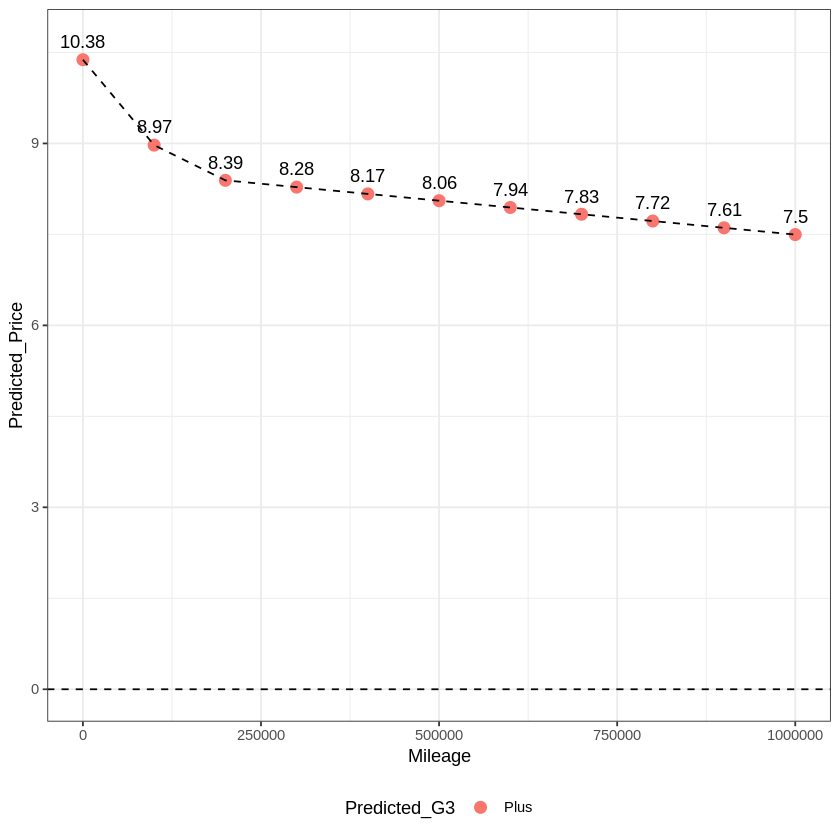

In [ ]:
Predicted3 = predict(GAM, newdata = New_DF)

New_DF$Predicted3 = Predicted3
New_DF$Predicted_G3 = ifelse(New_DF$Predicted3 > 0,"Plus","Minus")

ggplot(New_DF) +
  geom_point(aes(x = mileage, y = Predicted3, col = Predicted_G3), size = 3) +
  geom_text(aes(x = mileage, y = Predicted3 + 0.3, label = round(Predicted3,2))) +
  geom_hline(yintercept = 0, linetype = "dashed") +
  geom_line(aes(x = mileage, y = Predicted3),
            group = 1, linetype = 'dashed') +
  xlab("Mileage") + ylab("Predicted_Price") +
  theme_bw() +
  theme(legend.position = "bottom")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“attributes are not identical across measure variables; they will be dropped”
Warning message:
“A numeric `legend.position` argument in `theme()` was deprecated in ggplot2
3.5.0.
ℹ Please use the `legend.position.inside` argument of `theme()` instead.”


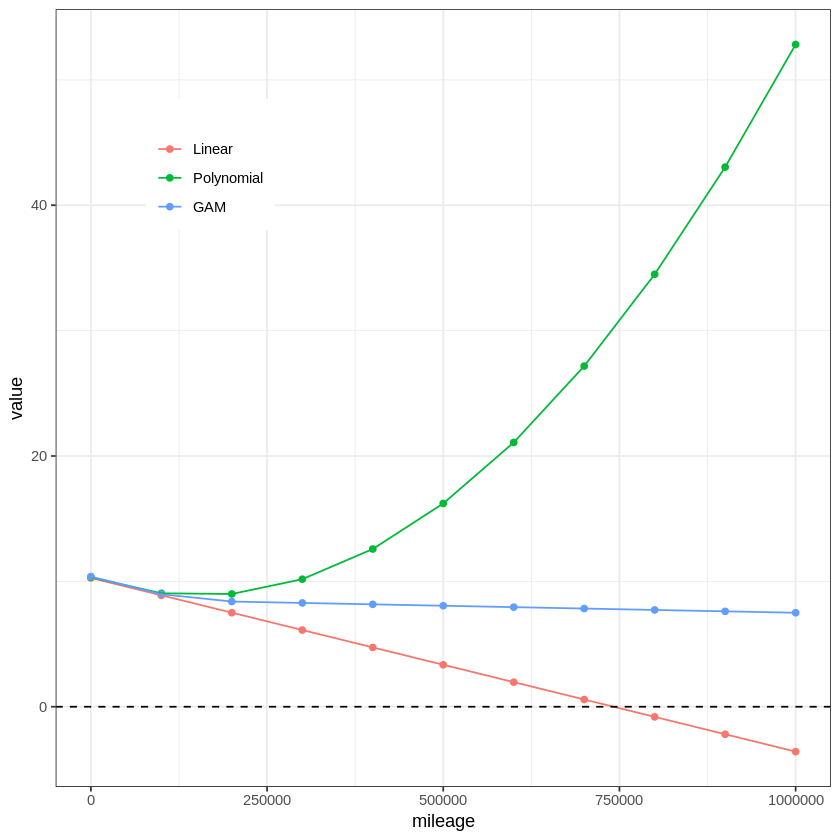

In [ ]:
# Comparison of Methods
install.packages("reshape")
New_DF %>%
  select(mileage, Predicted, Predicted2, Predicted3) %>%
  reshape::rename(c("Predicted" = "Linear",
                    "Predicted2" = "Polynomial",
                    "Predicted3" = "GAM")) %>%
  melt(id.vars = c("mileage")) %>%
  ggplot() +
  geom_point(aes(x = mileage, y = value, col = variable)) +
  geom_line(aes(x = mileage, y = value, col = variable, group = variable)) +
  geom_hline(yintercept = 0, linetype = "dashed") +
  labs(col = "") +
  theme_bw() +
  theme(legend.position = c(0.2,0.8))

* According to the graph, the Generalized Additive Model (GAM) provides the best performance in analyzing the data, effectively capturing the nonlinear relationship.

## Analysis for Predicting Used Car Selling Prices
### Prediction Analysis Using Categorical Variables

In [ ]:
# Regression Analysis Using Dummy Variables
D_Reg = lm(log(price) ~ mileage + fuelType, data = Sample)
summary(D_Reg)


Call:
lm(formula = log(price) ~ mileage + fuelType, data = Sample)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.58062 -0.21701 -0.02386  0.18308  1.73167 

Coefficients:
                 Estimate Std. Error  t value Pr(>|t|)    
(Intercept)     1.037e+01  7.472e-03 1387.797  < 2e-16 ***
mileage        -1.468e-05  1.719e-07  -85.397  < 2e-16 ***
fuelTypeHybrid  2.064e-01  6.898e-02    2.992  0.00278 ** 
fuelTypePetrol -1.646e-01  8.038e-03  -20.479  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3369 on 7463 degrees of freedom
Multiple R-squared:  0.4945,	Adjusted R-squared:  0.4943 
F-statistic:  2434 on 3 and 7463 DF,  p-value: < 2.2e-16


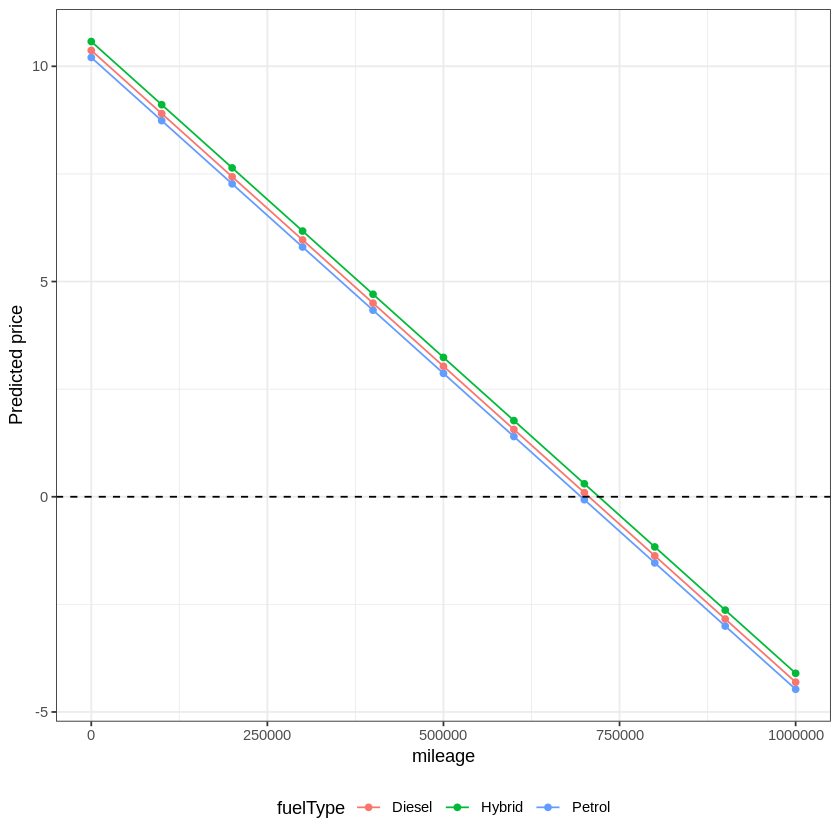

In [ ]:
New_DF2 = data.frame(
  mileage = rep(seq(0,1000000,by = 100000),3),
  fuelType = rep(c("Hybrid","Petrol","Diesel"),c(11,11,11))
)


Predicted1 = predict(D_Reg, newdata = New_DF2)
New_DF2$Predicted1 = Predicted1

ggplot(New_DF2) +
  geom_point(aes(x = mileage, y = Predicted1, col = fuelType)) +
  geom_line(aes(x = mileage, y = Predicted1,
                col = fuelType, group = fuelType)) +
  geom_hline(yintercept = 0, linetype = "dashed") +
  ylab("Predicted price") +
  theme_bw() +
  theme(legend.position = "bottom")

* The slopes remain the same, but the price ranking from highest to lowest is:

  Hybrid > Diesel > Petrol.

  This indicates that, while the effect of mileage on price is consistent across fuel types, Hybrid cars tend to have the highest prices, followed by Diesel and then Petrol.

### Prediction Analysis Using Multiple Regression

In [ ]:
# Multiple Regression
Full_Model = lm(log(price) ~ mileage + mpg + engineSize + fuelType,
                data = Sample)

summary(Full_Model)


Call:
lm(formula = log(price) ~ mileage + mpg + engineSize + fuelType, 
    data = Sample)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.84100 -0.10740  0.01035  0.11544  2.00184 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     1.038e+01  2.467e-02  420.57   <2e-16 ***
mileage        -1.221e-05  1.212e-07 -100.67   <2e-16 ***
mpg            -1.264e-02  3.015e-04  -41.91   <2e-16 ***
engineSize      2.808e-01  5.625e-03   49.92   <2e-16 ***
fuelTypeHybrid  1.564e+00  5.168e-02   30.27   <2e-16 ***
fuelTypePetrol -1.097e-01  6.383e-03  -17.19   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.212 on 7461 degrees of freedom
Multiple R-squared:  0.7999,	Adjusted R-squared:  0.7998 
F-statistic:  5966 on 5 and 7461 DF,  p-value: < 2.2e-16


* The explanatory power of the regression model (R²) increased to 79.77% with the inclusion of additional predictors.

In [ ]:
# Multicollinearity
vif(Full_Model)

GVIF     Df GVIF^(1/(2*Df))
mileage    1.328626 1  1.152660       
mpg        2.654201 1  1.629172       
engineSize 1.921767 1  1.386278       
fuelType   2.257592 2  1.225777

* Since all VIF values are less than 3, multicollinearity does not exist.

In [ ]:
# Multiple Generalized Additive Model (GAM)
Full_GAM = gam(log(price) ~ s(mileage) + s(mpg) + engineSize + fuelType,
                data = Sample)

summary(Full_GAM)


Family: gaussian 
Link function: identity 

Formula:
log(price) ~ s(mileage) + s(mpg) + engineSize + fuelType

Parametric coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9.494274   0.015487  613.04   <2e-16 ***
engineSize      0.254749   0.006645   38.34   <2e-16 ***
fuelTypeHybrid -0.218949   0.124405   -1.76   0.0785 .  
fuelTypePetrol -0.125616   0.007064  -17.78   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
             edf Ref.df      F p-value    
s(mileage) 5.037  6.198 1668.1  <2e-16 ***
s(mpg)     8.344  8.814  197.2  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.813   Deviance explained = 81.4%
GCV = 0.042024  Scale est. = 0.041926  n = 7467

* The Generalized Additive Model (GAM), when incorporating multiple predictors, increased its explanatory power to 81.3%. This confirms that GAM outperforms traditional linear regression in predictive performance and continues to improve as more predictors are added

### Performance Evaluation of Prediction Models

In [ ]:
# Define and fit the D_GAM model
D_GAM = gam(log(price) ~ s(mileage) + fuelType, data = Sample)

In [ ]:
# Mean Squared Error (MSE) Calculation
Reg2_P = predict(Reg2, newdata = TEST)
Reg3_P = predict(Reg3, newdata = TEST)
GAM_P = predict(GAM, newdata = TEST)
D_Reg_P = predict(D_Reg, newdata = TEST)
D_GAM_P = predict(D_GAM, newdata = TEST)
Full_Model_P = predict(Full_Model, newdata = TEST)
Full_GAM_P = predict(Full_GAM, newdata = TEST)

In [ ]:
Reg2_MSE = mean((Reg2_P - log(TEST$price))^2)
Reg3_MSE = mean((Reg3_P - log(TEST$price))^2)
GAM_MSE = mean((GAM_P - log(TEST$price))^2)
D_Reg_MSE = mean((D_Reg_P - log(TEST$price))^2)
D_GAM_MSE = mean((D_GAM_P - log(TEST$price))^2)
Full_Model_MSE = mean((Full_Model_P - log(TEST$price))^2)
Full_GAM_MSE = mean((Full_GAM_P - log(TEST$price))^2)

In [ ]:
Result = data.frame(
  Model = c("Linear","Polynomial","GAM",
            "Dummy_Linear","Dummy_GAM",
            "Full_Linear","Full_GAM"),
  Value = c(Reg2_MSE, Reg3_MSE, GAM_MSE,
            D_Reg_MSE,D_GAM_MSE,Full_Model_MSE,Full_GAM_MSE)
)

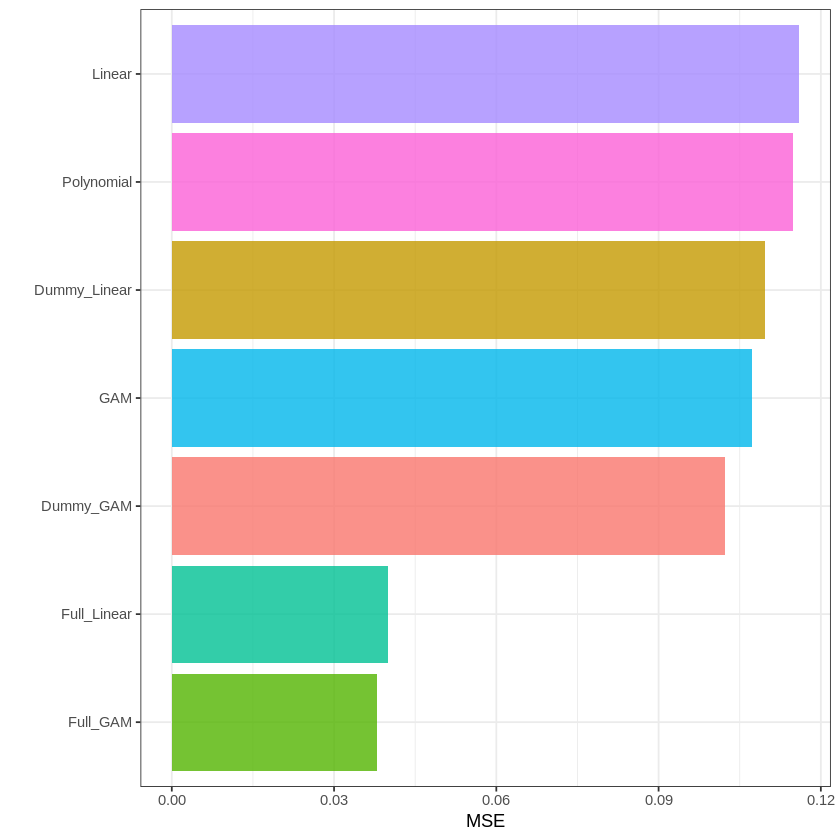

In [ ]:
ggplot(Result) +
  geom_bar(aes(x = reorder(Model,Value), y = Value, fill = Model),
           stat = 'identity', alpha = 0.8) +
  guides(fill = FALSE) +
  ylab("MSE") + xlab("") +
  coord_flip() +
  theme_bw() +
  theme(legend.position = "bottom")

* The MSE of the simple linear regression model (Linear) is the highest, while the multiple generalized additive model (Full_GAM) has the lowest MSE. The MSE of multiple linear regression (Full_Linear) has also significantly decreased compared to other models. Considering the differences in MSE, if interpretability is a priority, multiple linear regression may be preferable over the generalized additive model, despite GAM's superior predictive performance.

In [ ]:
# K-fold cross validation
set.seed(1234)
ID = sample(rep(seq(5), length = nrow(Audi)))

In [ ]:
Matrix = matrix(data = 0, nrow = 5, ncol = 7)

for(k in 1:5){

  TEST = Audi[ID == k,]
  TRAIN = Audi[ID != k,]

  Linear = lm(log(price) ~ mileage, data = TRAIN)
  Poly = lm(log(price) ~ poly(mileage,2), data = TRAIN)
  GAM = gam(log(price) ~ s(mileage), data = TRAIN)
  D_Reg = lm(log(price) ~ mileage + fuelType, data = TRAIN)
  D_GAM = gam(log(price) ~ s(mileage) + fuelType, data = TRAIN)
  Full_Model = lm(log(price) ~ mileage + mpg + engineSize + fuelType,
                  data = TRAIN)
  Full_GAM = gam(log(price) ~ s(mileage) + s(mpg) + engineSize + fuelType,
                  data = TRAIN)

  Linear_P  =  predict(Linear, newdata = TEST)
  Poly_P = predict(Poly, newdata = TEST)
  GAM_P = predict(GAM, newdata = TEST)
  D_Reg_P = predict(D_Reg, newdata = TEST)
  D_GAM_P = predict(D_GAM, newdata = TEST)
  Full_Model_P = predict(Full_Model, newdata = TEST)
  Full_GAM_P = predict(Full_GAM, newdata = TEST)

  Linear_MSE = mean((Linear_P - log(TEST$price))^2)
  Poly_MSE = mean((Poly_P - log(TEST$price))^2)
  GAM_MSE = mean((GAM_P - log(TEST$price))^2)
  D_Reg_MSE = mean((D_Reg_P - log(TEST$price))^2)
  D_GAM_MSE = mean((D_GAM_P - log(TEST$price))^2)
  Full_Model_MSE = mean((Full_Model_P - log(TEST$price))^2)
  Full_GAM_MSE = mean((Full_GAM_P - log(TEST$price))^2)

  Matrix[k,1:7] = c(Linear_MSE, Poly_MSE, GAM_MSE, D_Reg_MSE,
                    D_GAM_MSE, Full_Model_MSE, Full_GAM_MSE)

}

Matrix = as.data.frame(Matrix)

colnames(Matrix) = c("Linear","Polynomial","GAM",
                     "Dummy_Linear","Dummy_GAM",
                     "Full_Linear","Full_GAM")

Matrix

Linear    Polynomial GAM       Dummy_Linear Dummy_GAM  Full_Linear Full_GAM  
1 0.1187959 0.1167826  0.1101573 0.1120776    0.10570781 0.04227763  0.04038662
2 0.1218905 0.1193234  0.1146295 0.1158817    0.11022267 0.04796794  0.04342912
3 0.1191377 0.1166760  0.1126962 0.1105547    0.10569429 0.03858679  0.03790995
4 0.1241025 0.1234796  0.1177354 0.1202511    0.11524348 0.04454187  0.05853426
5 0.1106108 0.1086388  0.1049174 0.1039181    0.09986993 0.04451998  0.04025552

No id variables; using all as measure variables



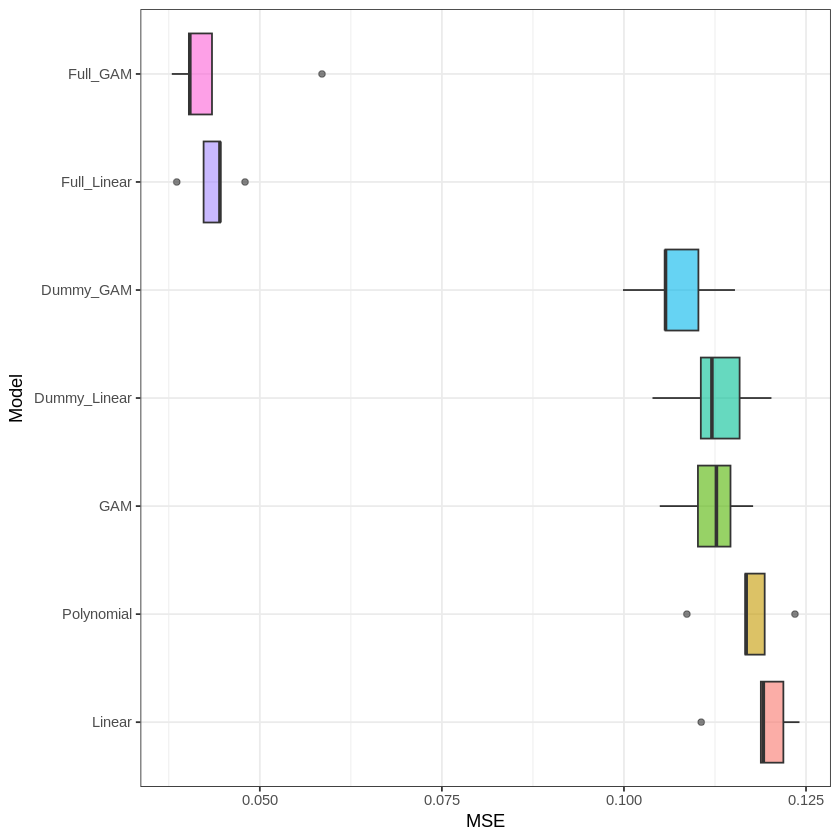

In [ ]:
Matrix %>%
  melt() %>%
  ggplot() +
  geom_boxplot(aes(x = variable, y = value, fill = variable),
               alpha = 0.6) +
  xlab("Model") + ylab("MSE") +
  guides(fill = FALSE) +
  theme_bw() +
  coord_flip()

* There is variation in MSE across different analysis methods, and it is evident that the Generalized Additive Model (GAM) with multiple predictors and the Multiple Linear Regression model have significantly lower MSE compared to other methods. This indicates that using multiple predictors enhances predictive accuracy.

## Classification Models for Used Car Rating Analysis
### Logistic Regression Analysis

In [ ]:
Q3 = quantile(Audi$price, probs = c(0.75))
Audi$price_G = ifelse(Audi$price > Q3, 1, 0)
Sample = Audi[SL,]
Test = Audi[-SL,]

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


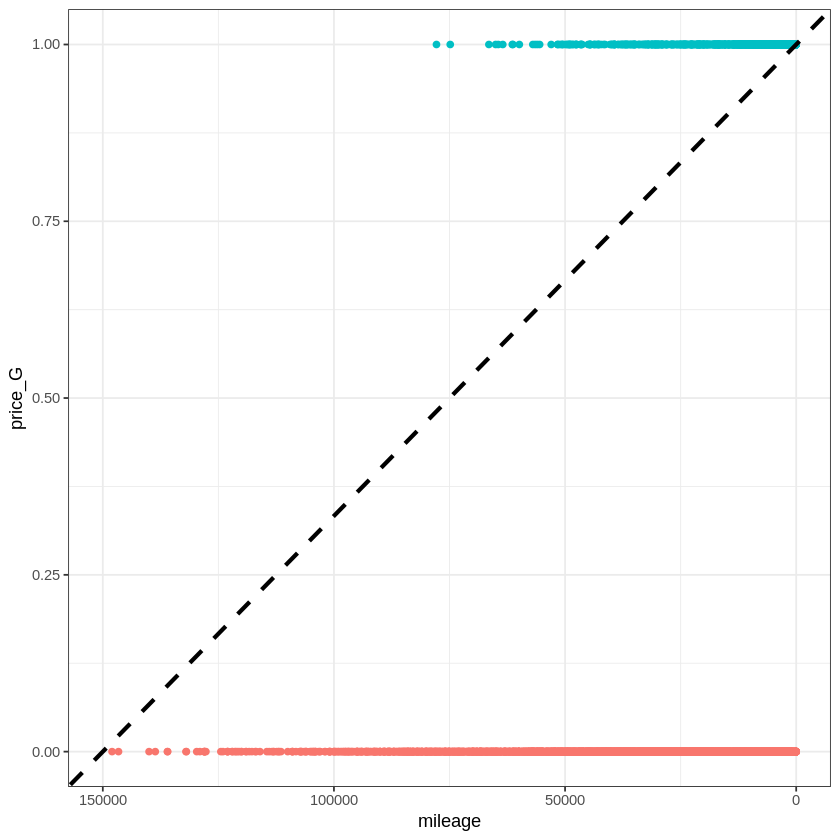

In [ ]:
# Approach to Logistic Regression
ggplot(Sample) +
  geom_point(aes(x = mileage, y = price_G, col = as.factor(price_G))) +
  geom_abline(mapping=aes(slope = 1/150000,intercept = 1),
              linetype = "dashed", size = 1.2) +
  scale_x_reverse(limits = c(150000,0)) +
  guides(col = FALSE) +
  theme_bw()

In [ ]:
# Logistic Regression using glm()
GLM = glm(price_G ~ mileage, data = Sample,
          family = binomial(link = "logit"))
Predicted = GLM$fitted.values

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


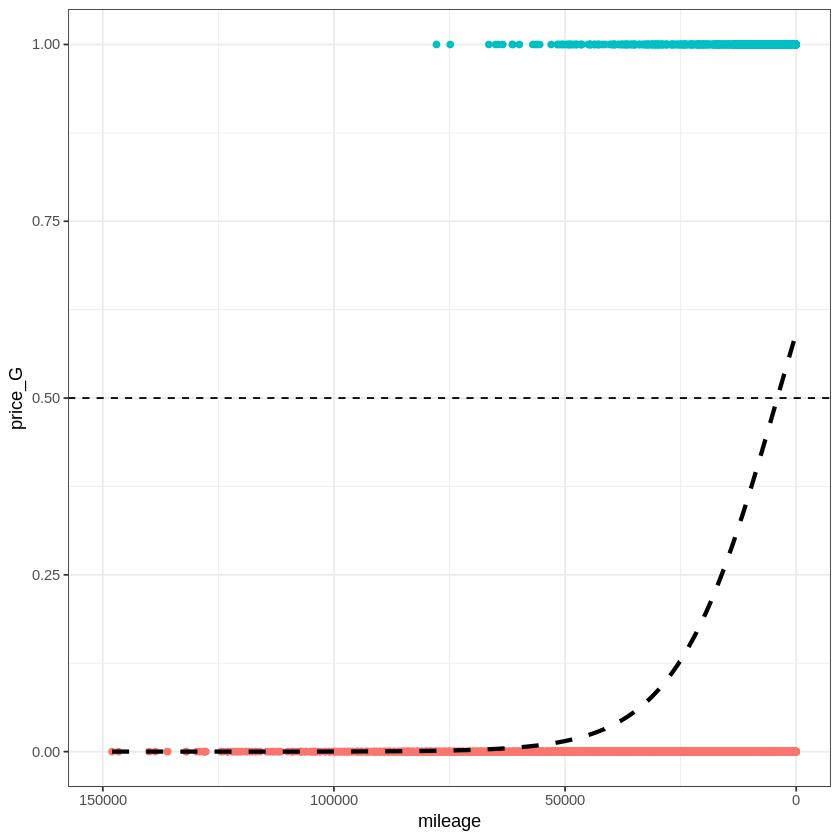

In [ ]:
Sample$GLM_Predicted = Predicted

ggplot(Sample) +
  geom_point(aes(x = mileage, y = price_G, col = as.factor(price_G))) +
  geom_line(aes(x = mileage, y = GLM_Predicted), size = 1.2, linetype = 'dashed') +
  geom_hline(yintercept = 0.5, linetype = 'dashed') +
  scale_x_reverse(limits = c(150000,0)) +
  guides(col = FALSE) +
  theme_bw()

In [ ]:
summary(GLM)


Call:
glm(formula = price_G ~ mileage, family = binomial(link = "logit"), 
    data = Sample)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.723e-01  4.445e-02   8.376   <2e-16 ***
mileage     -9.119e-05  2.935e-06 -31.071   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 8383.0  on 7466  degrees of freedom
Residual deviance: 6500.4  on 7465  degrees of freedom
AIC: 6504.4

Number of Fisher Scoring iterations: 6


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


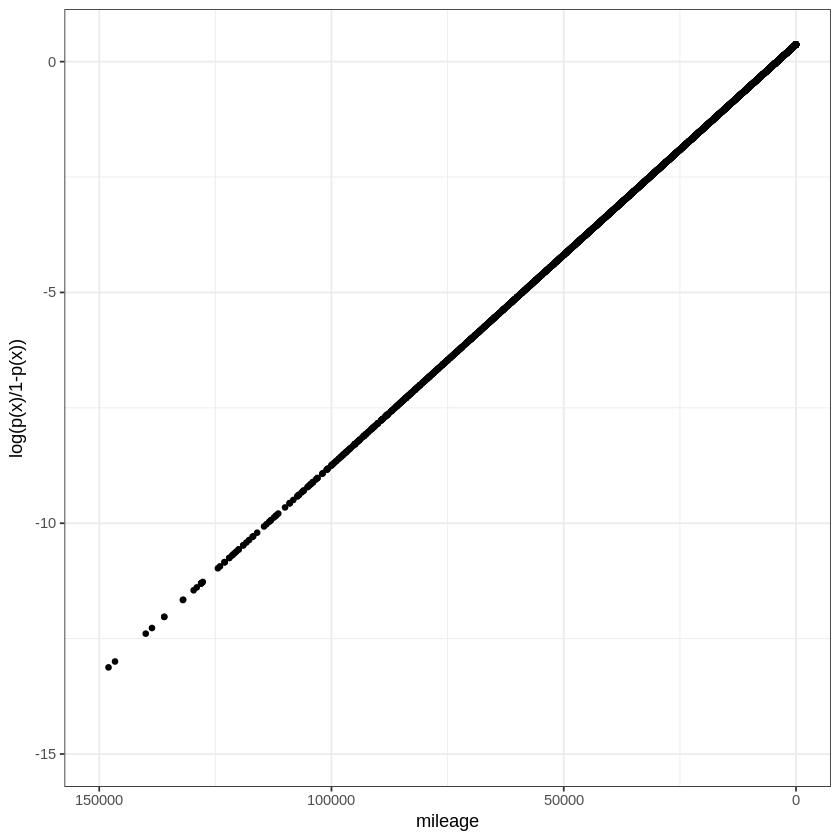

In [ ]:
ggplot(Sample) +
  geom_point(aes(x = mileage,
                 y = predict(GLM, newdata = Sample)),
             size = 1.2) +
  scale_x_reverse(limits = c(150000,0)) +
  ylab("log(p(x)/1-p(x))") +
  guides(col = FALSE) +
  theme_bw()

In [ ]:
# Deviance
anova(GLM, test="Chisq")

Df Deviance Resid. Df Resid. Dev Pr(>Chi)
NULL    NA       NA 7466      8383.049   NA      
mileage  1 1882.627 7465      6500.423    0

* The model that includes the mileage variable shows a deviance reduction of 1882.6 compared to the NULL model (intercept-only model). This indicates that mileage significantly improves the model's fit, suggesting it is an important predictor for classifying used car ratings.

### Evaluation Methods for Logistic Regression

In [ ]:
install.packages("caret")
library(caret)
install.packages("e1071")
library(e1071)
log_odds = predict(GLM, newdata = Test)
Predicted = predict(GLM, newdata = Test, type = 'response')

Predicted_C = ifelse(Predicted > 0.5, 1, 0)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’


Loading required package: lattice

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘e1071’


The following objects are masked from ‘package:fBasics’:

    kurtosis, skewness




In [ ]:
confusionMatrix(factor(Predicted_C, levels = c(1,0)),
                factor(Test$price_G, levels = c(1,0)))

Confusion Matrix and Statistics

          Reference
Prediction    1    0
         1  294  240
         0  496 2171
                                          
               Accuracy : 0.7701          
                 95% CI : (0.7551, 0.7846)
    No Information Rate : 0.7532          
    P-Value [Acc > NIR] : 0.01366         
                                          
                  Kappa : 0.3059          
                                          
 Mcnemar's Test P-Value : < 2e-16         
                                          
            Sensitivity : 0.37215         
            Specificity : 0.90046         
         Pos Pred Value : 0.55056         
         Neg Pred Value : 0.81402         
             Prevalence : 0.24680         
         Detection Rate : 0.09185         
   Detection Prevalence : 0.16682         
      Balanced Accuracy : 0.63630         
                                          
       'Positive' Class : 1               
                        

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppArmadillo’, ‘cmprsk’, ‘etm’, ‘zoo’


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


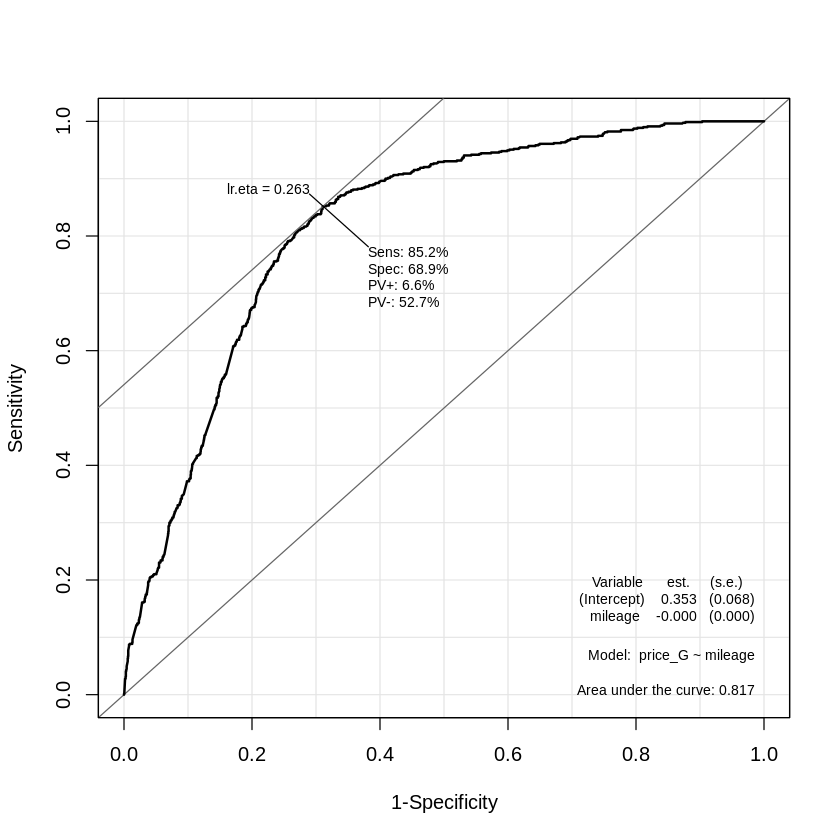

In [ ]:
install.packages("Epi")
library(Epi)
ROC(form = price_G ~ mileage, data = Test,plot="ROC")

* In the graph, if the threshold is set to 0, the logistic regression model classifies all samples as positive. Conversely, if the threshold is set to 1, it classifies all samples as negative. As the threshold moves left, specificity increases. The Area Under the Curve (AUC) represents the area under the ROC curve, and a higher AUC generally indicates better classification performance of the model.

### Multinomial Logistic Regression

In [ ]:
GLM2 = glm(price_G ~ mileage + mpg + engineSize, data = Sample,
           family = binomial(link = "logit"))

summary(GLM2)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = price_G ~ mileage + mpg + engineSize, family = binomial(link = "logit"), 
    data = Sample)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.129e+00  3.811e-01  -2.963  0.00305 ** 
mileage     -1.291e-04  4.967e-06 -25.989  < 2e-16 ***
mpg         -1.013e-01  6.217e-03 -16.300  < 2e-16 ***
engineSize   3.231e+00  1.244e-01  25.979  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 8383.0  on 7466  degrees of freedom
Residual deviance: 3586.9  on 7463  degrees of freedom
AIC: 3594.9

Number of Fisher Scoring iterations: 7


* As mileage and mpg increase, the log-odds of belonging to price_G group 1 decrease (i.e., higher mileage and fuel efficiency make it less likely for a car to be in the high-price group). As engine size increases, the log-odds increase, meaning larger engines are associated with a higher probability of being in price_G group 1. Residual Deviance has significantly decreased to 3586.9, showing a substantial improvement compared to the model using only mileage as a predictor.

In [ ]:
Predicted2 = predict(GLM2, newdata = Test, type = 'response')

Predicted_C2 = ifelse(Predicted2 > 0.5, 1, 0)

confusionMatrix(factor(Predicted_C2, levels = c(1,0)),
                factor(Test$price_G, levels = c(1,0)))

Confusion Matrix and Statistics

          Reference
Prediction    1    0
         1  608  155
         0  182 2256
                                          
               Accuracy : 0.8947          
                 95% CI : (0.8836, 0.9051)
    No Information Rate : 0.7532          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7135          
                                          
 Mcnemar's Test P-Value : 0.1567          
                                          
            Sensitivity : 0.7696          
            Specificity : 0.9357          
         Pos Pred Value : 0.7969          
         Neg Pred Value : 0.9253          
             Prevalence : 0.2468          
         Detection Rate : 0.1899          
   Detection Prevalence : 0.2384          
      Balanced Accuracy : 0.8527          
                                          
       'Positive' Class : 1               
                        

* With a threshold of 0.5, the model achieves:

  Accuracy: 89.47%

  Sensitivity (Recall): 76.96%

  Specificity: 93.57%

  This indicates a major improvement in performance compared to using only mileage, resulting in a more effective classification model.

##  Machine Learning for Used Car Rating Analysis
### Decision Tree

In [ ]:
# Entropy Model
DF = data.frame(
  TEXT = rep(c("A","B"),c(9,3)),
  x = rep(1:4,3),
  y = rep(1:3, each = 4)
)

H = 0

for(k in unique(DF$TEXT)){

  Prob = sum(DF$TEXT == k)/ nrow(DF)
  Value = Prob * log2(Prob)
  H = H + Value

}

H = H * (-1)
print(H)

[1] 0.8112781


In [ ]:
DF = data.frame(
  TEXT = rep(c("A","B","C","D"),c(3,3,1,5)),
  x = rep(1:4,3),
  y = rep(1:3, each = 4)
)

H = 0

for(k in unique(DF$TEXT)){

  Prob = sum(DF$TEXT == k)/ nrow(DF)
  Value = Prob * log2(Prob)
  H = H + Value

}

H = H * (-1)
print(H)

[1] 1.825011


* As the probability of selecting the desired level decreases, the impurity measure, entropy, increases.

In [ ]:
# Information Gain
Entropy_Function = function(DF){

  H = 0

  for(k in unique(DF$TEXT)){

    Prob = sum(DF$TEXT == k)/ nrow(DF)
    Value = Prob * log2(Prob)
    H = H + Value

  }

  H = H * (-1)
  print(H)
  return(H)

}

In [ ]:
DF_AC = DF %>%
  dplyr::filter(TEXT %in% c("A","C"))

DF_BD = DF %>%
  dplyr::filter(TEXT %in% c("B","D"))

H = Entropy_Function(DF = DF)

[1] 1.825011


In [ ]:
H_AC = Entropy_Function(DF = DF_AC)
H_BD = Entropy_Function(DF = DF_BD)
IG = H - (4/12)*H_AC - (8/12)*H_BD
IG

[1] 0.8112781
[1] 0.954434


[1] 0.9182958

* Information gain is 0.918.

In [ ]:
# C5.0 Decision Tree
install.packages("C50")
library(C50)

Sample$price_G = as.factor(Sample$price_G)
FEATURE = Sample[,c("mileage","mpg","engineSize")]
RESPONSE = Sample[,c("price_G")]


tree1 = C5.0(FEATURE, RESPONSE, control = C5.0Control(noGlobalPruning = FALSE,
    minCases = 150), trials = 10)

summary(tree1)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘libcoin’, ‘mvtnorm’, ‘inum’, ‘Cubist’, ‘partykit’





Call:
C5.0.default(x = FEATURE, y = RESPONSE, trials = 10, control
 = C5.0Control(noGlobalPruning = FALSE, minCases = 150))


C5.0 [Release 2.07 GPL Edition]  	Thu May  1 13:27:03 2025
-------------------------------

Class specified by attribute `outcome'

Read 7467 cases (4 attributes) from undefined.data

-----  Trial 0:  -----

Decision tree:

mpg <= 39.2:
:...mileage <= 26693: 1 (1203/118)
:   mileage > 26693: 0 (212/81)
mpg > 39.2:
:...mileage > 13558: 0 (4005/123)
    mileage <= 13558:
    :...engineSize <= 1.9: 0 (1060/66)
        engineSize > 1.9:
        :...mpg > 50.4: 0 (158/43)
            mpg <= 50.4:
            :...mpg <= 42.8: 0 (344/159)
                mpg > 42.8: 1 (485/182)

-----  Trial 1:  -----

Decision tree:

engineSize > 2: 1 (1304.5/242.2)
engineSize <= 2:
:...mpg > 42.8: 0 (4313.7/393.9)
    mpg <= 42.8:
    :...mpg <= 34.9: 1 (253.9/21)
        mpg > 34.9:
        :...mileage <= 4550: 1 (691.2/223.6)
            mileage > 4550: 0 (903.7/301.6)

-----  Tri

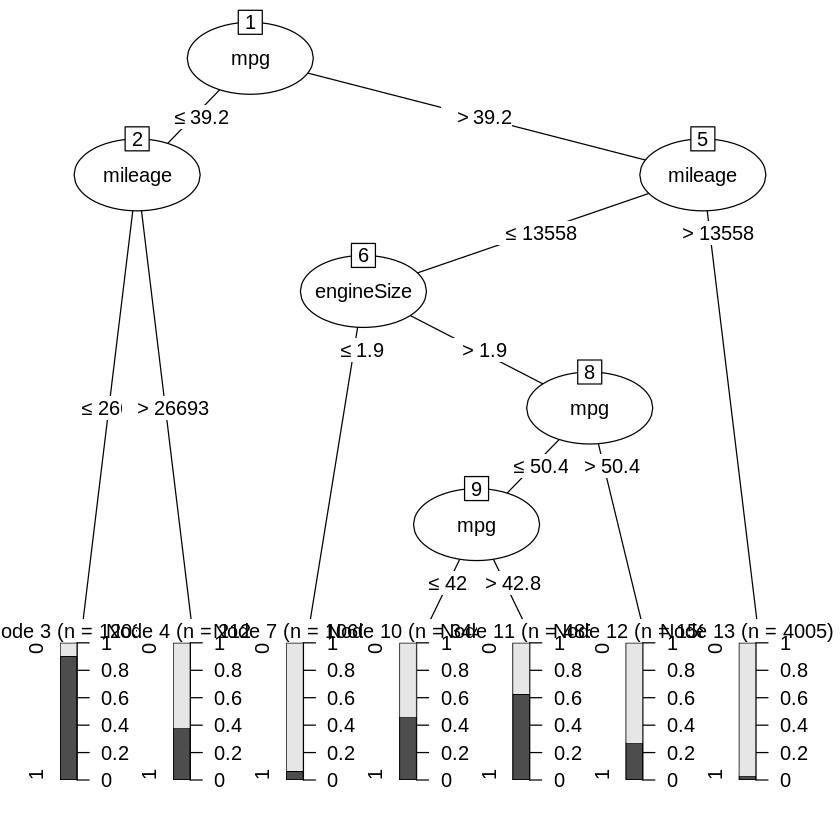

In [ ]:
plot(tree1)

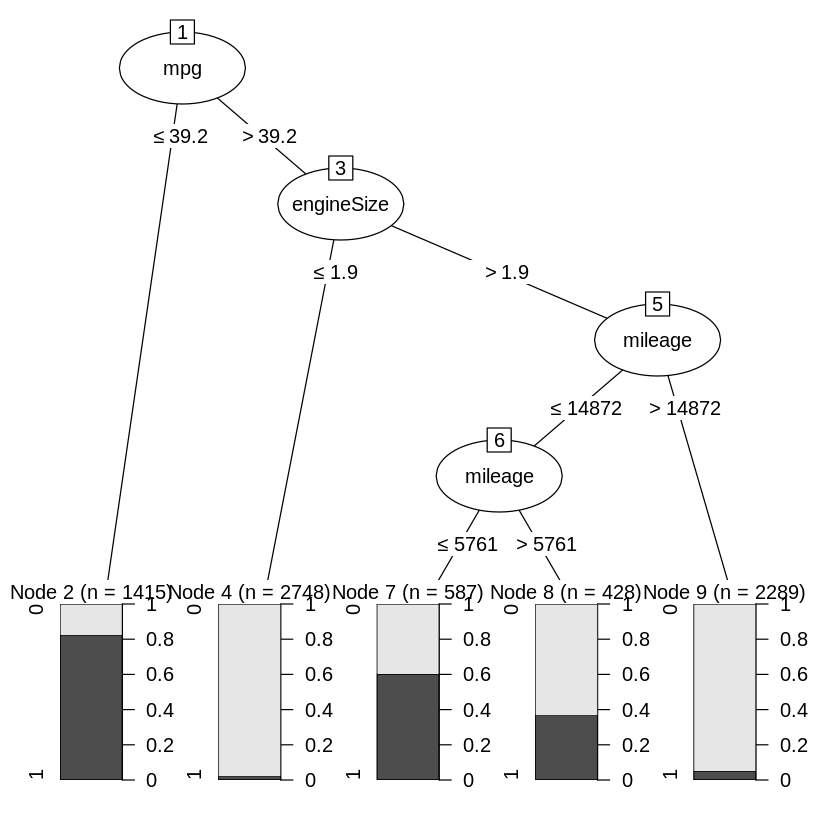

In [ ]:
tree2 = C5.0(FEATURE, RESPONSE, control = C5.0Control(noGlobalPruning = FALSE,
    minCases = 400), trials = 10)

plot(tree2)

In [ ]:
tree_pred1 = predict(tree1, newdata = Test)

confusionMatrix(factor(tree_pred1,levels = c(1,0)),
                factor(Test$price_G, levels = c(1,0)))

Confusion Matrix and Statistics

          Reference
Prediction    1    0
         1  601  117
         0  189 2294
                                          
               Accuracy : 0.9044          
                 95% CI : (0.8937, 0.9144)
    No Information Rate : 0.7532          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7347          
                                          
 Mcnemar's Test P-Value : 4.933e-05       
                                          
            Sensitivity : 0.7608          
            Specificity : 0.9515          
         Pos Pred Value : 0.8370          
         Neg Pred Value : 0.9239          
             Prevalence : 0.2468          
         Detection Rate : 0.1878          
   Detection Prevalence : 0.2243          
      Balanced Accuracy : 0.8561          
                                          
       'Positive' Class : 1               
                        

In [ ]:
tree_pred2 = predict(tree2, newdata = Test)

confusionMatrix(factor(tree_pred2,levels = c(1,0)),
                factor(Test$price_G, levels = c(1,0)))

Confusion Matrix and Statistics

          Reference
Prediction    1    0
         1  609  136
         0  181 2275
                                          
               Accuracy : 0.901           
                 95% CI : (0.8901, 0.9111)
    No Information Rate : 0.7532          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.7284          
                                          
 Mcnemar's Test P-Value : 0.01346         
                                          
            Sensitivity : 0.7709          
            Specificity : 0.9436          
         Pos Pred Value : 0.8174          
         Neg Pred Value : 0.9263          
             Prevalence : 0.2468          
         Detection Rate : 0.1903          
   Detection Prevalence : 0.2327          
      Balanced Accuracy : 0.8572          
                                          
       'Positive' Class : 1               
                        

### Random Forest

In [ ]:
install.packages("randomForest")
library(randomForest)

rf.fit = randomForest(price_G ~ mileage + mpg + engineSize,
                      data = Sample, mtry = 2, ntree = 50)

y_pred = predict(rf.fit, newdata = Test)

confusionMatrix(factor(y_pred,levels = c(1,0)),
                factor(Test$price_G, levels = c(1,0)))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine




Confusion Matrix and Statistics

          Reference
Prediction    1    0
         1  647  123
         0  143 2288
                                          
               Accuracy : 0.9169          
                 95% CI : (0.9068, 0.9262)
    No Information Rate : 0.7532          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7746          
                                          
 Mcnemar's Test P-Value : 0.244           
                                          
            Sensitivity : 0.8190          
            Specificity : 0.9490          
         Pos Pred Value : 0.8403          
         Neg Pred Value : 0.9412          
             Prevalence : 0.2468          
         Detection Rate : 0.2021          
   Detection Prevalence : 0.2405          
      Balanced Accuracy : 0.8840          
                                          
       'Positive' Class : 1               
                        

* The sensitivity has significantly increased compared to the decision tree model.

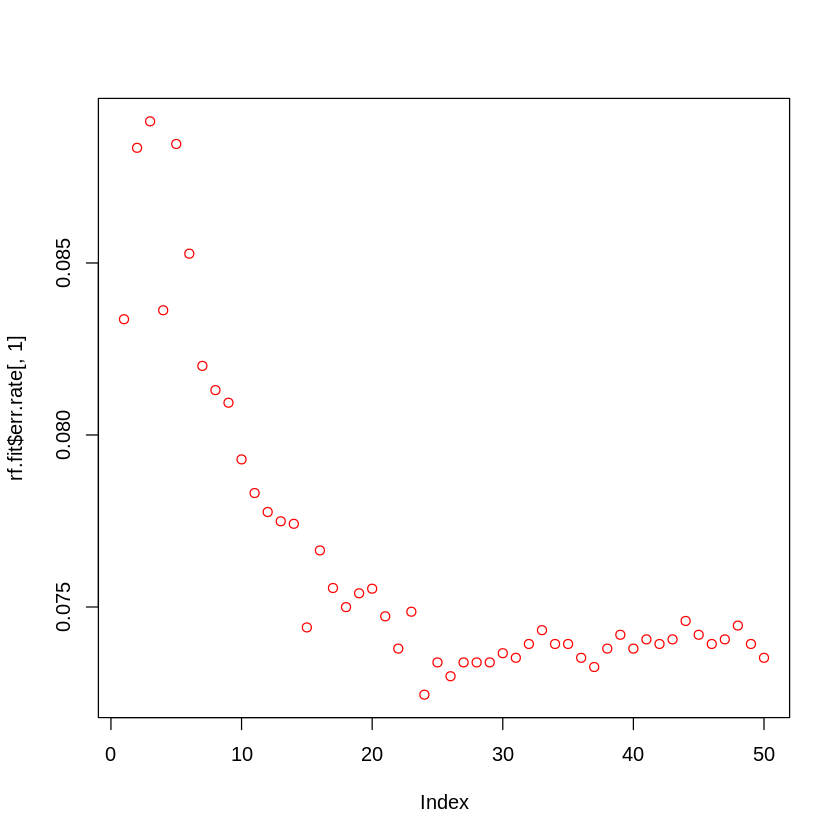

In [ ]:
plot(rf.fit$err.rate[, 1], col = "red")

* Error rate analysis shows that as the number of decision trees increases, the error rate generally decreases.

##  Data Analysis Techniques for Used Car Data Partitioning
### Exploring Similar Types of Used Cars


In [ ]:
# Loading Data and Packages
library(knitr)
install.packages("rmdformats")
library(rmdformats)

options(max.print="100")
opts_chunk$set(# echo=TRUE,
	             cache = TRUE,
               prompt = FALSE,
               tidy = FALSE,
               comment = NA,
               message = FALSE,
               warning = FALSE,
	             fig.align = "center",
	             fig.height = 5,
	             fig.width = 5)
opts_knit$set(width=100)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bookdown’




In [ ]:
library(ggplot2)
library(dplyr)
library(reshape)


Attaching package: ‘reshape’


The following objects are masked from ‘package:reshape2’:

    colsplit, melt, recast


The following object is masked from ‘package:dplyr’:

    rename




In [ ]:
# Similarity Criteria
Normalization = function(x){

  y = (x-min(x))/(max(x)-min(x))

  return(y)

}

Audi$mileage_Norm = Normalization(Audi$mileage)
Audi$mpg_Norm = Normalization(Audi$mpg)

In [ ]:
# Euclidean Distance
Dist_Fun = function(x1,x2){

  y1 = (x1-x2)^2
  y2 = sum(y1)
  y3 = sqrt(y2)

  return(y3)

}

In [ ]:
Dist_Fun(x1 = Audi[1,c("mileage_Norm", "mpg_Norm")],
         x2 = Audi[2,c("mileage_Norm", "mpg_Norm")])

[1] 0.08194011

In [ ]:
Audi$transmission_Manual = ifelse(Audi$transmission == "Manual", 1, 0)
Audi$transmission_Automatic = ifelse(Audi$transmission == "Automatic", 1, 0)

Audi$fuelType_Petrol = ifelse(Audi$fuelType == "Petrol", 1, 0)
Audi$fuelType_Diesel = ifelse(Audi$fuelType == "Diesel", 1, 0)

In [ ]:
Audi2 = Audi %>%
  select(year, price, mileage, tax, mpg,
         engineSize, transmission_Manual, transmission_Automatic,
         fuelType_Petrol, fuelType_Diesel)

Audi2 = apply(Audi2, MARGIN = 2, FUN = Normalization)

In [ ]:
Dist_Fun2 = function(x){

  Matrix = matrix(data = 0,
                  nrow = nrow(x),
                  ncol = nrow(x)
                  )

  for(k in 1:nrow(x)){

    for(i in k:nrow(x)){

      y1 = (x[k,]-x[i,])^2
      y2 = sum(y1)
      y3 = sqrt(y2)

      Matrix[k,i] = y3
      Matrix[i,k] = y3

    }

  }

  return(Matrix)

}

In [ ]:
Dist_Matrix = Dist_Fun2(x = Audi2[1:10,])
Dist_Matrix

[,1]      [,2]      [,3]       [,4]      [,5]      [,6]     [,7]     
 [1,] 0.0000000 2.0170993 0.21619790 2.0039905 0.1255657 1.431026 2.0225669
 [2,] 2.0170993 0.0000000 2.00347454 0.2229003 2.0266548 1.418035 0.1298899
 [3,] 0.2161979 2.0034745 0.00000000 2.0141984 0.2663533 1.414527 2.0078850
 [4,] 2.0039905 0.2229003 2.01419836 0.0000000 2.0122590 1.433012 0.2603833
 [5,] 0.1255657 2.0266548 0.26635328 2.0122590 0.0000000 1.439691 2.0348919
 [6,] 1.4310262 1.4180351 1.41452697 1.4330117 1.4396913 0.000000 1.4241887
 [7,] 2.0225669 0.1298899 2.00788497 0.2603833 2.0348919 1.424189 0.0000000
 [8,] 1.4502254 1.4202424 1.42725704 1.4398573 1.4686255 2.007990 1.4154083
 [9,] 0.2601359 2.0036004 0.07411785 2.0176463 0.3250652 1.415889 2.0051903
[10,] 0.2124641 2.0037121 0.02422808 2.0140618 0.2586575 1.414752 2.0096519
      [,8]     [,9]       [,10]     
 [1,] 1.450225 0.26013588 0.21246415
 [2,] 1.420242 2.00360045 2.00371208
 [3,] 1.427257 0.07411785 0.02422808
 [4,] 1.439857 2.01764631 2.01406180
 [5,] 1.468625 0.32506517 0.25865746
 [6,] 2.007990 1.41588901 1.41475242
 [7,] 1.415408 2.00519033 2.00965192
 [8,] 0.000000 1.42232942 1.42971214
 [9,] 1.422329 0.00000000 0.09209175
[10,] 1.429712 0.09209175 0.00000000

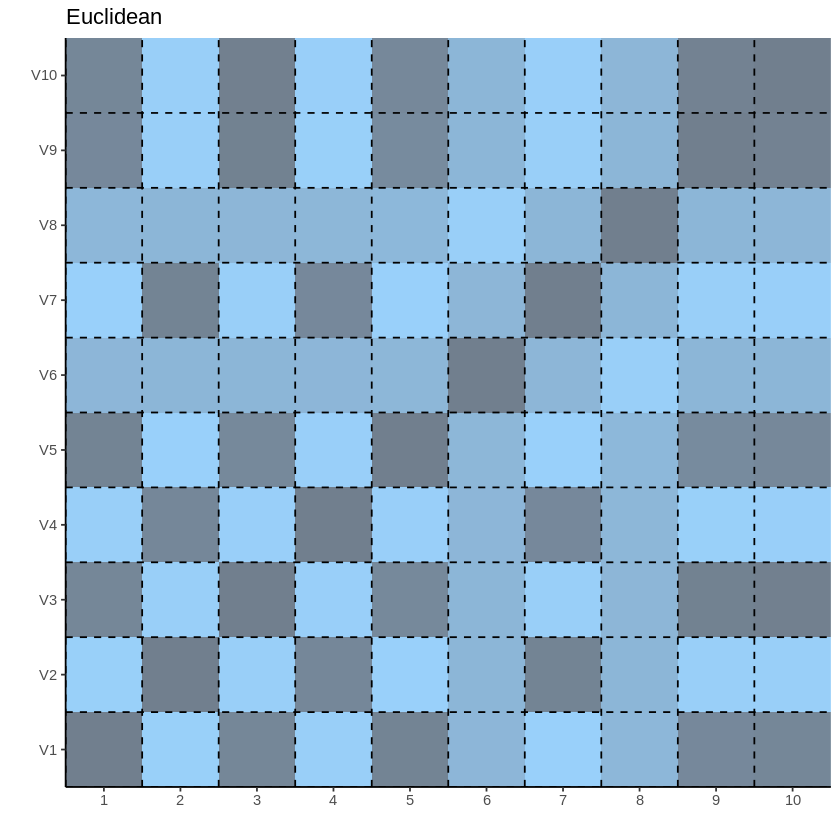

In [ ]:
Dist_Matrix %>%
  as.data.frame() %>%
  mutate(Row = 1:10) %>%
  melt(id.vars = c("Row")) %>%
  ggplot() +
  geom_tile(aes(x = as.factor(Row), y = as.factor(variable), fill = value), alpha = 0.6) +
  geom_vline(xintercept = seq(0.5,10,by = 1), linetype = "dashed") +
  geom_hline(yintercept = seq(0.5,10,by = 1), linetype = "dashed") +
  scale_y_discrete(expand = c(0,0)) +
  scale_x_discrete(expand = c(0,0)) +
  xlab("") + ylab("") + ggtitle("Euclidean") +
  guides(fill = FALSE) +
  theme_classic()

* The x-axis and y-axis represent data points 1 through 10 used for similarity measurement. The darker the box, the closer the distance. The diagonal heading toward the top-right is the darkest because all the values are 0. The lighter-colored boxes (comparison pairs) indicate relatively greater Euclidean distance.

In [ ]:
# Cosine Similarity
CosSim2 = function(x){

  xy = x %*% t(x)
  x2 = sqrt(rowSums(x^2))
  y2 = t(sqrt(rowSums(x^2)))

  Sim = xy/(x2 %*% y2)

  return(Sim)

}

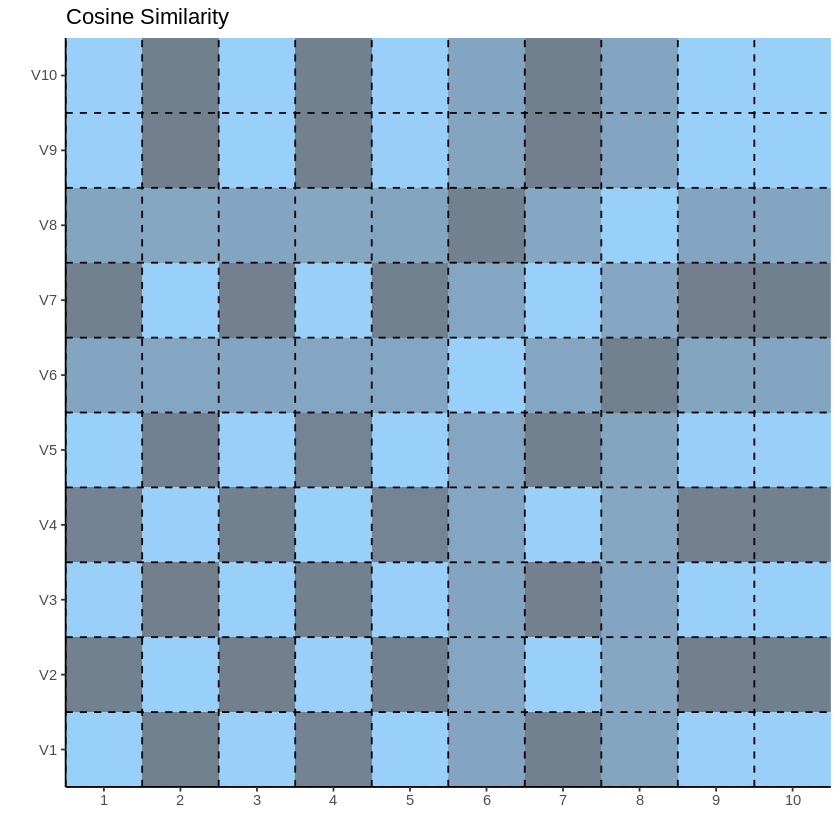

In [ ]:
Cosine_Matrix = CosSim2(x = Audi2[1:10,])

Cosine_Matrix %>%
  as.data.frame() %>%
  mutate(Row = 1:10) %>%
  melt(id.vars = c("Row")) %>%
  ggplot() +
  geom_tile(aes(x = as.factor(Row), y = as.factor(variable), fill = value), alpha = 0.6) +
  geom_vline(xintercept = seq(0.5,10,by = 1), linetype = "dashed") +
  geom_hline(yintercept = seq(0.5,10,by = 1), linetype = "dashed") +
  scale_y_discrete(expand = c(0,0)) +
  scale_x_discrete(expand = c(0,0)) +
  xlab("") + ylab("") + ggtitle("Cosine Similarity") +
  guides(fill = FALSE) +
  theme_classic()

* For cosine similarity, unlike Euclidean distance, the brighter the color, the higher the similarity. The similarity of the diagonal boxes heading toward the top-right, calculated between the same data points, is all 1.

### Hierarchical Clustering Analysis

In [ ]:
library(cluster)

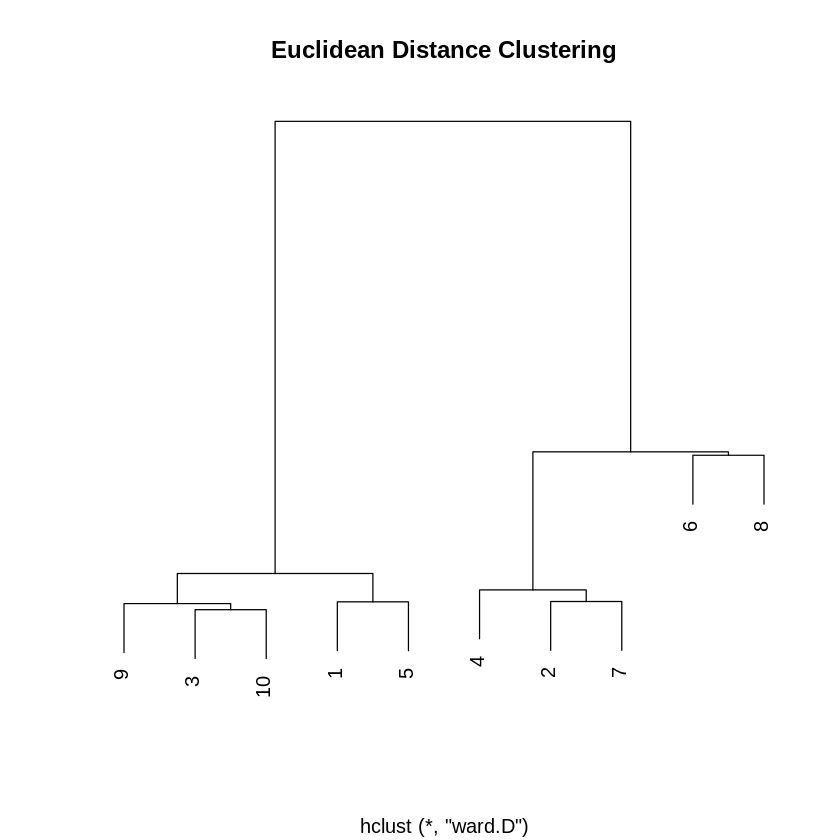

In [ ]:
# Based on Euclidean Distance
Cluster1 = hclust(as.dist(Dist_Matrix), method = 'ward.D')

plot(Cluster1, main = "Euclidean Distance Clustering",
     ylab = "", xlab = "", yaxt = "n")

* In the Audi dataset, the data point most similar to data point 3 is data point 10.
On the other hand, the similarity between data point 8 and data point 9 is very low.

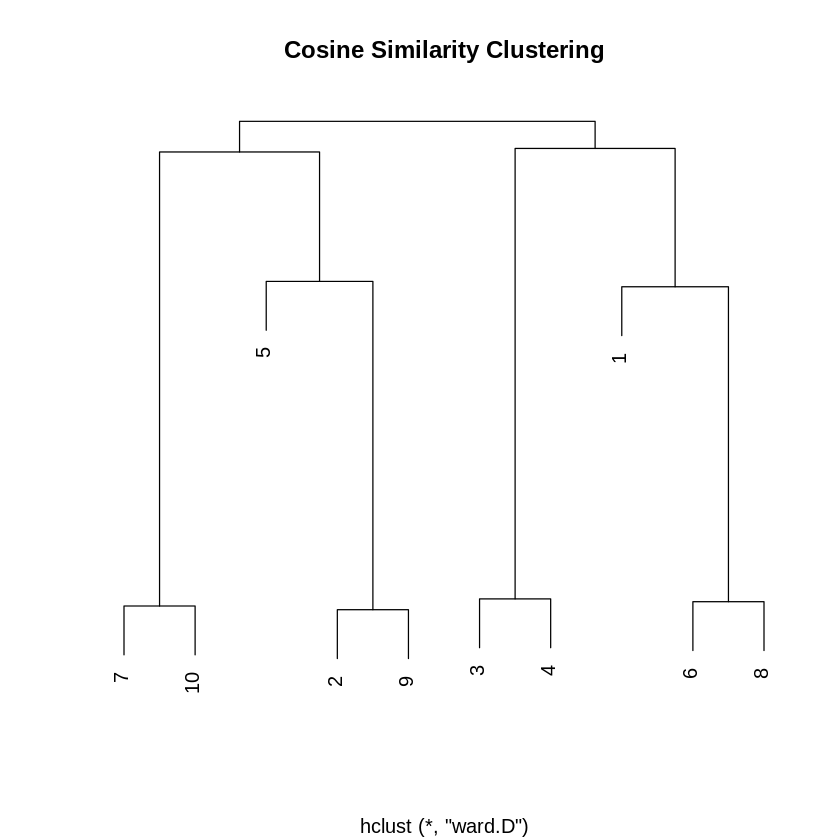

In [ ]:
# Based on Cosine Similarity Distance
Cluster2 = hclust(as.dist(Cosine_Matrix),method = "ward.D")

plot(Cluster2, main = "Cosine Similarity Clustering",
     ylab = "", xlab = "", yaxt = "n")

### Non-Hierarchical Clustering Analysis

In [ ]:
# k-Means Clustering
KM = kmeans(Audi2[1:100,], 3, nstart = 25)
KM$cluster

[1] 3 1 3 1 3 3 1 2 3 3 3 1 2 3 2 3 1 3 1 3 1 1 1 1 1 1 1 3 1 2 1 3 1 3 1 1 3
 [38] 1 2 2 2 1 1 1 3 3 3 1 3 3 2 1 3 2 1 3 1 3 2 2 2 2 2 2 3 3 2 3 3 3 2 2 2 2
 [75] 3 3 1 3 2 3 2 2 3 1 3 3 3 3 2 3 3 1 1 1 3 1 2 3 3 3

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘crosstalk’, ‘estimability’, ‘viridis’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘dendextend’, ‘FactoMineR’


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



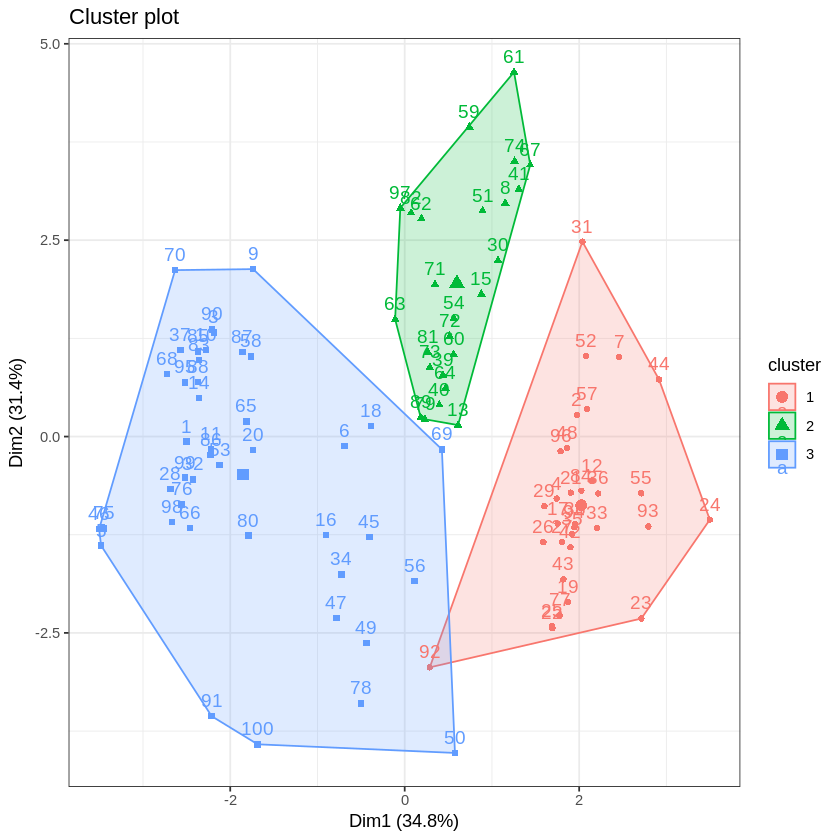

In [ ]:
install.packages("factoextra")
library(factoextra)
fviz_cluster(KM, data = Audi2[1:100,]) +
  theme_bw()

## Data Analysis Techniques for Dimensionality Reduction of Used Car Features

corrplot 0.95 loaded



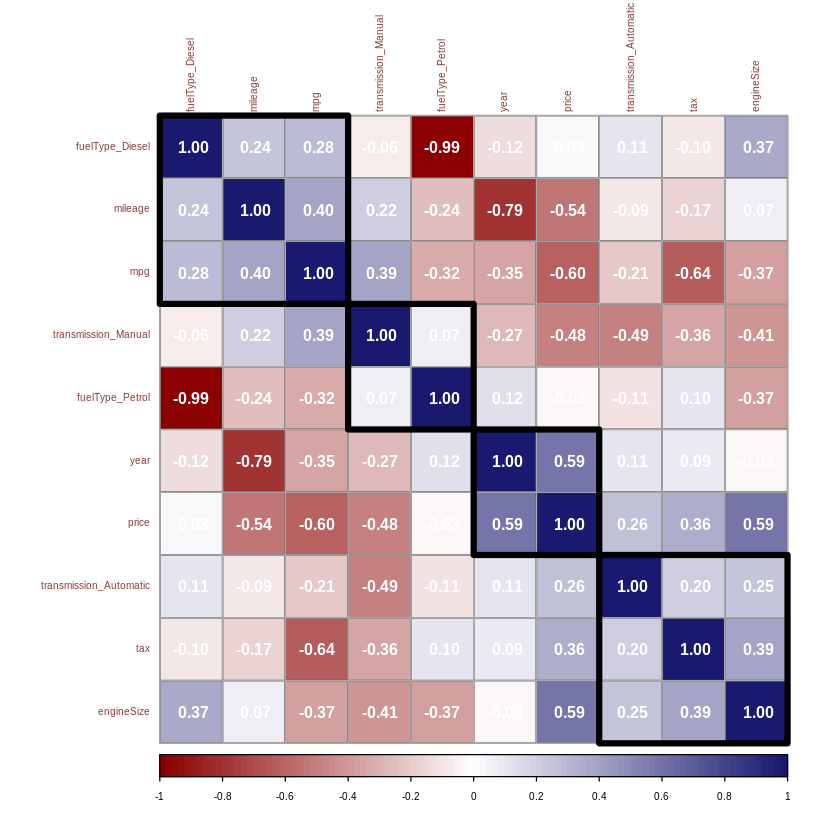

In [ ]:
# Correlation Matrix Graph
library(corrplot)
Corr_mat = cor(Audi2)
corrplot(Corr_mat, method = "color", outline = T, addgrid.col = "darkgray",
        order="hclust", addrect = 4, rect.col = "black",
        rect.lwd = 5,cl.pos = "b", tl.col = "indianred4",
        tl.cex = 0.5, cl.cex = 0.5, addCoef.col = "white",
        number.digits = 2, number.cex = 0.8,
        col = colorRampPalette(c("darkred","white","midnightblue"))(100))

* The purpose of principal component analysis is, first, dimensionality reduction, and second, solving the problem of multicollinearity. This is carried out by calculating eigenvalues and eigenvectors from the covariance matrix of the existing predictors. Therefore, generally, the higher the correlation coefficients, the cleaner the results.

  The graph above is a correlation matrix graph representing correlation coefficients. The closer the box is to white, the closer the correlation coefficient is to 0 (no correlation), and the bluer it gets, the stronger the positive correlation. On the other hand, the closer it is to red, the stronger the negative correlation. Looking at the absolute values of the correlation coefficients, the cases with negative correlations generally have higher absolute values.

In [ ]:
# Principal Component Analysis (PCA)
install.packages("FactoMineR")
library(FactoMineR)
Audi3 = as.data.frame(Audi2[1:100,])
Principal_Component = PCA(Audi3,graph = FALSE)
Principal_Component$eig

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



eigenvalue   percentage of variance cumulative percentage of variance
comp 1  3.483151e+00 3.483151e+01            34.83151                        
comp 2  3.142647e+00 3.142647e+01            66.25798                        
comp 3  1.412029e+00 1.412029e+01            80.37827                        
comp 4  6.901200e-01 6.901200e+00            87.27947                        
comp 5  4.931755e-01 4.931755e+00            92.21122                        
comp 6  4.046871e-01 4.046871e+00            96.25809                        
comp 7  2.256980e-01 2.256980e+00            98.51507                        
comp 8  1.107700e-01 1.107700e+00            99.62277                        
comp 9  3.772260e-02 3.772260e-01           100.00000                        
comp 10 2.145486e-31 2.145486e-30           100.00000

* Eigenvalues are used as indicators for determining how many of the principal components should be utilized. Typically, principal components with eigenvalues of 1 or higher are used. The percentage of variance refers to the proportion of the original predictors' variability that is explained by each generated principal component.

  Comp1 refers to the first principal component and explains approximately 34.8% of the total variance.
  Comp2 explains 31.4% of the total variance.
  The cumulative percentage of variance indicates the total variance explained by the accumulated principal components.
  The cumulative explained variance of the first and second principal components is 66.25%, and up to the third principal component, it is 80.37%.

  By using these three newly created dimensions, about 20% of the information is lost compared to using all 10 predictors, but it provides the advantage of reducing dimensionality.

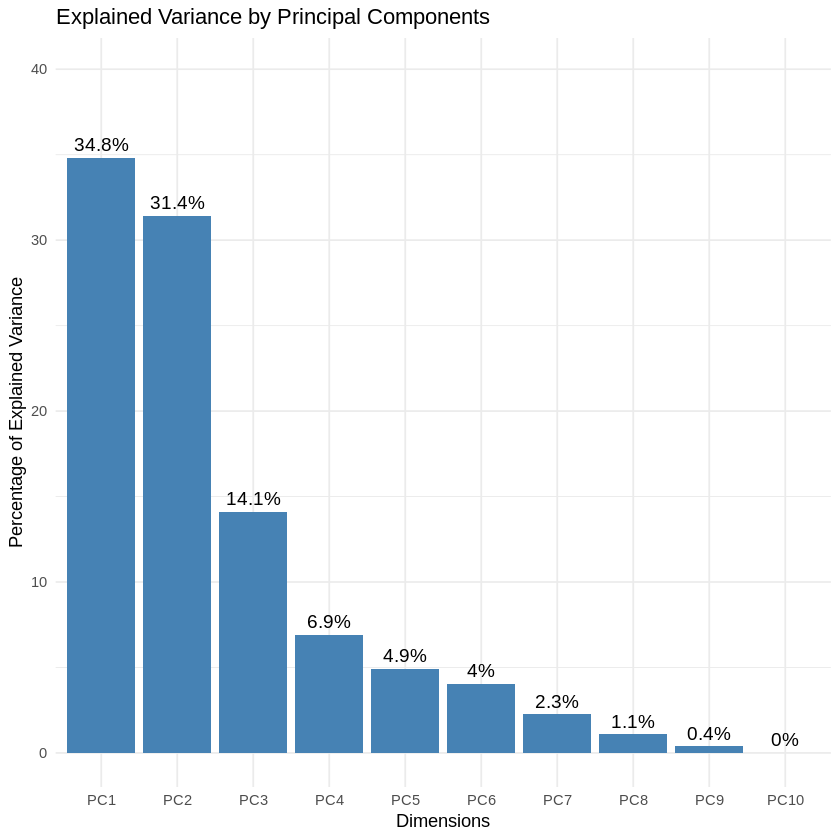

In [ ]:
# Extract explained variance (%) from PCA result
eig_values <- Principal_Component$eig
explained_var <- eig_values[, 2]  # 2nd column is % of variance explained
dimensions <- paste0("PC", 1:length(explained_var))

# Create data frame for plotting
explained_df <- data.frame(
  Dimensions = factor(dimensions, levels = dimensions),  # Ordered factor
  ExplainedVariance = explained_var
)

# Plot histogram-style bar chart with PC10 on the far right
ggplot(explained_df, aes(x = Dimensions, y = ExplainedVariance)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  geom_text(aes(label = paste0(round(ExplainedVariance, 1), "%")),
            vjust = -0.5, size = 4) +
  labs(title = "Explained Variance by Principal Components",
       x = "Dimensions",
       y = "Percentage of Explained Variance") +
  ylim(0, max(explained_df$ExplainedVariance) + 5) +
  theme_minimal()

* The graph above visualizes the explained variance of each principal component. The first and second components have high explanatory power, while from the third component onward, the explained variance decreases significantly.

In [ ]:
Principal_Component$var$coord

Dim.1       Dim.2      Dim.3       Dim.4      
year                   -0.41574569  0.4316897  0.65093358 -0.16403297
price                   0.09959656  0.8454775  0.38541974  0.07313092
mileage                 0.52823573 -0.4565412 -0.43378509  0.29998631
tax                     0.04476006  0.7801718 -0.08145093  0.34937178
mpg                     0.22433848 -0.7936643  0.31141865 -0.34671982
engineSize              0.80207744  0.2236029  0.21136633  0.20587087
transmission_Manual    -0.61848601 -0.6161008  0.28087492  0.36274893
transmission_Automatic  0.66283044  0.5013661 -0.37850451 -0.37350828
fuelType_Petrol        -0.86712907  0.2382348 -0.37493210 -0.07784599
fuelType_Diesel         0.86712907 -0.2382348  0.37493210  0.07784599
                       Dim.5      
year                    0.23409851
price                  -0.19785289
mileage                 0.15495828
tax                     0.45062570
mpg                     0.17852058
engineSize             -0.33543542
transmission_Manual    -0.02248080
transmission_Automatic  0.07528931
fuelType_Petrol        -0.10390288
fuelType_Diesel         0.10390288

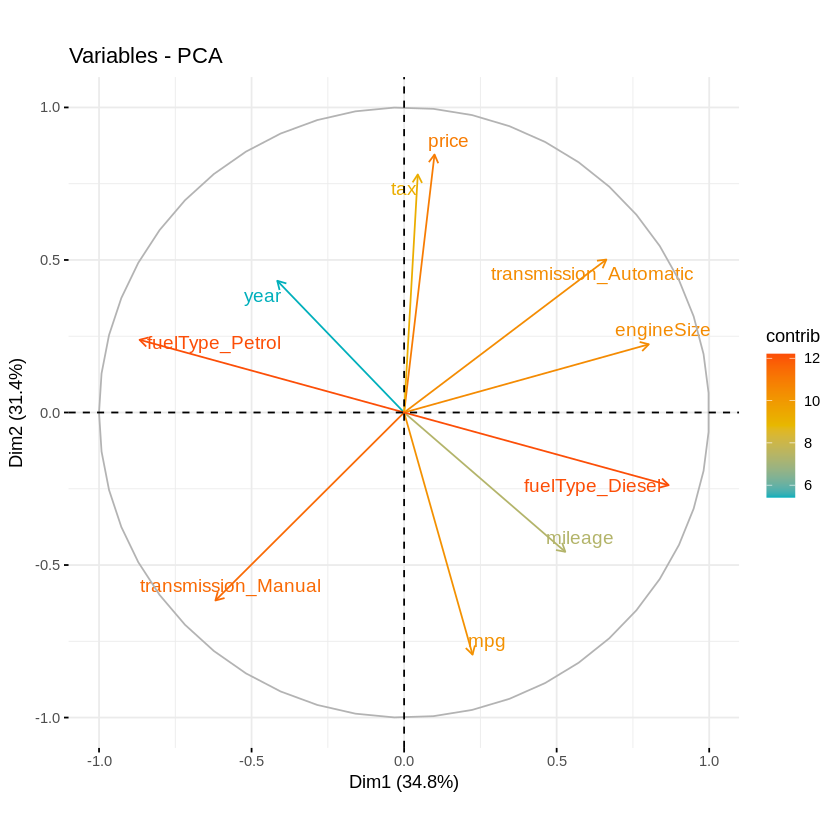

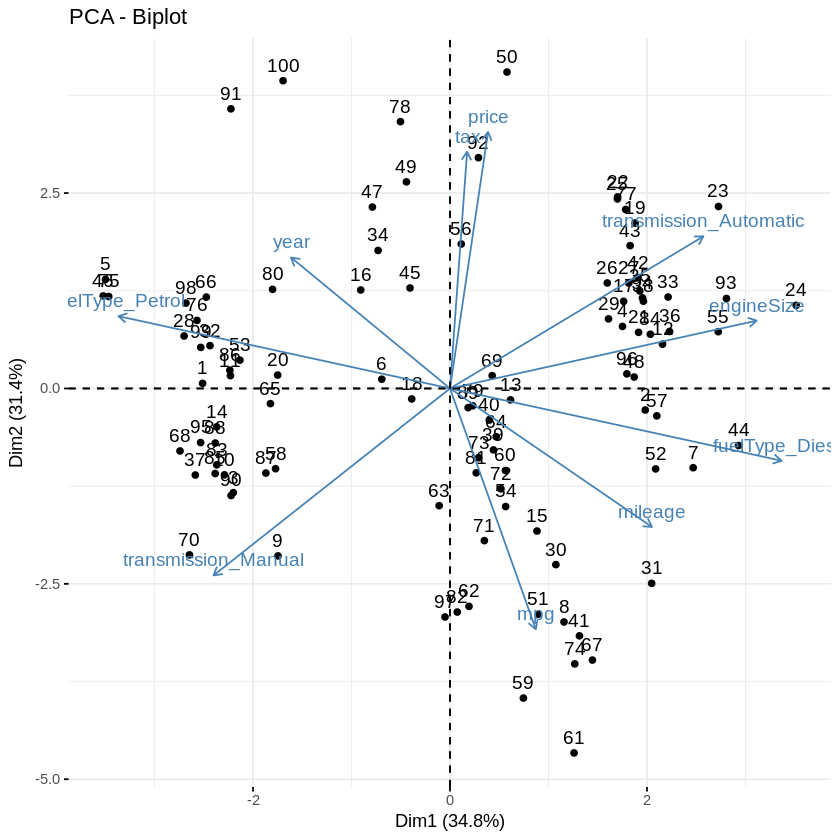

In [ ]:
fviz_pca_var(Principal_Component, col.var="contrib",
            gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
            repel = TRUE # Avoid text overlapping
)
fviz_pca_biplot(Principal_Component, repel = FALSE)

* In this biplot, the more two predictors point in the same direction, the higher their correlation.

## Used Car Price Check and Service Prediction Analysis

In [ ]:
# Load required libraries
library(stringr)
library(dplyr)
library(ggplot2)
library(ggsci)
library(googledrive)

# Retrieve metadata for the "Audi_Data" folder on Google Drive
folder_info <- drive_get("Audi_Data")

# List CSV files in the folder (filtering only CSV files)
files_info <- drive_ls(folder_info, pattern = "\\.csv$")

Total_Data <- data.frame()  # Initialize an empty data frame for combined data

✔ The input `path` resolved to exactly 1 file.



In [ ]:
# Iterate through each file and process them
for (k in 1:nrow(files_info)) {

  # Process the file only if its name does not contain "unclean"
  if (!str_detect(files_info$name[k], pattern = "unclean")) {

    # Download the file to a temporary location (overwrite if already exists)
    temp_file <- tempfile(fileext = ".csv")
    drive_download(as_id(files_info$id[k]), path = temp_file, overwrite = TRUE)

    # Read the CSV file into a data frame
    DF <- read.csv(temp_file)

    # Create a 'Brand' column by removing ".csv" from the file name
    DF$Brand <- gsub(".csv", "", files_info$name[k])

    # Append the data frame to Total_Data
    Total_Data <- Total_Data %>% bind_rows(DF)
  }
}

File downloaded:

• audi.csv <id: 1SJuNTV8CL50oQwB8lpE7k9pO0jMS0y1K>

Saved locally as:

• /tmp/Rtmp2kkgmt/filebe3d1aabc7.csv

File downloaded:

• vw.csv <id: 1uzTz-WWuceFosz3966Xg3UtZkln6veWK>

Saved locally as:

• /tmp/Rtmp2kkgmt/filebe30dca828.csv

File downloaded:

• vauxhall.csv <id: 1T6iX_6D0gV0Un5BS_g13J1-VKpZ3hWsW>

Saved locally as:

• /tmp/Rtmp2kkgmt/filebe193147ab.csv

File downloaded:

• toyota.csv <id: 1LMP4h8AsUnQY8HmZRuD4bPJFIVtm2VwR>

Saved locally as:

• /tmp/Rtmp2kkgmt/filebe54de9822.csv

File downloaded:

• skoda.csv <id: 10yD0jUYDedjQY5JZWDeNRUbc8MPYiqkH>

Saved locally as:

• /tmp/Rtmp2kkgmt/filebe5b9d9b7a.csv

File downloaded:

• merc.csv <id: 1BsZPtABAExFJ8bYTTnuSkeWTJ5AlEZfZ>

Saved locally as:

• /tmp/Rtmp2kkgmt/filebe65644d23.csv

File downloaded:

• hyundi.csv <id: 1im-Qp85z9xRASqNbzuWqbd-0yqdKgh54>

Saved locally as:

• /tmp/Rtmp2kkgmt/filebe4c972b59.csv

File downloaded:

• ford.csv <id: 1hVeFv6syzkIzoVHtO6VnbOgXBXzvawZ2>

Saved locally as:

• /tmp/Rtmp2kkg

In [ ]:
print(head(Total_Data))

  model year price transmission mileage fuelType tax  mpg engineSize Brand
1    A1 2017 12500       Manual   15735   Petrol 150 55.4        1.4  audi
2    A6 2016 16500    Automatic   36203   Diesel  20 64.2        2.0  audi
3    A1 2016 11000       Manual   29946   Petrol  30 55.4        1.4  audi
4    A4 2017 16800    Automatic   25952   Diesel 145 67.3        2.0  audi
5    A3 2019 17300       Manual    1998   Petrol 145 49.6        1.0  audi
6    A1 2016 13900    Automatic   32260   Petrol  30 58.9        1.4  audi
  tax...
1     NA
2     NA
3     NA
4     NA
5     NA
6     NA


In [ ]:
Total_Data$model = gsub(" ","",Total_Data$model)

set.seed(1234)
SL = sample(1:nrow(Total_Data), nrow(Total_Data) * 0.8, replace = FALSE)

Total_Data_Train = Total_Data[SL,]
Total_Data_Test = Total_Data[-SL,]

### Implementation of Current Market Price Information Service










In [ ]:
Total_Summary = Total_Data_Train %>%
  group_by(Brand, model, year) %>%
  summarise(Min_price = min(price),
            Mean_price = mean(price),
            Max_price = max(price))

Total_Summary

`summarise()` has grouped output by 'Brand', 'model'. You can override using
the `.groups` argument.


Brand model   year Min_price Mean_price Max_price
1    audi  A1      2010  9990      9990.000   9990    
2    audi  A1      2011  6475      6475.000   6475    
3    audi  A1      2012  5990      8029.278  10790    
4    audi  A1      2013  6299      8632.222  11350    
5    audi  A1      2014  6490     10124.780  15999    
6    audi  A1      2015  7490     11274.973  15995    
7    audi  A1      2016  8295     12211.788  19950    
8    audi  A1      2017  8490     13527.132  22750    
9    audi  A1      2018 11872     15674.250  19490    
10   audi  A1      2019 15600     21133.897  26500    
11   audi  A1      2020 18330     22868.361  30950    
12   audi  A2      2003  2490      2490.000   2490    
13   audi  A3      1998  4999      4999.000   4999    
14   audi  A3      2003  1490      1490.000   1490    
15   audi  A3      2004  4689      4689.000   4689    
16   audi  A3      2005  1975      2455.000   2895    
 [ reached 'max' / getOption("max.print") -- omitted 45 rows ]

In [ ]:
# Brand and Model Name Output
Model_Print = function(DF, B){

  Brand_List = unique(DF$Brand)

  if(B %in% Brand_List){

    DF2 = DF %>%
      filter(Brand == B)

    print(unique(DF2$model))

  }else{

    print("Please enter the brand name again.")

  }

}

In [ ]:
Model_Print(DF = Total_Summary,
            B = "audi")

 [1] "A1"  "A2"  "A3"  "A4"  "A5"  "A6"  "A7"  "A8"  "Q2"  "Q3"  "Q5"  "Q7" 
[13] "Q8"  "R8"  "RS3" "RS4" "RS5" "RS6" "RS7" "S3"  "S4"  "S5"  "S8"  "SQ5"
[25] "SQ7" "TT" 


In [ ]:
# Example when entering a non-existent brand name:
Model_Print(DF = Total_Summary,
            B = "audi2")

[1] "Please enter the brand name again."


In [ ]:
# Extracting statistics based on selected conditions
Summary_Extraction = function(DF, B, M, Y){

  Error = "N"

  Summary_DATA = DF %>%
    filter(Brand == B) %>%
    filter(model == M) %>%
    filter(year == Y)

  Summary_DATA2 = DF %>%
    filter(Brand == B) %>%
    filter(model == M) %>%
    mutate(Group =  "N")

  Summary_DATA2$Group[Summary_DATA2$year == Y] = "Y"

  if(nrow(Summary_DATA) == 0){

    Error = "E"

  }

  Result = list()
  Result[['Summary_DATA']] = Summary_DATA
  Result[['Summary_DATA2']] = Summary_DATA2
  Result[['Error']] = Error

  return(Result)

}

In [ ]:
Process1 = Summary_Extraction(DF = Total_Summary,
                              	B = "audi",
                                 M = "A1",
                                 Y = 2019)

Process1

$Summary_DATA
# A tibble: 1 × 6
# Groups:   Brand, model [1]
  Brand model  year Min_price Mean_price Max_price
  <chr> <chr> <int>     <int>      <dbl>     <int>
1 audi  A1     2019     15600     21134.     26500

$Summary_DATA2
# A tibble: 11 × 7
# Groups:   Brand, model [1]
   Brand model  year Min_price Mean_price Max_price Group
   <chr> <chr> <int>     <int>      <dbl>     <int> <chr>
 1 audi  A1     2010      9990      9990       9990 N    
 2 audi  A1     2011      6475      6475       6475 N    
 3 audi  A1     2012      5990      8029.     10790 N    
 4 audi  A1     2013      6299      8632.     11350 N    
 5 audi  A1     2014      6490     10125.     15999 N    
 6 audi  A1     2015      7490     11275.     15995 N    
 7 audi  A1     2016      8295     12212.     19950 N    
 8 audi  A1     2017      8490     13527.     22750 N    
 9 audi  A1     2018     11872     15674.     19490 N    
10 audi  A1     2019     15600     21134.     26500 Y    
11 audi  A1     2020     18330     22868.     30950 N    

$Error
[1] "N"

In [ ]:
Process1_2 = Summary_Extraction(DF = Total_Summary,
                              B = "audi",
                              M = "A1",
                              Y = 2021)

Process1_2

$Summary_DATA
# A tibble: 0 × 6
# Groups:   Brand, model [0]
# ℹ 6 variables: Brand <chr>, model <chr>, year <int>, Min_price <int>,
#   Mean_price <dbl>, Max_price <int>

$Summary_DATA2
# A tibble: 11 × 7
# Groups:   Brand, model [1]
   Brand model  year Min_price Mean_price Max_price Group
   <chr> <chr> <int>     <int>      <dbl>     <int> <chr>
 1 audi  A1     2010      9990      9990       9990 N    
 2 audi  A1     2011      6475      6475       6475 N    
 3 audi  A1     2012      5990      8029.     10790 N    
 4 audi  A1     2013      6299      8632.     11350 N    
 5 audi  A1     2014      6490     10125.     15999 N    
 6 audi  A1     2015      7490     11275.     15995 N    
 7 audi  A1     2016      8295     12212.     19950 N    
 8 audi  A1     2017      8490     13527.     22750 N    
 9 audi  A1     2018     11872     15674.     19490 N    
10 audi  A1     2019     15600     21134.     26500 N    
11 audi  A1     2020     18330     22868.     30950 N    

$Error
[1] "E"

In [ ]:
# Used Car Price Information Based on Selected Conditions
Information_Print = function(Process1){

  Error = Process1[["Error"]]
  Summary_DATA = Process1[['Summary_DATA']]
  Summary_DATA2 = Process1[['Summary_DATA2']]

  if(Error == "N"){

    print(paste0("Brand (Model): ",
                 Summary_DATA$Brand,"(",Summary_DATA$model,")"))
    print(paste0("Year: ",
                 Summary_DATA$year))
    print(paste0("Average Price: ",
                 round(Summary_DATA$Mean_price,2)))
    print(paste0("Price Range: ",
                  Summary_DATA$Min_price,"~",Summary_DATA$Max_price))


    G = ggplot(Summary_DATA2) +
      geom_errorbarh(aes(xmin = Min_price, xmax = Max_price, y = year,
                         col = Group),
                     alpha = 0.8) +
      geom_point(aes(x = Mean_price, y = year, col = Group), size = 4) +
      scale_color_nejm() +
      scale_y_continuous(breaks = 2000:2030) +
      ggtitle(paste0(Summary_DATA2$Brand[1],
                     "(model : ",Summary_DATA2$model[1],")")) +
      theme_bw() +
      theme(text = element_text(face = "bold", size = 14),
            legend.position = "bottom") +
      xlab("Used Car Price") + ylab("Year") +
      guides(col = FALSE)

    print(G)

  }else{

    print(paste0("Brand (Model): ",
                 Summary_DATA2$Brand[1],"(",Summary_DATA2$model[1],")"))
    print("Year: No information")
    print("Average Price: No information")
    print("Price Range: No information")

    G = ggplot(Summary_DATA2) +
      geom_errorbarh(aes(xmin = Min_price, xmax = Max_price, y = year,
                         col = Group),
                     alpha = 0.8,height = 0.5) +
      geom_point(aes(x = Mean_price, y = year, col = Group), size = 4) +
      scale_color_nejm() +
      scale_y_continuous(breaks = 2000:2030) +
      ggtitle(paste0(Summary_DATA2$Brand[1],
                     "(model : ",Summary_DATA2$model[1],")")) +
      theme_bw() +
      theme(text = element_text(face = "bold", size = 14),
            legend.position = "bottom") +
      xlab("Used Car Price") + ylab("Year") +
      guides(col = FALSE)

    print(G)
  }

}

[1] "Brand (Model): audi(A1)"
[1] "Year: 2019"
[1] "Average Price: 21133.9"
[1] "Price Range: 15600~26500"


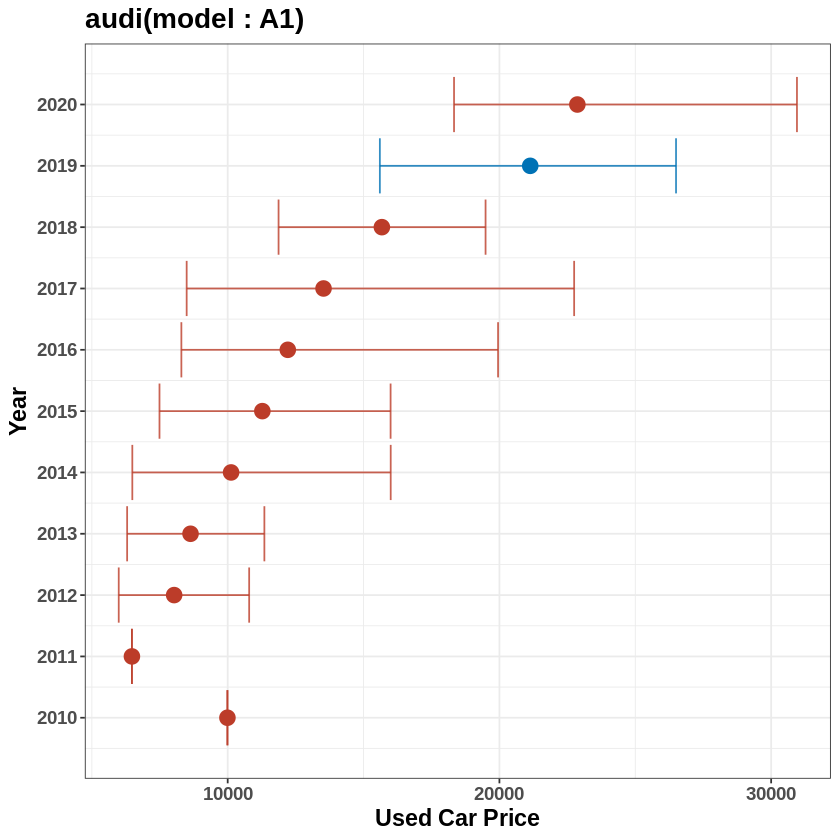

In [ ]:
Information_Print(Process1 = Process1)

[1] "Brand (Model): audi(A1)"
[1] "Year: No information"
[1] "Average Price: No information"
[1] "Price Range: No information"


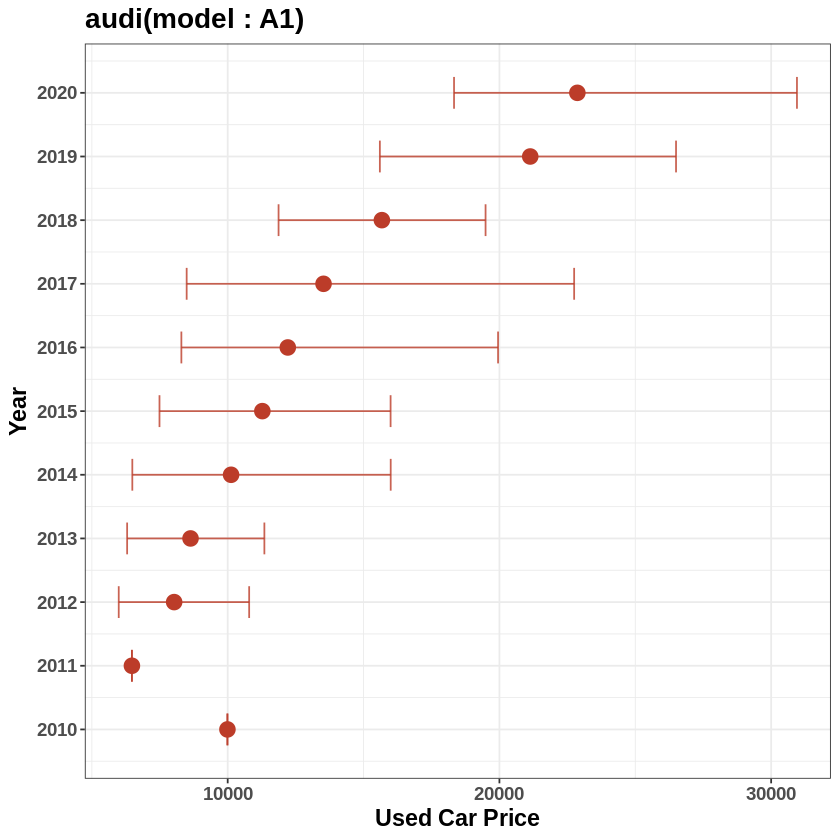

In [ ]:
Information_Print(Process1 = Process1_2)

### New Service Implementation
#### Function Definition for New Service Implementation

In [ ]:
# Model Training
library(mgcv)

Regression_Modeling = function(DF){

  Regression = list()

  Group1 = Total_Data %>%
    filter(!Brand %in% c("cclass","focus"))

  Group1_BRAND = unique(Group1$Brand)

  for(B in 1:length(Group1_BRAND)){

    DF_Brand = Group1%>%
      filter(Brand == Group1_BRAND[B])

    GAM = gam(log(price) ~ model + s(mileage) + mpg + engineSize + fuelType,
              data = DF_Brand)

    Regression[[paste0(Group1_BRAND[B])]] = GAM

  }

  Group2 = Total_Data %>%
    filter(Brand %in% c("cclass","focus"))

  Group2_BRAND = unique(Group2$Brand)

  for(B in 1:length(Group2_BRAND)){

    DF_Brand = Group2%>%
      filter(Brand == Group2_BRAND[B])

    GAM = gam(log(price) ~ s(mileage) + engineSize + fuelType,
              data = DF_Brand)

    Regression[[paste0(Group2_BRAND[B])]] = GAM

  }

  return(Regression)

}

In [ ]:
Regression_list = Regression_Modeling(DF = Total_Data_Train)

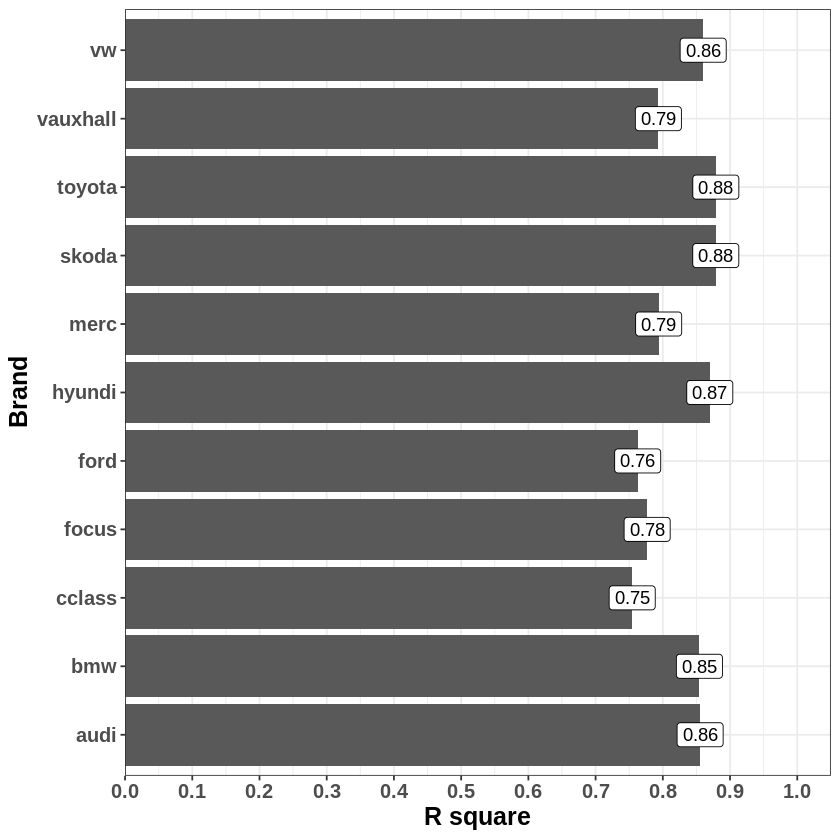

In [ ]:
rsq_V = c()

for(S in 1:length(Regression_list)){

  sm = summary(Regression_list[[S]])
  rsq = sm$r.sq
  rsq_V[S] = rsq

}

ggplot(NULL) +
  geom_bar(aes(x = names(Regression_list), y = rsq_V), stat = 'identity') +
  geom_label(aes(x = names(Regression_list), y = rsq_V, label = round(rsq_V,2))) +
  xlab("Brand") + ylab("R square") +
  scale_y_continuous(breaks = seq(0,1, by = 0.1),
                     limits = c(0,1.05), expand = c(0,0)) +
  theme_bw() +
  theme(text = element_text(size = 15, face = "bold")) +
  coord_flip()

In [ ]:
# Used Car Price Prediction
Price_Prediction = function(Regression, New_DF){

  Predicted_Price = predict(Regression_list[[New_DF$Brand[1]]], newdata = New_DF)
  Predicted_Price = exp(Predicted_Price)

  return(Predicted_Price)

}

In [ ]:
# New Service Interface Design
Information_Print2 = function(Process1, Predicted_price){

  Error = Process1[["Error"]]
  Summary_DATA = Process1[['Summary_DATA']]
  Summary_DATA2 = Process1[['Summary_DATA2']]

  if(Error == "N"){

    print(paste0("Brand (Model): ",
                 Summary_DATA$Brand,"(",Summary_DATA$model,")"))
    print(paste0("Year: ",
                 Summary_DATA$year))
    print(paste0("Average Price: ",
                 round(Summary_DATA$Mean_price,2)))
    print(paste0("Price Range: ",
                  Summary_DATA$Min_price,"~",Summary_DATA$Max_price))
    print(paste0("Predicted Price: ",
                 round(Predicted_price,2)))


    G = ggplot() +
      geom_errorbarh(data = Summary_DATA2,
                     aes(xmin = Min_price, xmax = Max_price, y = year,
                         col = Group),
                     alpha = 0.8) +
      geom_point(data = Summary_DATA2,
                 aes(x = Mean_price, y = year, col = Group), size = 4) +
      geom_point(aes(x = Predicted_price, y = Summary_DATA$year),
			size = 4, col = "black") +
      scale_color_nejm() +
      scale_y_continuous(breaks = 2000:2030) +
      ggtitle(paste0(Summary_DATA2$Brand[1],
                     "(model : ",Summary_DATA2$model[1],")")) +
      theme_bw() +
      theme(text = element_text(face = "bold", size = 14),
            legend.position = "bottom") +
      xlab("Used Car Price") + ylab("Year") +
      guides(col = FALSE)

    print(G)

  }else{

    print(paste0("Brand (Model): ",
                 Summary_DATA2$Brand[1],"(",Summary_DATA2$model[1],")"))
    print("Year: No information")
    print("Average Price: No information")
    print("Price Range: No information")
    print(paste0("Predicted Price: ",
                 round(Predicted_price,2)))

    G = ggplot() +
      geom_errorbarh(data = Summary_DATA2,
                     aes(xmin = Min_price, xmax = Max_price, y = year,
                         col = Group),
                     alpha = 0.8,height = 0.5) +
      geom_point(data = Summary_DATA2,
                 aes(x = Mean_price, y = year, col = Group), size = 4) +
      geom_point(aes(x = Predicted_price, y = Summary_DATA$year),
			size = 4, col = "black") +
      scale_color_nejm() +
      scale_y_continuous(breaks = 2000:2030) +
      ggtitle(paste0(Summary_DATA2$Brand[1],
                     "(model : ",Summary_DATA2$model[1],")")) +
      theme_bw() +
      theme(text = element_text(face = "bold", size = 14),
            legend.position = "bottom") +
      xlab("Used Car Price") + ylab("Year") +
      guides(col = FALSE)

    print(G)
  }

}

In [ ]:
# Development Service Testing
N_DF = Total_Data_Test[1,]
N_DF$price

[1] 16800

[1] "Brand (Model): audi(A4)"
[1] "Year: 2017"
[1] "Average Price: 18189.07"
[1] "Price Range: 11500~31990"


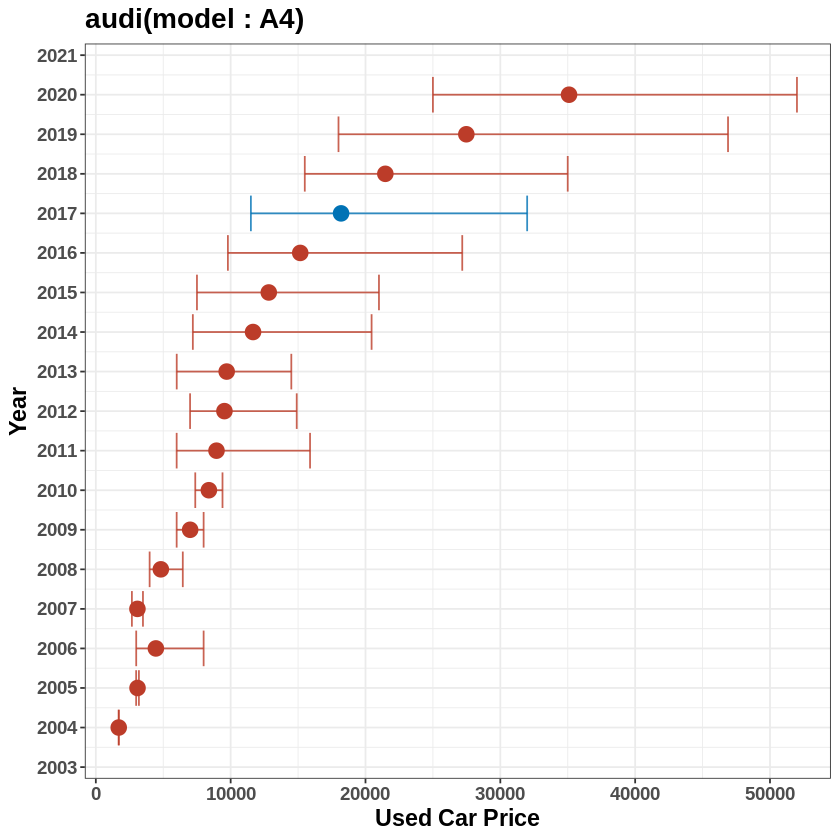

In [ ]:
N_Process = Summary_Extraction(DF = Total_Summary,
                              B = N_DF$Brand[1],
                              M = N_DF$model[1],
                              Y = N_DF$year[1])

Information_Print(Process1 = N_Process)

* According to the graph, the model of the Audi brand entered by the customer is A4 (2017). The average price of the vehicle is 18,189.07 dollar, and the price range is between 11,500 and 31,990 dollar. Currently, the price range provided is around 20,000 dollar, and there is a difference of approximately 2,000 dollar between the actual price of the vehicle (16,800 dollar) and the average price (18,189 dollar).










[1] "Brand (Model): audi(A4)"
[1] "Year: 2017"
[1] "Average Price: 18189.07"
[1] "Price Range: 11500~31990"
[1] "Predicted Price: 17034.07"


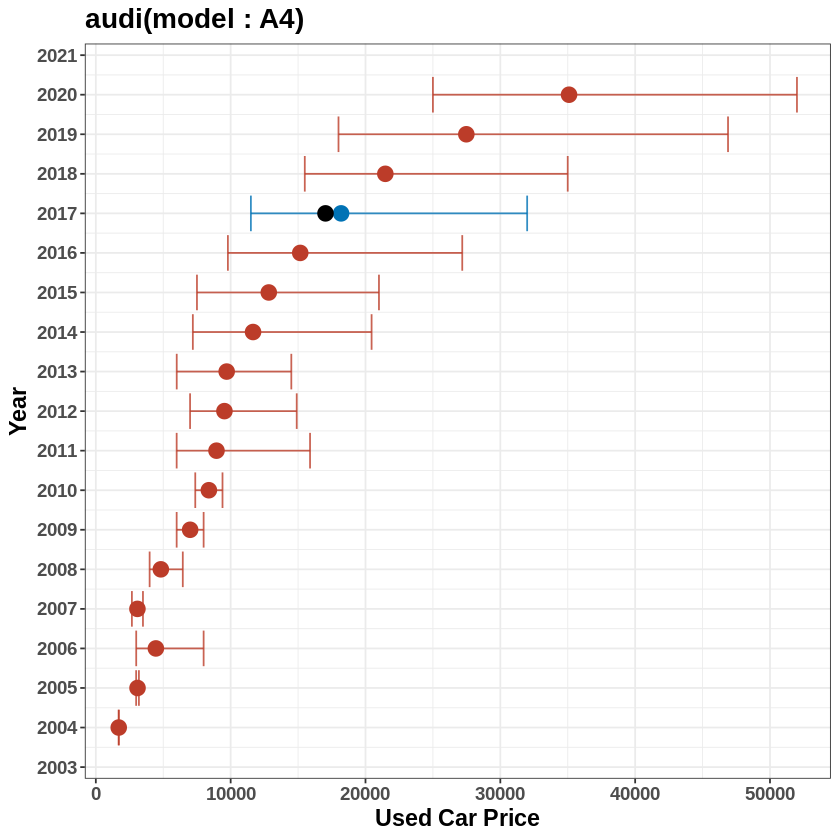

In [ ]:
New_DF = N_DF

Predicted = Price_Prediction(Regression = Regression_list,
                             New_DF = N_DF)

Information_Print2(Process1 = N_Process, Predicted_price = Predicted)

* In the new service, the predicted price shown for the vehicle is 17,034 dollar. This is closer to the actual price of the vehicle, and the difference is smaller compared to the average price of 18,189 dollar. The graph also shows, with a black dot, that the customer's vehicle price is slightly below the average price. By providing accurate information at the early stages of service delivery, it is expected that this will help increase the company's credibility.








